## 전처리

### 모듈 및 인코더 전처리

#### 모듈

In [75]:
# 파일
import os
import os.path as path

# 데이터
import pandas as pd
import numpy as np
from datetime import datetime as dt

# 인코딩
from sklearn.preprocessing import LabelEncoder

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 매직 함수 (주피터 노트북에만 사용하는 편의성 함수)
from IPython.core.magic import register_cell_magic

#### 매직 함수 (편의성 함수)

In [76]:
@register_cell_magic
def skip(line, cell):
    return

#### 인코더 불러오기

In [77]:
# 베이스 경로
BasePath = "./encoders"

# 인코더 파일 리스트
encoder_file_list = os.listdir(BasePath)

# 인코더 파일 확인
print(encoder_file_list)

## 인코더 파일 불러오기
# 인코더 딕셔너리 생성
encoder_dict = {}

# 인코더 파일 불러오기
for file in encoder_file_list:
    # 각 인코더 불러오기
    encoder_name = file.replace(".npy", "")
    encoder_dict[encoder_name] = LabelEncoder()
    classes = np.load(path.join(BasePath, file), allow_pickle=True)
    encoder_dict[encoder_name].classes_ = np.load(path.join(BasePath, file), allow_pickle=True)
    
    # 전처리에서 제외되는 데이터이지만, 만일을 위한 데이터 변환 (없어도 무방)
    if encoder_name == "os_version":
        encoder_dict[encoder_name].fit(list(map(lambda x: str(x), classes)))

['button.name.npy', 'button_name.npy', 'city.npy', 'content.difficulty.npy', 'content.id.npy', 'country.npy', 'coupon.discount_amount.npy', 'device_family.npy', 'device_type.npy', 'event_type.npy', 'is_free_trial.npy', 'is_trial.npy', 'language.npy', 'lesson.id.npy', 'os_name.npy', 'os_version.npy', 'paid_amount.npy', 'pg.type.npy', 'plan.price.npy', 'plan.type.npy', 'platform.npy', 'question.id.npy', 'trial.type.npy', 'type.npy', 'user_id.npy']


#### 인코더 일부 재배치하기

In [78]:
# 인코더 일부분 일괄 변환
for encoder_name in encoder_dict.keys():
    # 인코더 재배치 : encoder[0] = nan(결측치)
    encoder_dict[encoder_name].classes_ = \
        np.append(encoder_dict[encoder_name].classes_[-1],\
                    encoder_dict[encoder_name].classes_[:-1])

    # 인코더 클래스 확인
    print(f"\n{encoder_name} : {(encoder_dict[encoder_name].classes_.shape[0]) - 1} 가지\n{encoder_dict[encoder_name].classes_[1:6]}")

# 'event_type' 인코더 classes 재배치
data_set_names = [
    'error',
    'enter.main_page',
    'enter.signup_page',
    'complete.signup',
    'enter.content_page',
    'click.content_page_start_content_button',
    'click.content_page_more_review_button',
    'enter.payment_page',
    'complete.subscription',
    'renew.subscription',
    'resubscribe.subscription',
    'start.free_trial',
    'start.content',
    'enter.lesson_page',
    'complete.lesson',
    'click.lesson_page_related_question_box',
    'end.content',
    'click.cancel_plan_button'
]

# 'event_type' 인코더 재배치
encoder_dict['event_type'].classes_ = np.array(data_set_names)


button.name : 9 가지
['구독 시작하기' '무료로 들어보기' '무료로 시작하기' '최저가 혜택 받기' '최저가로 시작하기']

button_name : 5 가지
['무료로 시작하기' '수강시작' '수강하기' '이어하기' None]

city : 4340 가지
["'Ewa Beach" '6th of October City' 'A Coruña' 'A Me' 'AElmhult']

content.difficulty : 5 가지
['advanced' 'beginner' 'hard' 'intermediate' None]

content.id : 212 가지
['011a040b817225cb7c01d4676c21ea44' '01d9424fd9d2b1d7a4392042fc646061'
 '035f018008f1696ded6e10e1dd757726' '03b4a290c08f7fa83933827a994f2e61'
 '040ccaa97a52e006a2c94bb7c5dce263']

country : 189 가지
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola']

coupon.discount_amount : 45 가지
[-52400 -48400 0 478 796]

device_family : 1120 가지
['10A30Q' '21051182G' '21061110AG' '21061119AG' '21061119AL']

device_type : 652 가지
['Amazon Fire HD 10' 'Amazon Fire HD 8' 'Amazon Kindle Fire HDX' 'Android'
 'Apple iPad']

event_type : 18 가지
['click.cancel_plan_button' 'click.content_page_more_review_button'
 'click.content_page_start_content_button'
 'click.lesson_page_related_questio

#### 인코더 테스트  << skipping >>

In [79]:
%%skip  # << skipping >>

## 주의사항
# 1. BaseFilePath에 데이터 파일 경로를 설정해주세요.
# 2. 제외하고 싶은 컬럼이 있으면 exclude_columns에 추가해주세요.
# 3. 인코딩을 하고 컬럼 이름을 바꿔 주세요.

## 함수 설명
# .transform()을 이용해서 데이터를 변환해주세요.
# .inverse_transform()을 이용해서 데이터를 역변환해주세요.


## 인코딩
# 개인적으로 BaseFilePath를 설정해주었는데, 이를 이용해서 파일 리스트를 불러오는 코드입니다.
BaseFilePath = 'd:\Codeit\intermediate_project\주제 2. 구독서비스 프로덕트 데이터 분석'
filelist = os.listdir(BaseFilePath)[:-1]

# 제외 컬럼
exclude_columns = ['device_carrier', 'os_version']

# 제외 컬럼 : 제외하고 싶은 컬럼을 추가합니다.
exclude_columns_plus = []

## 메인
# 파일 리스트 확인
print(filelist)

# 데이터 리스트 선언
dfs = []

# 파일별 데이터 불러오기
for file in filelist:
    # csv 파일만 불러오기
    if file.endswith('.csv'):
        # 데이터 불러오기
        df = pd.read_csv(path.join(BaseFilePath, file), nrows=1000)
        
        # 전처리
        # 1. os_version, device_carrier 제외
        df = df.drop('device_carrier', axis=1)
        df = df.drop('os_version', axis=1)
        # 2. client_event_time을 datetime으로 변환
        df['client_event_time'] = pd.to_datetime(df['client_event_time'])
        
        # 데이터 추가
        dfs.append(df)
        # 데이터 크기 확인
        print(f"file: {file}, shape: {df.shape}")

# 데이터 확인
for i, df in enumerate(dfs):
    # 인코딩할 대상 데이터 확인
    print(f"file: {filelist[i]} encodings - ")
    
    # 인코딩
    for col in df.columns:
        # exception handling : 인코딩 제외 대상
        if col not in encoder_dict:
            continue
        if col in exclude_columns + exclude_columns_plus:
            continue
        
        # 컬럼 인코딩
        df[col] = encoder_dict[col].transform(df[col])
        print(f"{col}: {encoder_dict[col].classes_[:5]}")
    
    # 결과 확인
    display(df.head())

In [80]:
%%skip  # << skipping >>

# 디코딩
for i, df in enumerate(dfs):
    print(f"file: {filelist[i]} decodings - ")
    
    # 디코딩
    for col in df.columns:
        # exception handling : 디코딩 제외 대상
        if col not in encoder_dict:
            continue
        if col in exclude_columns + exclude_columns_plus:
            continue
        
        # 컬럼 디코딩
        df[col] = encoder_dict[col].inverse_transform(df[col])
        print(f"{col}: {encoder_dict[col].classes_[:5]}")
    
    # 결과 확인인
    display(df.head())

### 파일 전처리

#### 파일 불러오기 함수 정의  << skipping >>

In [81]:
def read_sample(path, samplesize=4000000):
    '''
    #### 데이터를 불러오되 일정 크기 이상이면 샘플로 추출하여 크기를 줄입니다. \n
     \n
    path : 파일 경로입니다. \n
    samplesize : 추출할 샘플의 크기입니다.(default: 4000000), 0 이라면 하지 않습니다. \n
     \n
    chunksize(=2000000)로 불러와서 samplesize를 넘으면 샘플링하고 중복을 제거합니다. \n
     \n
    return : 데이터프레임을 반환합니다. \n
    '''
    
    # 데이터프레임 리스트
    df = []
    
    # 불러오기
    temp = pd.read_csv(path, chunksize=2000000)
    
    # 추가
    for chunk in temp:
        df.append(chunk)
    
    # 길이 확인 후, 결합
    if len(df) == 1:
        df = df[0]
    else:
        df = pd.concat(df, ignore_index=True)
    
    # 샘플링 후 중복제거
    if (samplesize != 0) and (df.shape[0] > samplesize):
        df = df.sample(samplesize, replace=True)
        df.drop_duplicates(inplace=True)
        df.reset_index(drop=True, inplace=True) 
    
    return df

#### 파일 탐색  << skipping >>

In [208]:
# %%skip  # << skipping >>

# 데이터 있는 기본 경로
BaseFilePath = 'd:\Codeit\intermediate_project'
filelist = os.listdir(BaseFilePath)

# 파일 이름 필터링
dirname = [f for f in filelist if not f.endswith('.zip')][1]
print(dirname)

주제 2. 구독서비스 프로덕트 데이터 분석


<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22036\3243263701.py:4: SyntaxWarning: invalid escape sequence '\C'
  BaseFilePath = 'd:\Codeit\intermediate_project'


#### 로드 데이터  << skipping >>

In [83]:
%%skip  # << skipping >>

# 변수 선언
DF = []
dfs = []
common_cols = []
all_cols = []
core_cols = ['user_id', 'event_type', 'client_event_time']

# 파일 리스트
filelist = os.listdir(path.join(BaseFilePath, dirname))

# 파일 불러오기
for filename in filelist:
    # csv
    if filename.endswith('.csv'):
        print('csv file found')
    
        # 불러오기
        df = read_sample(path.join(BaseFilePath, dirname, filename))

        # 공통 걸럼이 없으면, 현재 컬럼을 공통 컬럼으로 설정            
        if common_cols == [] and list(df.columns):
            common_cols = list(df.columns)
        
        # 공통 컬럼 추가
        common_cols = list(set(common_cols).intersection(set(df.columns)))
        all_cols = list(set(all_cols).union(set(df.columns)))

        ## 전처리
        # 1. device_carrier 제외
        df = df.drop('device_carrier', axis=1)
        # 2. os_version을 string으로 변환 (없어도 무방)
        df['os_version'] = df['os_version'].astype(str)
        # 3. client_event_time을 datetime으로 변환
        df['client_event_time'] = pd.to_datetime(df['client_event_time'])

        # 업데이트
        dfs.append(df)

    # .csv 아니면 넘어가기    
    else:
        print('other file found')
        print(filename)

# 공통 컬럼 확인
print(common_cols)

#### 데이터 통합  << skipping >>

In [84]:
%%skip  # << skipping >>

# DF 초기화 : 혹시 모를 렘 절약
if len(DF) > 0:
    DF = []

# dfs 결합
DF = pd.concat(dfs[:9] + dfs[10:], axis=0).reset_index(drop=True)
print(DF.shape[0])

## 전처리
# os_version 제외
DF = DF.drop('os_version', axis=1)

# 인코딩
for col in DF.columns:
    # 인코딩 제외 대상
    if col in ['client_event_time', 'device_carrier']:
        continue
    
    # 대상 컬럼 확인
    print(f"\n\n{col}")
    
    # 인코딩
    DF[col] = encoder_dict[col].transform(DF[col])
    
    # 인코딩 결과 확인
    display(DF[col].value_counts())

# 결과 확인  
DF

In [85]:
%%skip  # << skipping >>

# core_cols 만 추출
com_DF = DF[core_cols].copy()

# 데이터 확인
print(com_DF.info())
DF.info()

In [86]:
%%skip  # << skipping >>

# 데이터 불러오기
big_df = pd.read_csv(path.join(BaseFilePath, dirname, filelist[9]), chunksize=2000000)
enc_chunks = []

# 데이터 확인
for i, chunk in enumerate(big_df):
    # 전처리
    # 1. 'device_carrier', 'os_version' 제외
    chunk = chunk.drop('device_carrier', axis=1)
    chunk = chunk.drop('os_version', axis=1)
    # 2. 'client_event_time'을 datetime으로 변환
    chunk['client_event_time'] = pd.to_datetime(chunk['client_event_time'])
    
    # 결과 확인
    print(f"\n\n{i}")
    print(chunk.info())
    
    # 인코딩
    for col in chunk.columns:
        # 인코딩 제외 대상
        if col in ['client_event_time', 'device_carrier']:
            continue
        
        # 라벨 인코딩
        chunk[col] = encoder_dict[col].transform(chunk[col])
    
    # 데이터 추가
    enc_chunks.append(chunk)

# 데이터 결합 및 확인
big_df = pd.concat(enc_chunks, axis=0)

In [87]:
%%skip  # << skipping >>

# 데이터 확인
print(big_df.info())
big_df.head()

#### 인코딩 데이터 저장  << skipping >>

In [88]:
%%skip  # << skipping >>

# big_df 저장
big_df.to_csv('total_lesson.csv', index=False)
print('done - save total_lesson.csv')

# DF 저장장
DF.to_csv('total.csv', index=False)
print('done - save total.csv')

## 분석

### 분석 전 세팅

#### 변수 선언

In [89]:
# 데이터 핵심 컬럼
core_col = ['client_event_time', 'user_id', 'event_type']
# 핵심 색상
core_color = ['red', 'blue', 'green']

#### 함수 정의

In [90]:
def get_last_payment(target_time, user_df, payment_df, display_opt = True):
    '''
    #### 마지막 결제 정보를 확인합니다. \n
    \n
    target_time : 대상 시간 \n
    user_df : 사용자 정보 데이터프레임 \n
    payment_df : 결제 정보 데이터프레임 \n
    display_opt : 결과를 DataFrame으로 표시할지 여부 \n
    \n
    return : 결과를 반환합니다. \n
    '''
    
    # 마지막 결제 정보
    last_payment = payment_df[payment_df['client_event_time'] < target_time].groupby('user_id')['client_event_time'].max()
    #
    temp_df1 = last_payment.reset_index()
    temp_df2 = payment_df[['user_id', 'client_event_time', 'event_type']]
    #
    last_payment = pd.merge(temp_df1, temp_df2, on=['user_id', 'client_event_time'], how='left')
    last_payment.rename(columns={'event_type' : 'last_payment_type', 'client_event_time' : 'last_payment_time'}, inplace=True)

    # 결과 생성
    result = pd.DataFrame(user_df['user_id'], columns=['user_id'])
    result = pd.merge(result, last_payment, on='user_id', how='left')
    #
    result.fillna({'last_payment_time' : MAX_DATE, 'last_payment_type' : 0}, inplace=True)
    result = result.astype({'last_payment_type' : 'int16'})
    result['last_payment_type'] = encoder_dict['event_type'].inverse_transform(result['last_payment_type'])

    # 결과 확인
    if display_opt:
        display(result)
    
    # 결과 반환
    return result

In [91]:
def check_too_close_log(df, offset = 1):
    '''
    #### offset 이내의 로그들을 출력하고 로그의 인덱스를 반환합니다. \n
     \n
    df : 분석할 데이터 \n
    offset : 근접 로그의 측정하는 기준(단위: 초), 이 값 이하의 시간차이를 가진 로그를 근접로그라고 합니다. \n
     \n
    return : 근접로그의 인덱스. \n
    '''

    ### 에러 처리
    ## 필수 컬럼
    # 'user_id' 컬럼 확인
    if 'user_id' not in df.columns:
        print("'user_id' column not found")
        return
    # 'client_event_time' 컬럼 확인
    if 'client_event_time' not in df.columns:
        print("'client_event_time' column not found")
        return
    ## 변환
    # 'client_event_time' 컬럼이 전처리 안되었다면, datetime으로 변환
    if type(df['client_event_time']) == str:    
        df['client_event_time'] = pd.to_datetime(df['client_event_time'])


    ### main
    # 중복 제거
    temp = df.drop_duplicates().copy()
    
    # 제거한 수 확인
    print(f"drop duplicate : {df.shape[0] - temp.shape[0]} \\")
    df = temp.copy()
    
    ## 데이터 특징 확인
    # 'user_id'의 max conut
    temp = df.groupby('user_id')['user_id']\
            .count()\
            .sort_values(ascending=False)
    print(f"'user_id' - max conut : {temp} \\")
    
    # groupby('user_id').count() > 1 인 비율확인
    df_len = df.shape[0]
    print(f"over 1 : {((temp > 1).sum() / df_len * 100).round(2)}% \\" )
    
    # ('user_id', 'client_event_time')의 max conut
    temp = df.groupby(['user_id', 'client_event_time'])['client_event_time']\
            .count()\
            .sort_values(ascending=False)
    print(f"'user_id', 'client_event_time' - max conut : {temp.max()} \\\n")
    
    if temp.max() > 1:
        # ('user_id', 'client_event_time')에 대한 중복 확인
        mask = df.duplicated(subset=['user_id', 'client_event_time'], keep=False)
        print(f"('user_id', 'client_event_time') duplicated_cnt : {mask.sum()}")
        display(df[mask].sort_values(['user_id', 'client_event_time']).head(10))
    
    ## 근접로그 확인
    # 시간차이
    temp = df.sort_values(['user_id', 'client_event_time'])\
            .groupby(['user_id'])['client_event_time']\
            .diff().dt.total_seconds()  # 시간차 계산 후, 초 단위로 변환
    # 중복 제거
    temp = temp.dropna()
    
    # 결과 확인
    print(temp.head(3))
    print(temp.tail(3), '\n\n')
    
    # 동시에 일어나지 않은 근접로그
    if (temp < offset).sum() > (temp == 0).sum():
        # 동시에 일어나지 않은 근접로그 수
        cnt = (temp < offset).sum() - (temp == 0).sum()
        # 동시에 일어나지 않은 근접로그 비율
        print(f"too close log : {cnt}, {(cnt / df_len * 100).round(2)}%")
        # 동시에 일어나지 않은 근접로그 확인
        result = temp[((temp < offset) & (~(temp == 0)))]
        display(result)
        
    # 근접로그의 인덱스 반환
    return result.index

In [92]:
def concat_enc_df_int32(df1, df2):
    '''
    #### 두 데이터프레임을 합치고, 공통 컬럼을 제외한 나머지 컬럼은 int16으로 변환합니다. \n
     \n
    df1 : 데이터프레임1 \n
    df2 : 데이터프레임2 \n
     \n
    return : 합쳐진 데이터프레임을 반환합니다. \n
    '''
    
    # 두 데이터 셋의 공통컬럼 찾기
    for col in df1:
        if col in df2.columns:
            continue
        # 결측치 채우기
        df2.loc[:, col] = 0
    for col in df2:
        if col in df1.columns:
            continue
        # 결측치 채우기
        df1.loc[:, col] = 0

    # 결합
    result = pd.concat([df1, df2], axis=0)\
                .sort_values('client_event_time')\
                .reset_index(drop=True)

    # 변환 딕셔너리 선언
    convert_dict = {col : 'int16' for col in result.columns}
    
    ## 변환
    # 'client_event_time'을 datetime64[ns]로 변환
    convert_dict['client_event_time'] = 'datetime64[ns]'
    # 'user_id'를 int32로 변환 
    convert_dict['user_id'] = 'int32'
    # 나머지 변환
    result = result.astype(convert_dict)
    
    # 결과 반환
    return result

In [93]:
def get_combinations(li):
    '''
    #### 리스트의 원소들을 조합하여 반환합니다. \n
     \n
    li : 조합할 리스트 \n
     \n
    return : 조합된 리스트를 반환합니다. \n
    '''
    
    # 에러 처리
    if len(li) == 0:
        return []
    if len(li) == 1:
        return li
    if len(li) == 2:
        if len(set(li)) == 1:
            return [li[0]]
        return sorted(li)
    
    # 변수 선언
    combinations = []
    act = li[0]
    only_act = 0
    
    # 조합
    for i in li[1:]:
        # 다음 아이템
        next_act = i
        
        # 두 아이템이 같다면
        if next_act == act:
            # 유일한 아이템 업데이트
            only_act = act
            # 넘어가기
            continue
        
        # 조합 생성
        item = sorted([act, next_act])
        # 이 조합이 없다면
        if item not in combinations:
            # 조합 추가
            combinations.append(item)
            # 조합 정렬
            combinations = sorted(combinations)
        
        # 다음 아이템으로 업데이트
        act = next_act
    
    # 예외사항 처리
    if len(combinations) == 1:
        return combinations[0]

    if len(combinations) == 0:
        return [only_act]
    
    # 결과 반환
    return combinations

In [94]:
def get_set(li):
    '''
    #### 리스트의 원소들을 집합으로 변환하여 반환합니다. \n
     \n
    li : 집합으로 변환할 리스트 \n
     \n
    return : 집합으로 변환된 리스트를 반환합니다. \n
    '''
    # 에러 처리
    if len(li) == 0:
        return set()
    if len(li) == 1:
        return set([int(li[0])])
    if len(li) == 2:
        if len(set(li)) == 1:
            return set([int(li[0])])
        return set([int(li[0]), int(li[1])])
    
    # 변수 선언
    combinations = set()
    act = int(li[0])
    
    # 조합 집합 생성
    for i in li[1:]:
        next_act = int(i)
        
        combinations.add(act)
        
        act = next_act
    
    # 결과 반환
    return combinations

In [95]:
def display_cnt_rate(cnt):
    '''
    #### 데이터의 개수와 비율을 확인합니다. \n
    \n
    cnt : 데이터의 개수를 확인할 데이터프레임 \n
    \n
    return : 세부 정보를 반환합니다. \n
    '''
    
    # 세부 정보 생성
    rate = cnt / cnt.sum() * 100
    rate_cum = rate.cumsum()

    # 결과 확인
    print(f'sample_cnt : {cnt.sum()}')
    result = pd.concat([cnt, rate, rate_cum], axis = 1)
    result.columns = ['cnt', 'rate', 'rate_cum']
    display(result.head(30).round(2))
    
    # 결과 반환
    return result

In [96]:
def event_type_agg(df, func):
    ''' 
    #### event_type을 사용자 정의 함수로 agg하고 결과를 보여줍니다. \n
     \n
    df : DataFrame \n
     \n
    func : 사용자 정의 함수 \n
    '''
    
    # 결과 생성
    result = df\
        .sort_values(['user_id', 'client_event_time'])\
        .groupby(['user_id'])['event_type']\
        .agg(lambda x: func(x.values))\
        .value_counts()
        
    # 결과 확인
    display_cnt_rate(result)

In [97]:
def valcnt_with_daterange(df, cols):
    '''
    #### 데이터프레임의 컬럼들의 value_counts와 dateRange를 확인합니다. \n
    \n
    df : 데이터프레임 \n
    cols : 컬럼 리스트 \n
    \n
    return : 결과를 반환합니다. \n
    \n
    '''
    
    # 경고 메시지
    if 'client_event_time' not in cols:
        cols.append('client_event_time')
        print("cautious: client_event_time is not in cols, added to cols")
    
    # 결과 데이터프레임 생성
    target_df = df[cols]
    target_cols = [col for col in cols if col != 'client_event_time']

    # 디코딩
    for col in target_df.columns:
        # 예외 처리
        if col == 'client_event_time':
            continue
        
        # 인코더 불러오기
        temp_le = encoder_dict[col]
        temp_le.classes_[0] = 'NaN'
        
        # 디코딩
        target_df[col] = encoder_dict[col].inverse_transform(target_df[col])

    # 결과 생성
    result = target_df[target_cols].value_counts()
    temp = target_df.groupby(target_cols)['client_event_time']
    result = pd.concat([result, temp.min().dt.date, temp.max().dt.date], axis=1)

    # 데이터 범위 추가
    result.columns = ['count', 'min_date', 'max_date']
    result['dateRange'] = (result['max_date'] - result['min_date'])

    # 결과 확인
    display(result)

In [98]:
def get_rate_in_columns(df, col="", head_len = 10, df_name = ""):
    '''
    #### 데이터프레임의 컬럼의 비율을 확인합니다. \n
    \n
    df : 데이터프레임 \n
    col : 컬럼 이름 \n
    head_len : 상위 몇개를 확인할지 \n
    df_name : 데이터프레임 이름 \n
    '''
    
    # 기본 결과 생성
    if col == "":
        result = df.value_counts()
    else:
        result = df[col].value_counts()

    # 비율 생성
    rate = result / result.sum() * 100
    rate_cum = rate.cumsum()

    # 결과 통합
    result = pd.concat([result, rate, rate_cum], axis = 1)
    result.index = encoder_dict[col].inverse_transform(result.index)
    
    # 컬럼 이름 변경
    result.columns = ['count', 'rate', 'rate_cumsum']
    
    # 결과 확인
    if df_name == "":
        df_name = col
    
    # 결과 확인
    print(f"{df_name} result : ")
    display(result.head(head_len).index)
    display(result.head(head_len))

In [99]:
def display_two_sets_relation(set_A, set_B):
    '''
    #### 두 집합의 관계를 확인합니다. \n
    \n
    set_A : 집합 A \n
    set_B : 집합 B \n
    '''
    print(f"set_A : {len(set_A)}")
    print(f"set_B : {len(set_B)}")
    
    print(f"set_B in set_A : {len(set_B.intersection(set_A))}")
    print(f"set_B not in set_A : {len(set_B - set_A)}")
    print(f"set_A not in set_B : {len(set_A - set_B)}")

In [100]:
def get_user_rate(df, base_mask, condition_mask):
    '''
    #### 두 조건의 유저 비율을 확인합니다. \n
    \n
    df : 데이터프레임 \n
    base_mask : 기준 조건 \n
    condition_mask : 비교 조건 \n
    \n
    return : 결과를 반환합니다. \n
    '''

    # 유저 확인
    base_user = df.loc[base_mask, 'user_id'].unique()
    condition_user = df.loc[(condition_mask), 'user_id'].unique()
    
    # 집합으로 변환
    base_user = set(base_user)
    condition_user = set(condition_user)
    
    # 예외 처리
    if len(base_user) == 0 \
    or len(base_user) == 1:
        print("base_user is empty or has only one element")
        return list(), list()
    
    if len(condition_user) == 0 \
    or len(condition_user) == 1:
        print("condition_user is empty or has only one element")
        return list(), list()
    
    # 조건 출력
    display_two_sets_relation(base_user, condition_user)
    print(f"condition_user rate : {round(len(condition_user.intersection(base_user)) / (len(base_user) + 1) * 100, 2)}%")
    
    # 결과 반환
    return list(base_user), list(condition_user)

In [101]:
def groupby_user_agg_muli_column(df, aggfunc, additional_cols = []):
    '''
    #### 사용자별로 그룹화하여 여러 컬럼을 aggfunc로 집계합니다. \n
    \n
    df : 데이터프레임 \n
    aggfunc : 집계 함수 \n
    additional_cols : 추가 컬럼 \n
    \n
    return : 결과를 반환합니다. \n
    '''
    
    # 에러 처리
    if 'user_id' not in df.columns:
        print("'user_id' column not found")
        return
    if 'client_event_time' not in df.columns:
        print("'client_event_time' column not found")
        return
    if 'event_type' not in df.columns:
        print("'event_type' column not found")
        return

    for col in additional_cols:
        if col not in df.columns:
            print(f"'{col}' column not found")
            return
    
    # 정렬
    df = df.sort_values(['user_id', 'client_event_time'], ascending=True)
    
    # 필터링
    temp_df = df[['user_id', 'client_event_time', 'event_type'] + additional_cols].copy()
    
    # total 컬럼 생성
    temp_df['total'] = temp_df['client_event_time']
    temp_df['total'] = temp_df['total'].astype(str)
    for col in temp_df.columns[2:]:
        temp_df['total'] = temp_df['total'] + ' ' + temp_df[col].astype(str)

    # groupby user_id
    result = temp_df.groupby('user_id')['total']\
        .aggregate(lambda x: aggfunc([ item.split() for item in str(x).split('\n')[:-1] ]))
    
    # 결과 반환
    return result

In [102]:
def sum_value_counts(value_counts_list):
    # set
    result = pd.Series()
    
    # sum
    for value_counts in value_counts_list:
        result = result.add(value_counts, fill_value=0)
    
    # convert and sorting
    result = result.astype(int)
    result.sort_values(ascending=False, inplace=True)

    return result

In [103]:
def dfs_values_counts(dfs, columns):
    '''
    #### 여러 데이터프레임의 컬럼들의 value_counts를 합산하여 확인하고 반환합니다. \n
    \n
    dfs : 데이터프레임 리스트 \n
    columns : 컬럼 리스트 \n
    \n
    return : 결과를 반환합니다. \n
    '''
    # set
    result = []
    
    # get value_counts
    for df in dfs:
        result.append(df[columns].value_counts())
    
    # get result
    result = sum_value_counts(result)
    
    return result

#### 옵션 설정

In [104]:
# 일부 경고 무시
pd.set_option('mode.chained_assignment', None)

# 시각화 설정
# 색상 팔레트
palette = ['#7e79b8', '#ffa500', '#eac4d5', '#b3cde0', '#5e58a7', '#c6e2e9',
            '#a9a7cf', '#9dc3c1','#d5d5e9', '#baaad0', '#f8c8dc', '#c5b9f2']  

sns.set_palette(palette)

#### 인코딩 데이터 불러오기

In [105]:
big_df = pd.read_csv('total_lesson.csv')
print('done - load total_lesson.csv')

DF = pd.read_csv('total.csv')
print('done - load total.csv')

done - load total_lesson.csv
done - load total.csv


#### 칼럼 변환

In [106]:
# set time columns
time_cols = ['client_event_time']

# set convert dict
convert_dict1 = {col : 'int16' for col in big_df.columns}
convert_dict1['client_event_time'] = 'datetime64[ns]'
convert_dict1['user_id'] = 'int32'

convert_dict2 = {col : 'int16' for col in DF.columns}
convert_dict2['client_event_time'] = 'datetime64[ns]'
convert_dict2['user_id'] = 'int32'

# convert
big_df = big_df.astype(convert_dict1)
DF = DF.astype(convert_dict2)

# display
display(big_df.info())
display(DF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21029707 entries, 0 to 21029706
Data columns (total 14 columns):
 #   Column             Dtype         
---  ------             -----         
 0   city               int16         
 1   client_event_time  datetime64[ns]
 2   country            int16         
 3   device_family      int16         
 4   device_type        int16         
 5   event_type         int16         
 6   language           int16         
 7   os_name            int16         
 8   platform           int16         
 9   user_id            int32         
 10  content.id         int16         
 11  is_trial           int16         
 12  lesson.id          int16         
 13  is_free_trial      int16         
dtypes: datetime64[ns](1), int16(12), int32(1)
memory usage: 722.0 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330946 entries, 0 to 12330945
Data columns (total 23 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   city                    int16         
 1   client_event_time       datetime64[ns]
 2   country                 int16         
 3   device_family           int16         
 4   device_type             int16         
 5   event_type              int16         
 6   language                int16         
 7   os_name                 int16         
 8   platform                int16         
 9   user_id                 int32         
 10  content.id              int16         
 11  button.name             int16         
 12  button_name             int16         
 13  question.id             int16         
 14  lesson.id               int16         
 15  type                    int16         
 16  plan.price              int16         
 17  paid_amount             int16         
 18  

None

#### 데이터 분할

In [107]:
# separate 2022 / 2023
enter_lesson_2022 = big_df[big_df['client_event_time'].dt.year == 2022]
print(enter_lesson_2022.shape[0])
enter_lesson_2023 = big_df[big_df['client_event_time'].dt.year == 2023]
print(enter_lesson_2023.shape[0])

DF_2022 = DF[DF['client_event_time'].dt.year == 2022]
print(DF_2022.shape[0])
DF_2023 = DF[DF['client_event_time'].dt.year == 2023]
print(DF_2023.shape[0])

7373559
13655574
5978077
6352482


#### 각 연도 묶음

In [108]:
df_2022 = concat_enc_df_int32(DF_2022, enter_lesson_2022)
display(df_2022.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13351636 entries, 0 to 13351635
Data columns (total 25 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   city                    int16         
 1   client_event_time       datetime64[ns]
 2   country                 int16         
 3   device_family           int16         
 4   device_type             int16         
 5   event_type              int16         
 6   language                int16         
 7   os_name                 int16         
 8   platform                int16         
 9   user_id                 int32         
 10  content.id              int16         
 11  button.name             int16         
 12  button_name             int16         
 13  question.id             int16         
 14  lesson.id               int16         
 15  type                    int16         
 16  plan.price              int16         
 17  paid_amount             int16         
 18  

None

In [109]:
df_2023 = concat_enc_df_int32(DF_2023, enter_lesson_2023)
display(df_2023.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20008056 entries, 0 to 20008055
Data columns (total 25 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   city                    int16         
 1   client_event_time       datetime64[ns]
 2   country                 int16         
 3   device_family           int16         
 4   device_type             int16         
 5   event_type              int16         
 6   language                int16         
 7   os_name                 int16         
 8   platform                int16         
 9   user_id                 int32         
 10  content.id              int16         
 11  button.name             int16         
 12  button_name             int16         
 13  question.id             int16         
 14  lesson.id               int16         
 15  type                    int16         
 16  plan.price              int16         
 17  paid_amount             int16         
 18  

None

In [110]:
big_df = []
DF = []

In [111]:
MIN_DATE = df_2022['client_event_time'].min()
MAX_DATE = df_2023['client_event_time'].max()

print(f'MIN_DATE : {MIN_DATE}')
print(f'MAX_DATE : {MAX_DATE}')

MIN_DATE : 2022-01-01 00:00:01.181000
MAX_DATE : 2023-12-31 23:59:35.209000


#### 추가함수

In [112]:
def get_pay_duration(event_list):
    # define values
    start = 0
    end = 0
    sum = pd.Timedelta(0)
    
    # get pay duration
    for event in event_list:
        # start
        if (start == 0) and event[3] in ['8', '9', '10']:
            start = pd.to_datetime(event[1] + ' ' + event[2])
            end == 0
        # end
        if (end == 0) and (event[3] == '17'):
            end = pd.to_datetime(event[1] + ' ' + event[2])

        # sum duration        
        if (start != 0) and (end != 0):
            sum = sum + (end - start)
            # reset
            start = 0
            end = 0
    
    # exception handling
    if sum == pd.Timedelta(0) and end != 0:
        return (end - MIN_DATE)
    if sum == pd.Timedelta(0) and start != 0:
        return (MAX_DATE - start)

    # 
    return sum

In [113]:
def get_non_pay_duration(event_list):
    # define values
    start = 0
    end = 0
    sum = pd.Timedelta(0)
    
    before_price = 0
    price = 0
    
    # get non pay duration
    for event in event_list:
        # start
        if (end == 0) and event[3] in ['8', '9', '10']:
            end = pd.to_datetime(event[1] + ' ' + event[2])
            # update price
            before_price = price
            price = event[4]
        # end
        if (start == 0) and (event[3] == '17'):
            start = pd.to_datetime(event[1] + ' ' + event[2])
            # reset end
            end = 0
        
        # sum duration  
        if (start != 0) and (end != 0):
            sum = sum + (end - start)
            # reset
            start = 0
            end = 0

    return [sum, price, before_price]

### 전체 데이터 EDA 분석

#### 근접 로그 << skipping >>

In [114]:
# 대상 데이터 : 코어 컬럼만 추출
com_df_22 = df_2022[core_col]
com_df_23 = df_2023[core_col]
display(com_df_22.head(5))
display(com_df_23.head(5))


client_event_time  user_id  event_type
0 2022-01-01 00:00:01.181    50675          14
1 2022-01-01 00:00:10.862        0           4
2 2022-01-01 00:01:16.636        0           2
3 2022-01-01 00:01:34.047    14684          13
4 2022-01-01 00:01:47.862        0           2

client_event_time  user_id  event_type
0 2023-01-01 00:00:02.833    40880          13
1 2023-01-01 00:00:02.975   173501          14
2 2023-01-01 00:00:03.391   173501          13
3 2023-01-01 00:00:04.900        0           1
4 2023-01-01 00:00:06.338   173501          13

In [115]:
# 초기화
lose_indexs = []

In [116]:
%%skip  # << skipping >>
# 2023 근접로그 확인
# 아이디가 있는 고객에 대해서만
close_indexs = check_too_close_log(com_df_23[com_df_23['user_id'] != 0], offset = 1)

In [117]:
%%skip  # << skipping >>

## 동일 아이디 동일 생성시간 확인 in 2023 data
# result : 로그 이벤트 타입의 조합
temp = com_df_23[com_df_23['user_id'] != 0]\
    .groupby(['user_id', 'client_event_time'])['client_event_time']\
    .count()\
    .sort_values(ascending=False)

# 동일 아이디 동일 생성 시간 로그 수 확인
if temp.max() > 1:
    print(f"('user_id', 'client_event_time') max : {temp.max()}")
    mask = com_df_23.duplicated(subset=['user_id', 'client_event_time'], keep=False)
    
# 동일 아이디 동일 생성 시간 로그 
result = com_df_23[mask]\
    .groupby(['user_id', 'client_event_time'])['event_type']\
    .agg(lambda x: str(sorted(x)))\
    .value_counts()

# 결과 확인
result = display_cnt_rate(result)

[13, 14]	1171	38.02	38.02 \
레슨 시작과 완료 중복

[1, 1]	    465	    15.10	53.12 \
메인 페이지 중복

[13, 13]	439	    14.25	67.37 \
레슨 시작 중복

[5, 5]	    376	    12.21	79.58 \
콘텐츠 수강하기 중복

[4, 4]	    191	    6.20	85.78 \
콘텐츠 개별 페이지 진입 중복

[14, 16]	67	    2.18	87.95 \
레슨 완료와 콘텐츠 수강 완료 중복

[1, 13]	    64	    2.08	90.03 \
메인 페이지 진입과 레슨 시작 중복

[2, 2]	    57	    1.85	91.88 \
회원가입 페이지 중복

[12, 13]	50	    1.62	93.51 \
콘텐츠 수강 시작과 레슨 시작 중복

[13, 16]	30	    0.97	94.48 \
레슨 시작과 콘텐츠 수강 완료 중복

[2, 13]	    29	    0.94	95.42 \
레슨시작과 회원 가입 페이지 진입 중복

[7, 7]	    26	    0.84	96.27 \
결제 페이지 중복

[5, 12]	    23	    0.75	97.01 \
콘텐츠 수강하기 버튼 클릭과 콘텐츠 수강시작 중복

[1, 2]	    18	    0.58	97.60 \
메인 페이지와 회웝가입 페이지 중복

[4, 13]	    15	    0.49	98.08 \
콘텐츠 개별 페이지와 레슨시작 페이지 진입 중복

[1, 4]	    14	    0.45	98.54 \
메인 페이지 진입과 콘텐츠 개별 페이지 진입 중복

In [118]:
%%skip  # << skipping >>

# 근접 로그 확인
com_df_23.loc[close_indexs]

In [119]:
%%skip  # << skipping >>

# 대상 데이터 : 2023 근접 로그
df = com_df_23.loc[close_indexs]

# 2023 근접 로그의 users 들의 event_type pattern 확인인 
event_type_agg(df, get_combinations)
event_type_agg(df, get_set)

{13}	            13451	20.50	20.50 \
레슨 시작 연속 로그 \
{7}	                9894	15.08	35.57 \
결제 페이지 연속 로그 \
{13, 14}	        5579	8.50	44.07 \
레슨 시작과 완료 \
{16, 13, 14}	    5045	7.69	51.76 \
레슨 시작과 콘텐츠 수강 완료, 레슨 완료 \
{3}	                4085	6.22	57.98 \
회원 가입 연속 로그 \
{13, 7}	            1866	2.84	60.83 \
레슨 시작과 결제 페이지 진입 \
{14}	            1809	2.76	63.58 \
레슨 완료 연속 로그 \
{16, 12, 13, 14}	1580	2.41	65.99 \
콘텐츠 수강 시작과 완료, 레슨 시작과 완료 \
{12, 13, 14}	    1409	2.15	68.14 \
콘텐츠 수강 시작, 레슨 시작과 완료 \
{16, 13, 14, 7}	    1013	1.54	69.68 \
회원가입 완료, 콘텐츠 수강 완료, 레슨 시작과 완료 \
{13, 14, 7}	        1001	1.53	71.21 \
회원가입 완료, 레슨 시작과 완료 \
{12, 13}	        940	    1.43	72.64 \
콘텐츠 수강 시작과 레슨 시작 \
{3, 7}	            939	    1.43	74.07 \
결제 페이지 진입과 회원가입 완료 \
{1}	                938	    1.43	75.50 \
메인 페이지 연속 로그 \
{16, 13}	        826	    1.26	76.76 \
레슨 시작과 콘텐츠 수강 완료 \

In [120]:
%%skip  # << skipping >>
target_df = com_df_23[com_df_23['event_type'].isin([8, 9, 10, 17])]
target_df = target_df[target_df['user_id'] != 0]

# display users's payment patterns in 2023
event_type_agg(target_df, get_set)

{8}	            2958	22.79	22.79 \
첫 결제만한 유저 \
{17}	        2626	20.23	43.02 \
결제 후 취소만 기록된 유저 \
{8, 9}	        2051	15.80	58.83 \
첫 결제 후 정기결제된 유저 \
{8, 17}	        1703	13.12	71.95 \
첫 결제 후 취소한 유저 \
{9}	            1548	11.93	83.87 \
결제하고 정기결제만 기록된 유저 \
{9, 17}	        1035	7.97	91.85 \
결제후 정기결제 기록되고 취소한 유저 \
{8, 9, 17}	    496	    3.82	95.67 \
첫 결제후 정기 결졔되고 취소한 유저 \
===================================== \
{9, 10}	        157	    1.21	96.88 \
{17, 10}	    120	    0.92	97.80 \
{10}	        98	    0.76	98.56 \
{9, 10, 17}	    95	    0.73	99.29 \
{8, 17, 10, 9}	60	    0.46	99.75 \
{8, 9, 10}	    14	    0.11	99.86 \
{8, 17, 10}	    9	    0.07	99.93 \
{8, 10}	        9	    0.07	100.00

#### 특정 컬럼 값 분포 확인하기 << skipping >>

In [121]:
%%skip  # << skipping >>
# 2022 데이터 os_name 값 분포 확인
get_rate_in_columns(df_2022[df_2022['event_type'] == 1], 'os_name', df_name = '2022')
# 2022 데이터 country 값 분포 확인
get_rate_in_columns(df_2022[df_2022['event_type'] == 1], 'country', df_name = '2022')

# 2023 데이터 os_name 값 분포 확인
get_rate_in_columns(df_2023[df_2023['event_type'] == 1], 'os_name', df_name = '2023')
# 2023 데이터 country 값 분포 확인
get_rate_in_columns(df_2023[df_2023['event_type'] == 1], 'country', df_name = '2023')

#### os_name으로 device category 분리하기 << skipping >>

In [122]:
# os_name 중 모바일 디바이스 카테고리
mobile_category = [
       'Mobile Safari', 
       'Chrome WebView', 
       'Chrome Mobile',
       'Samsung Browser', 
       'Instagram'
       ]

In [123]:
%%skip  # << skipping >>

target_df = df_2022[df_2022['event_type'] == 1]

# 아이디가 있는 고객에 한정해서 분포 확인
get_rate_in_columns(target_df[target_df['user_id'] != 0], 'os_name', df_name = '2022')
get_rate_in_columns(target_df[target_df['user_id'] != 0], 'country', df_name = '2022')


#### device_family 으로 device category 세부 분리하기 << skipping >>

In [124]:
%%skip  # << skipping >>

# 제외 항목 설정
except_label = [
    [0, len(encoder_dict['device_type'].classes_) - 1], 
    [0, len(encoder_dict['device_family'].classes_) - 1]
]

# 각 조건 설정
condition = encoder_dict['os_name'].transform(mobile_category)

# 변수 선언
phone_device_type = set()
phone_device_family = set()

# 2022, 2023 데이터에 대해서 확인
for df in [df_2022, df_2023]:
    # device_type
    result = df[df['os_name'].isin(condition)]['device_type'].value_counts()
    # 결과 변환
    result.index = encoder_dict['device_type'].inverse_transform(result.index)
    # 결과 확인
    display(result.index[:5])
    display(result)
    # phone_device_type 업데이트
    phone_device_type = phone_device_type.union(set(list(result.index)))

    # device_family
    result = df[df['os_name'].isin(condition)]['device_family'].value_counts()
    # 결과 변환
    result.index = encoder_dict['device_family'].inverse_transform(result.index)
    # 결과 확인
    display(result.index[:5])
    display(result)
    # phone_device_family 업데이트
    phone_device_family = phone_device_family.union(set(list(result.index)))

# 결과 확인
print(f"phone_device_type : {phone_device_type}")
print(f"phone_device_family : {phone_device_family}")

#### 로그의 device_family를 device category으로 분리하기 << skipping >>

In [125]:
%%skip  # << skipping >>

## device_family_to_category
# value_counts
result = dfs_values_counts([df_2022, df_2023], 'device_family')

# index 인코딩
result.index = encoder_dict['device_family'].inverse_transform(result.index)

# device_family_to_category 선언 : device_family -> category
device_family_to_category = dict({str(device_family) : ['None', result[device_family]] for device_family in result.index})

# 카테고리 분류 목록들
PC_names = ['Windows', 'Mac', 'Linux', 'Ubuntu', 'CentOS', 'Chromium OS', 'DTABPLUS']
etc_names = ['K', 'nan', 'Tizen', 'LG Linux', 'LG lge']
phone_names = ['Samsung SM-P905F', 'LG V522', 'Lenovo TB-J706F', 'LG LM-T605', 'Huawei SCM-AL09'\
    # 추가 이름
    ,'Revolution A8', 'Sony G8341', 'ETOOSPAD6', 'Lenovo TB-X505F', 'Google Pixel 7a', 'LG LM-T600', 'MPGIO-10']

# device_family_to_category 으로 분류
for key, value in device_family_to_category.items():
    # PC
    if (key in PC_names) and (value[0] == 'None'):
        device_family_to_category[key][0] = "PC"

    # etc        
    if (key in etc_names) and (value[0] == 'None'):
        device_family_to_category[key][0] = "etc"
    for keyword in etc_names[2:]:
        if (key.find(keyword) != -1) and (value[0] == 'None'):
            device_family_to_category[key][0] = "etc"
    
    # phone
    if (key in phone_device_family) and (value[0] == 'None'):
        device_family_to_category[key][0] = "Phone"
    
    # default
    if value[0] == 'None':
        device_family_to_category[key][0] = "etc"

device_family_to_category

#### User_indexs 생성

In [126]:
# user_index 컬럼 설정
user_indexs = pd.DataFrame(columns=['user_id', 'cnt', 'max_date', 'min_date', 'event_type'])

# user_indexs 생성
for i, col in enumerate(data_set_names):
    # 컬럼 확인
    print(f"[{i}] : {col}")
    
    # cnt
    user_22 = df_2022.loc[df_2022['event_type'] == i].groupby('user_id')['event_type'].count()    
    user_23 = df_2023.loc[df_2023['event_type'] == i].groupby('user_id')['event_type'].count()
    cnt = user_22.add(user_23, fill_value=0).astype(int)
    cnt = cnt.rename('cnt')

    # min    
    user_22 = df_2022.loc[df_2022['event_type'] == i].groupby('user_id')['client_event_time'].min()    
    user_23 = df_2023.loc[df_2023['event_type'] == i].groupby('user_id')['client_event_time'].min()
    min = pd.concat([user_22, user_23], axis=0).groupby('user_id').min()
    min = min.rename('min_date')
    
    # max
    user_22 = df_2022.loc[df_2022['event_type'] == i].groupby('user_id')['client_event_time'].max()    
    user_23 = df_2023.loc[df_2023['event_type'] == i].groupby('user_id')['client_event_time'].max()
    max = pd.concat([user_22, user_23], axis=0).groupby('user_id').max()
    max = max.rename('max_date')
    
    # 결과 결합
    result = pd.concat([cnt, min, max], axis=1)
    
    # 결과 'event_type' 추가
    result['event_type'] = i
    
    # 결과 조정
    result.reset_index(inplace=True)
    
    # 결과 확인
    print(len(result.index))
    display(result.head(5))
    
    # 예외 처리
    if len(result.index) == 0:
        continue
    
    # 최종 결과에 추가
    user_indexs = pd.concat([user_indexs, result], axis=0)

# 최종 결과 확인
user_indexs.reset_index(drop=True, inplace=True)
user_indexs['event_type'] = user_indexs['event_type'].astype(int)
user_indexs

[0] : error
0


Empty DataFrame
Columns: [user_id, cnt, min_date, max_date, event_type]
Index: []

[1] : enter.main_page
75366


user_id      cnt                min_date                max_date  \
0        0  1610997 2022-01-01 00:02:20.959 2023-12-15 02:46:11.182   
1        1        1 2023-03-18 10:34:22.282 2023-03-18 10:34:22.282   
2        2        1 2023-04-01 22:27:42.058 2023-04-01 22:27:42.058   
3        4        1 2022-01-02 01:18:06.966 2022-01-02 01:18:06.966   
4        5        4 2023-01-16 00:59:10.191 2023-01-16 11:41:42.013   

   event_type  
0           1  
1           1  
2           1  
3           1  
4           1

[2] : enter.signup_page


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22036\3320235840.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  user_indexs = pd.concat([user_indexs, result], axis=0)


1


user_id     cnt                min_date                max_date  event_type
0        0  596807 2022-01-01 00:01:16.636 2023-12-31 23:59:22.267           2

[3] : complete.signup
145133


user_id  cnt                min_date                max_date  event_type
0        1    1 2023-03-18 10:33:16.237 2023-03-18 10:33:16.237           3
1        2    1 2023-03-27 04:54:01.257 2023-03-27 04:54:01.257           3
2        3    1 2022-12-16 05:05:24.926 2022-12-16 05:05:24.926           3
3        6    1 2023-11-19 02:53:43.023 2023-11-19 02:53:43.023           3
4        7    1 2023-10-15 15:09:34.334 2023-10-15 15:09:34.334           3

[4] : enter.content_page
72703


user_id     cnt                min_date                max_date  event_type
0        0  465114 2022-01-01 00:00:10.862 2023-12-31 23:58:24.911           4
1        2       8 2023-04-01 11:45:15.983 2023-05-01 10:23:59.219           4
2        5       2 2023-01-16 01:00:51.658 2023-01-16 11:42:19.578           4
3        6       1 2023-11-29 01:07:52.955 2023-11-29 01:07:52.955           4
4        9       1 2022-11-18 11:20:21.289 2022-11-18 11:20:21.289           4

[5] : click.content_page_start_content_button
35109


user_id    cnt                min_date                max_date  event_type
0        0  44549 2022-01-01 00:56:31.328 2023-12-31 23:51:15.363           5
1        5      3 2023-01-16 01:00:52.580 2023-01-16 11:42:20.739           5
2        6      1 2023-11-29 01:07:55.646 2023-11-29 01:07:55.646           5
3       11      1 2022-11-06 11:59:00.162 2022-11-06 11:59:00.162           5
4       13      5 2022-12-07 23:37:55.134 2023-02-07 16:40:05.215           5

[6] : click.content_page_more_review_button
3196


user_id    cnt                min_date                max_date  event_type
0        0  83260 2022-01-01 01:34:02.834 2023-12-31 16:02:10.014           6
1       40      1 2023-05-03 08:09:40.281 2023-05-03 08:09:40.281           6
2       86      6 2022-03-26 12:38:59.871 2023-01-05 13:53:31.997           6
3      108      3 2022-01-07 13:12:14.496 2022-09-01 06:35:33.518           6
4      390      1 2023-11-02 13:59:40.719 2023-11-02 13:59:40.719           6

[7] : enter.payment_page
63919


user_id   cnt                min_date                max_date  event_type
0        0  6227 2022-11-04 12:32:13.485 2023-12-10 14:54:41.682           7
1        1     3 2023-03-18 10:34:12.788 2023-04-17 08:02:43.378           7
2        2     6 2023-03-27 05:14:47.532 2023-04-01 22:29:32.462           7
3        6     4 2023-11-29 01:05:51.564 2023-11-29 01:07:57.136           7
4        7     2 2023-10-15 15:09:35.679 2023-10-15 15:09:35.919           7

[8] : complete.subscription
13881


user_id  cnt                min_date                max_date  event_type
0        1    1 2023-03-25 14:40:01.647 2023-03-25 14:40:01.647           8
1        2    1 2023-04-08 11:45:01.586 2023-04-08 11:45:01.586           8
2        6    1 2023-11-29 01:13:51.820 2023-11-29 01:13:51.820           8
3       36    1 2022-08-20 13:05:01.083 2022-08-20 13:05:01.083           8
4       76    1 2022-04-28 10:49:02.241 2022-04-28 10:49:02.241           8

[9] : renew.subscription
7498


user_id  cnt                min_date                max_date  event_type
0        1    2 2023-04-25 14:45:01.747 2023-05-25 14:50:01.753           9
1       33    1 2022-12-01 14:15:35.085 2022-12-01 14:15:35.085           9
2       36    2 2022-11-20 13:10:01.891 2023-01-25 06:16:22.464           9
3       78    1 2023-01-21 09:00:05.092 2023-01-21 09:00:05.092           9
4       86    1 2023-02-17 08:10:06.967 2023-02-17 08:10:06.967           9

[10] : resubscribe.subscription
761


user_id  cnt                min_date                max_date  event_type
0      754    1 2023-11-27 00:03:46.443 2023-11-27 00:03:46.443          10
1      758    1 2023-04-13 03:36:01.458 2023-04-13 03:36:01.458          10
2      900    1 2022-11-13 10:05:13.681 2022-11-13 10:05:13.681          10
3      907    1 2023-12-30 11:09:00.416 2023-12-30 11:09:00.416          10
4     1003    1 2022-09-13 05:59:00.147 2022-09-13 05:59:00.147          10

[11] : start.free_trial
16308


user_id  cnt                min_date                max_date  event_type
0        0   14 2022-01-11 06:14:50.986 2022-06-29 09:44:22.929          11
1        1    1 2023-03-18 14:39:22.844 2023-03-18 14:39:22.844          11
2        2    1 2023-04-01 11:42:25.489 2023-04-01 11:42:25.489          11
3       24    1 2022-04-04 05:13:23.483 2022-04-04 05:13:23.483          11
4       36    1 2022-08-13 12:57:40.928 2022-08-13 12:57:40.928          11

[12] : start.content
42798


user_id  cnt                min_date                max_date  event_type
0        1    3 2023-03-18 15:45:24.384 2023-04-08 05:22:18.010          12
1        2    3 2023-03-27 05:14:11.273 2023-05-01 10:31:15.918          12
2        6    3 2023-11-22 12:50:00.941 2023-11-30 02:35:37.133          12
3       12    1 2023-06-24 06:11:41.788 2023-06-24 06:11:41.788          12
4       15    1 2023-09-14 17:24:18.795 2023-09-14 17:24:18.795          12

[13] : enter.lesson_page
113919


user_id      cnt                min_date                max_date  \
0        0  1538526 2022-01-01 00:03:09.056 2023-12-31 23:57:15.239   
1        1      202 2023-03-18 10:34:28.892 2023-04-17 08:11:08.025   
2        2       53 2023-03-27 04:54:04.556 2023-05-01 11:18:40.158   
3        3        1 2022-12-16 05:05:26.141 2022-12-16 05:05:26.141   
4        5        4 2023-01-16 01:00:58.769 2023-02-11 09:54:42.954   

   event_type  
0          13  
1          13  
2          13  
3          13  
4          13

[14] : complete.lesson
49683


user_id  cnt                min_date                max_date  event_type
0        1   43 2023-03-18 15:51:34.713 2023-04-17 08:11:04.993          14
1        2   10 2023-03-27 05:14:21.352 2023-05-01 11:18:27.781          14
2        6   56 2023-11-22 13:00:05.587 2023-12-08 04:40:18.542          14
3       12    1 2023-06-24 06:11:42.671 2023-06-24 06:11:42.671          14
4       13  362 2022-11-02 01:07:03.028 2023-02-27 16:24:26.611          14

[15] : click.lesson_page_related_question_box
40406


user_id    cnt                min_date                max_date  event_type
0        0  52903 2022-01-01 01:19:11.106 2023-12-31 23:51:45.529          15
1        1      3 2023-03-18 15:53:18.103 2023-04-08 05:20:55.293          15
2        6     10 2023-11-24 13:05:53.179 2023-12-17 01:43:08.316          15
3       13     19 2022-11-02 01:06:38.310 2023-03-23 08:57:53.276          15
4       14      1 2022-05-07 10:08:05.506 2022-05-07 10:08:05.506          15

[16] : end.content
29236


user_id  cnt                min_date                max_date  event_type
0        1    1 2023-04-08 05:22:02.268 2023-04-08 05:22:02.268          16
1        6    2 2023-11-29 01:04:46.250 2023-11-30 02:35:26.499          16
2       13    9 2022-11-05 04:45:08.442 2023-02-27 16:24:27.159          16
3       20    5 2022-12-13 09:44:06.497 2023-01-13 07:02:49.649          16
4       21    1 2022-01-16 09:25:06.208 2022-01-16 09:25:06.208          16

[17] : click.cancel_plan_button
14643


user_id   cnt                min_date                max_date  event_type
0        0  1042 2022-03-21 11:20:02.423 2023-12-31 22:11:43.740          17
1       21     1 2022-01-04 09:37:40.238 2022-01-04 09:37:40.238          17
2       33     1 2023-01-14 13:34:39.288 2023-01-14 13:34:39.288          17
3       76     1 2023-05-13 14:37:47.093 2023-05-13 14:37:47.093          17
4       78     3 2022-04-12 03:40:55.113 2023-08-30 08:10:02.230          17

user_id      cnt                max_date                min_date  \
0            0  1610997 2023-12-15 02:46:11.182 2022-01-01 00:02:20.959   
1            1        1 2023-03-18 10:34:22.282 2023-03-18 10:34:22.282   
2            2        1 2023-04-01 22:27:42.058 2023-04-01 22:27:42.058   
3            4        1 2022-01-02 01:18:06.966 2022-01-02 01:18:06.966   
4            5        4 2023-01-16 11:41:42.013 2023-01-16 00:59:10.191   
...        ...      ...                     ...                     ...   
724555  179738        1 2023-11-17 03:44:22.776 2023-11-17 03:44:22.776   
724556  179741        1 2023-02-01 01:56:17.781 2023-02-01 01:56:17.781   
724557  179744        1 2023-05-18 03:43:59.588 2023-05-18 03:43:59.588   
724558  179745        1 2022-09-10 06:35:53.709 2022-09-10 06:35:53.709   
724559  179751        2 2023-08-21 10:08:15.930 2023-07-05 10:45:19.763   

        event_type  
0                1  
1                1  
2                1  
3                1  
4                1  
...            ...  
724555          17  
724556          17  
724557          17  
724558          17  
724559          17  

[724560 rows x 5 columns]

In [127]:
# 제외됨
def display_user_rates(user_indexs, data_set_names, df1 = df_2022, df2 = df_2023, accept_action = range(1, len(user_indexs))):
    '''
    #### 사용자 비율을 확인합니다. \n
    \n
    user_indexs : 사용자 인덱스 \n
    data_set_names : 데이터 셋 이름 \n
    df1 : 데이터프레임1 \n
    df2 : 데이터프레임2 \n
    accept_action : 사용자 index list (default : range(1, len(user_indexs))) \n
    \n    
    Returns: None
    '''
    
    # 변수 선언
    temp = []
    
    for event_type in user_indexs['event_type'].unique():
        # mask
        mask = user_indexs['event_type'] == event_type
        # get user_indexs
        temp.append(user_indexs[mask])
    
    user_indexs = temp
    
    # 결과 확인
    for i in range(1, len(user_indexs)-1):
        # exception handling
        if i not in accept_action:
            continue
        
        for j in range(i+1, len(user_indexs)):
            # exception handling
            if j not in accept_action:
                continue

            # sort by length
            if len(user_indexs[i]) < len(user_indexs[j]):
                base = j
                cond = i
            else:
                base = i
                cond = j
            
            ## 2022
            print(f"\n{data_set_names[cond]} / {data_set_names[base]}")
            print(f"\n{cond} / {base}")
            print(f"\n{len(user_indexs[cond])} / {len(user_indexs[base])}")
            # mask
            base_mask = df1['user_id'].isin(user_indexs[base])
            condition_mask = df1['user_id'].isin(user_indexs[cond])
            # get the condition user rate
            base_user1, condition_user1 = get_user_rate(df1, base_mask, condition_mask)
            
            ## 2023
            print(f"\n{len(user_indexs[cond])} / {len(user_indexs[base])}")
            # mask
            base_mask = df2['user_id'].isin(user_indexs[base])
            condition_mask = df2['user_id'].isin(user_indexs[cond])
            # get the condition user rate
            base_user2, condition_user2 = get_user_rate(df2, base_mask, condition_mask)
            
            # get total sets
            base_user = set(base_user1 + base_user2)
            condition_user = set(condition_user1 + condition_user2)
            
            # display the condition
            display_two_sets_relation(base_user, condition_user)
            print(f"condition_user rate : {round(len(condition_user.intersection(base_user)) / (len(base_user) + 1) * 100, 2)}%")       

#### 데이터 셋의 유저풀 집합간의 공통 비율 확인 << skipping >>

In [128]:
%%skip  # << skipping >>
# user_indexs를 'event_type' 으로 분할 
target_list = user_indexs['event_type'].unique()
# 제외 대상
exception_list = [2]
# 결과 선언
results = pd.DataFrame(columns=['before', 'after', 'outside_rate'])

# 결과 생성
for i in target_list:
    for j in target_list:
        # 제외
        if i >= j:
            continue
        if i in exception_list \
        or j in exception_list:
            continue
        
        # 집합 생성
        set_A = set(user_indexs[user_indexs['event_type'] == i]['user_id'])
        set_B = set(user_indexs[user_indexs['event_type'] == j]['user_id'])        
        print(f"[{i}] : {len(set_A)} / [{j}] : {len(set_B)}")

        # 교집합 생성
        intersect = set_A.intersection(set_B)
        print(f"[{i}] intersection [{j}] : {len(intersect)}")
        
        # 차집합 비율 확인
        print(f"only on [{i}] : {round((len(set_A - set_B) / len(set_A)) * 100, 2)} %")
        print(f"only on [{j}] : {round((len(set_B - set_A) / len(set_B)) * 100, 2)} %")
        
        # 결과 생성
        result = pd.DataFrame([[i, j, round((len(set_B - set_A) / len(set_B)) * 100, 2)],
                               [j, i, round((len(set_A - set_B) / len(set_A)) * 100, 2)]
                               ], columns=['before', 'after', 'outside_rate'])
        
        # results 추가
        results = pd.concat([results, result], axis=0)
    
# 결과 확인
results.reset_index(drop=True, inplace=True)
results.sort_values('outside_rate', ascending=True, inplace=True)
results.head(20)

#### 각 구독 플랜의 특성에 따른, 구독 갯수와 데이터 범위 << skipping >>

In [129]:
%%skip  # << skipping >>
valcnt_with_daterange(df_2022, ['plan.type', 'plan.price', 'pg.type', 'client_event_time'])
valcnt_with_daterange(df_2023, ['plan.type', 'plan.price', 'pg.type', 'client_event_time'])

#### 실험 형태에 따른, 실험 샘플 수와 실험 시행범위 << skipping >>

In [130]:
%%skip  # << skipping >>
valcnt_with_daterange(df_2022, ['button.name', 'button_name', 'client_event_time'])
valcnt_with_daterange(df_2023, ['button.name', 'button_name', 'client_event_time'])

#### 데이터 셋의 유저풀 집합간의 공통 비율 확인 [구 버전] << skipping >> [ 제외 ]

In [131]:
%%skip  # << skipping >>
display_user_rates(user_indexs, data_set_names)      

In [132]:
%%skip  # << skipping >>
display_user_rates(user_indexs, data_set_names, accept_action = [8, 9, 10, 17])

#### user_df 생성

In [133]:
len(encoder_dict['user_id'].classes_)
user_df = pd.DataFrame(range(len(encoder_dict['user_id'].classes_)), columns=['user_id'])

# default setting
user_df['sign_up_time'] = MIN_DATE
user_df['first_subscription_time'] = MAX_DATE
user_df['last_event_time'] = MIN_DATE

# update sign_up_time
target = df_2022[df_2022['event_type'] == 3].groupby('user_id')['client_event_time'].max()
user_df.loc[target.index, 'sign_up_time'] = target
target = df_2023[df_2023['event_type'] == 3].groupby('user_id')['client_event_time'].max()
user_df.loc[target.index, 'sign_up_time'] = target

# update first_subscription_time
target = df_2022[df_2022['event_type'] == 8].groupby('user_id')['client_event_time'].max()
user_df.loc[target.index, 'first_subscription_time'] = target
target = df_2023[df_2023['event_type'] == 8].groupby('user_id')['client_event_time'].max()
user_df.loc[target.index, 'first_subscription_time'] = target

## update first_subscription_time
# 2022
temp_df = df_2022
mask = (user_df['first_subscription_time'] == MAX_DATE)
mask1 = temp_df['user_id'].isin(mask)
mask2 = (temp_df['event_type'].isin([8,9,10]))
mask = mask1 & mask2
print(f'mask1: {mask1.sum()}, mask2: {mask2.sum()}, mask: {mask.sum()}')

target = temp_df[mask].groupby('user_id')['client_event_time'].min()
user_df.loc[target.index, 'first_subscription_time'] = target

# 2023
temp_df = df_2023
mask = (user_df['first_subscription_time'] == MAX_DATE)
mask1 = temp_df['user_id'].isin(mask)
mask2 = (temp_df['event_type'].isin([8,9,10]))
mask = mask1 & mask2

target = temp_df[mask].groupby('user_id')['client_event_time'].min()
user_df.loc[target.index, 'first_subscription_time'] = target

# update last_event_time
target = df_2022.groupby('user_id')['client_event_time'].max()
user_df.loc[target.index, 'last_event_time'] = target
target = df_2023.groupby('user_id')['client_event_time'].max()
user_df.loc[target.index, 'last_event_time'] = target

# save the user_df
user_df


mask1: 1178622, mask2: 11561, mask: 0


user_id            sign_up_time first_subscription_time  \
0             0 2022-01-01 00:00:01.181 2023-12-31 23:59:35.209   
1             1 2023-03-18 10:33:16.237 2023-03-25 14:40:01.647   
2             2 2023-03-27 04:54:01.257 2023-04-08 11:45:01.586   
3             3 2022-12-16 05:05:24.926 2023-12-31 23:59:35.209   
4             4 2022-01-01 00:00:01.181 2023-12-31 23:59:35.209   
...         ...                     ...                     ...   
179753   179753 2023-07-03 04:52:16.228 2023-12-31 23:59:35.209   
179754   179754 2022-01-01 00:00:01.181 2023-12-31 23:59:35.209   
179755   179755 2023-09-11 10:06:34.388 2023-12-31 23:59:35.209   
179756   179756 2023-11-29 05:23:47.312 2023-12-31 23:59:35.209   
179757   179757 2022-01-01 00:00:01.181 2023-12-31 23:59:35.209   

               last_event_time  
0      2023-12-31 23:59:22.267  
1      2023-05-25 14:50:01.753  
2      2023-05-01 11:18:40.158  
3      2022-12-16 05:05:26.141  
4      2022-01-02 01:18:06.966  
...                        ...  
179753 2023-07-03 05:12:48.496  
179754 2022-03-18 11:29:31.915  
179755 2023-11-30 03:37:51.652  
179756 2023-11-29 05:23:53.042  
179757 2022-01-01 00:00:01.181  

[179758 rows x 4 columns]

#### 마지막 결제 행동 분석

In [134]:
# set target time
target_time = '2023-11-11'

# get target user
target_user_df = user_df[user_df['last_event_time'] > MIN_DATE]
target_user_df = target_user_df[target_user_df['sign_up_time'] < target_time]

# get payment_df
payment_df = pd.concat([df_2022[df_2022['event_type'].isin([8, 9, 10, 17])], df_2023[df_2023['event_type'].isin([8, 9, 10, 17])]])
payment_df = payment_df[payment_df['user_id'] != 0]
payment_df = payment_df.reset_index(drop=True)
payment_df = payment_df[['user_id', 'client_event_time', 'event_type', 'plan.type', 'plan.price', 'pg.type']]
payment_df = payment_df.drop_duplicates()

# get result
result = get_last_payment(target_time, target_user_df, payment_df)
result = result['last_payment_type'].value_counts().sort_index()

print(list(result))
print(list(result.index))
result = display_cnt_rate(result)

user_id       last_payment_time      last_payment_type
0             0 2023-12-31 23:59:35.209                  error
1             1 2023-05-25 14:50:01.753     renew.subscription
2             2 2023-04-08 11:45:01.586  complete.subscription
3             3 2023-12-31 23:59:35.209                  error
4             4 2023-12-31 23:59:35.209                  error
...         ...                     ...                    ...
164485   179750 2023-12-31 23:59:35.209                  error
164486   179751 2023-09-27 04:07:34.773     renew.subscription
164487   179753 2023-12-31 23:59:35.209                  error
164488   179754 2023-12-31 23:59:35.209                  error
164489   179755 2023-12-31 23:59:35.209                  error

[164490 rows x 3 columns]

[12675, 3754, 144932, 2992, 137]
['click.cancel_plan_button', 'complete.subscription', 'error', 'renew.subscription', 'resubscribe.subscription']
sample_cnt : 164490


cnt   rate  rate_cum
last_payment_type                                
click.cancel_plan_button   12675   7.71      7.71
complete.subscription       3754   2.28      9.99
error                     144932  88.11     98.10
renew.subscription          2992   1.82     99.92
resubscribe.subscription     137   0.08    100.00

In [135]:
%%skip  # << skipping >>
# resampling date
date_idx = pd.date_range(MIN_DATE, MAX_DATE, freq='D').floor("D")
print(date_idx)

# create df_data
df_data = []
dict_template = dict([
    ('click.cancel_plan_button', 0), 
    ('complete.subscription', 0), 
    ('error', 0),
    ('renew.subscription', 0),
    ('start.free_trial', 0),
    ('resubscribe.subscription', 0)
])
print(dict_template)

payment_df = pd.concat([df_2022[df_2022['event_type'].isin([8, 9, 10, 17, 11])], df_2023[df_2023['event_type'].isin([8, 9, 10, 17, 11])]])
payment_df = payment_df[payment_df['user_id'] != 0]

# filtering the payment
print(encoder_dict['trial.type'].classes_)
display(payment_df[payment_df['trial.type'] == 1])
payment_df = payment_df[payment_df['trial.type'] != 1]

payment_df = payment_df.reset_index(drop=True)
payment_df = payment_df[['user_id', 'client_event_time', 'event_type', 'plan.type', 'plan.price', 'pg.type']]
payment_df = payment_df.drop_duplicates()

# get df_data
for date in date_idx:
    target_time = date.date().strftime('%Y-%m-%d')
    target_user_df = user_df[user_df['sign_up_time'] < target_time]

    print(target_time)    

    result = get_last_payment(target_time, target_user_df, payment_df, display_opt = False)
    result = result['last_payment_type'].value_counts()
    
    temp_dict = dict_template.copy()
    for col in result.index:
        temp_dict[col] = result[col]
    
    df_data.append(list(temp_dict.values()))

# set df columns
cols = ['click.cancel_plan_button', 'complete.subscription', 'error', 'renew.subscription', 'start.free_trial', 'resubscribe.subscription']

# display
df = pd.DataFrame(index=date_idx, data=df_data, columns=cols)
df = df[1:]
df['error'] = df['error'] - df['error'].min()


In [136]:
%%skip  # << skipping >>

temp_df.to_csv('payment_event_count.csv', index=True)
temp_df = pd.read_csv('payment_event_count.csv', index_col=0)

# temp_df = df.copy()
temp_df = temp_df.drop('error', axis=1)

plot = temp_df.plot(figsize=(20, 10), title='Daily Payment Event Count', xlabel='Date', ylabel='Count', grid=True)

#### 두 무료체험 집단 비교

In [137]:
free_22 = df_2022[df_2022['event_type'] == 11]
free_23 = df_2023[df_2023['event_type'] == 11]

free_df = pd.concat([free_22, free_23], axis=0)
free_df = free_df[free_df['user_id'] != 0]
free_df

# 두 타입의 무료 이벤트 유저 집단 집합 비교
display_two_sets_relation(set(free_df.loc[free_df['trial.type'] == 1, 'user_id']), set(free_df.loc[free_df['trial.type'] == 2, 'user_id']))

set_A : 13907
set_B : 2439
set_B in set_A : 39
set_B not in set_A : 2400
set_A not in set_B : 13868


#### 사용자별 결제 기간 분석

In [138]:
pay_duration = groupby_user_agg_muli_column(payment_df, get_pay_duration, ['plan.price'])
display(pay_duration)
non_pay_duration = groupby_user_agg_muli_column(payment_df, get_non_pay_duration, ['plan.price'])
display(non_pay_duration)


user_id
1        281 days 09:19:33.562000
2        267 days 12:14:33.623000
6         32 days 22:45:43.389000
21         3 days 09:37:39.057000
33        43 days 23:19:04.203000
                   ...           
179738    68 days 00:28:21.579000
179741     0 days 00:50:47.569000
179744   120 days 00:53:56.907000
179745   252 days 06:35:52.528000
179751   102 days 03:59:46.901000
Name: total, Length: 20972, dtype: timedelta64[ns]

user_id
1                  [0 days 00:00:00, 2, 0]
2                 [0 days 00:00:00, 12, 0]
6                  [0 days 00:00:00, 2, 0]
21                 [0 days 00:00:00, 0, 0]
33                 [0 days 00:00:00, 5, 0]
                        ...               
179738             [0 days 00:00:00, 2, 0]
179741            [0 days 00:00:00, 12, 0]
179744             [0 days 00:00:00, 2, 0]
179745             [0 days 00:00:00, 0, 0]
179751    [69 days 11:22:46.326000, 10, 2]
Name: total, Length: 20972, dtype: object

In [139]:
# set df
non_pay_duration = non_pay_duration.apply(pd.Series)
non_pay_duration.columns = ['non_pay_duration', 'plan.price', 'before_plan.price']
non_pay_duration['plan.price'] = non_pay_duration['plan.price'].astype(int)
non_pay_duration['before_plan.price'] = non_pay_duration['before_plan.price'].astype(int)

display(non_pay_duration)

# filtering non_pay_duration 
result = non_pay_duration.loc[non_pay_duration['non_pay_duration'] > pd.Timedelta(0)]
display(result[result['before_plan.price'] == 0])

# result decoding
result['before_plan.price'] = encoder_dict['plan.price'].inverse_transform(result['before_plan.price'])
result['plan.price'] = encoder_dict['plan.price'].inverse_transform(result['plan.price'])

# sorting display
result = result[['plan.price', 'before_plan.price']].value_counts().sort_index()
result[result > 1]

non_pay_duration  plan.price  before_plan.price
user_id                                                       
1               0 days 00:00:00           2                  0
2               0 days 00:00:00          12                  0
6               0 days 00:00:00           2                  0
21              0 days 00:00:00           0                  0
33              0 days 00:00:00           5                  0
...                         ...         ...                ...
179738          0 days 00:00:00           2                  0
179741          0 days 00:00:00          12                  0
179744          0 days 00:00:00           2                  0
179745          0 days 00:00:00           0                  0
179751  69 days 11:22:46.326000          10                  2

[20972 rows x 3 columns]

non_pay_duration  plan.price  before_plan.price
user_id                                                        
1025    365 days 00:00:51.985000           9                  0
1202    346 days 05:18:23.053000           5                  0
2866    244 days 19:06:43.129000           5                  0
3754     33 days 11:35:13.578000           2                  0
3796    390 days 16:39:56.957000          10                  0
...                          ...         ...                ...
176326  366 days 14:29:29.559000           6                  0
176730   11 days 21:47:04.876000           8                  0
177013  528 days 04:14:22.935000           2                  0
178650    2 days 05:47:11.781000           2                  0
179119  167 days 21:41:54.804000          12                  0

[292 rows x 3 columns]

plan.price  before_plan.price
15920       15920                980
            42960                 13
            79200                  6
            131600                26
42960       15920                  4
            42960                 59
            131600                 2
79200       15920                 56
            42960                 27
            79200                  8
            131600                 9
83200       15920                 13
            42960                  2
            83200                  3
            131600                 2
87200       15920                  5
            42960                  5
            131600                 3
91200       15920                  2
            83200                  2
            91200                  2
95200       15920                  3
95520       15920                 65
            42960                  6
            79200                 69
            95200                  2
        

In [140]:
price_list = [ int(x) for x in list(encoder_dict['plan.price'].classes_)[1:-1] ]
price_list = { x : 0 for x in price_list }

price_list[14328] = 1
price_list[15920] = 1
price_list[19920] = 1
price_list[42960] = 3
price_list[79200] = 12
price_list[83200] = 12
price_list[87200] = 12
price_list[91200] = 12
price_list[95200] = 12
price_list[95520] = 12
price_list[118440] = 12
price_list[131600] = 12

price_list

{14328: 1,
 15920: 1,
 19920: 1,
 42960: 3,
 79200: 12,
 83200: 12,
 87200: 12,
 91200: 12,
 95200: 12,
 95520: 12,
 118440: 12,
 131600: 12}

non_pay_duration  plan.price  before_plan.price
user_id                                                       
1               0 days 00:00:00           2                  0
2               0 days 00:00:00          12                  0
6               0 days 00:00:00           2                  0
21              0 days 00:00:00           0                  0
33              0 days 00:00:00           5                  0
...                         ...         ...                ...
179738          0 days 00:00:00           2                  0
179741          0 days 00:00:00          12                  0
179744          0 days 00:00:00           2                  0
179745          0 days 00:00:00           0                  0
179751  69 days 11:22:46.326000          10                  2

[20972 rows x 3 columns]

user_id
1               0.000
2               0.000
6               0.000
21              0.000
33              0.000
             ...     
179738          0.000
179741          0.000
179744          0.000
179745          0.000
179751    6002566.326
Name: non_pay_duration, Length: 20972, dtype: float64

117.70221445221445


<Axes: ylabel='Density'>

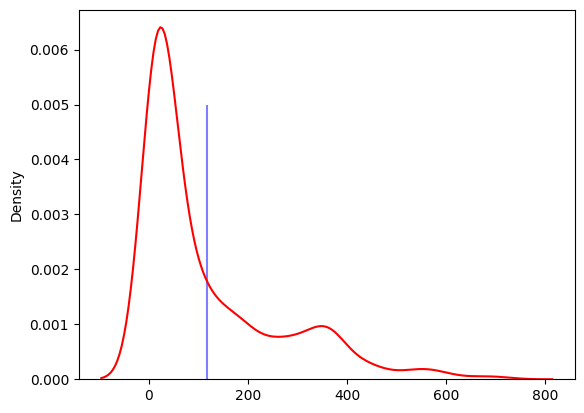

In [141]:
display(non_pay_duration)
display(non_pay_duration['non_pay_duration'].dt.total_seconds())
data = list(((non_pay_duration['non_pay_duration'].dt.total_seconds()) / (60 * 60 * 24)).round(0).astype(int))
data = [ x for x in data if x != 0 ]
mean = np.mean(data)

print(mean)
plt.vlines(mean, 0, 0.005, color='blue', alpha=0.5)
sns.kdeplot(data, color='red', label='non_pay_duration')

user_id
1        281 days 09:19:33.562000
2        267 days 12:14:33.623000
6         32 days 22:45:43.389000
21         3 days 09:37:39.057000
33        43 days 23:19:04.203000
                   ...           
179738    68 days 00:28:21.579000
179741     0 days 00:50:47.569000
179744   120 days 00:53:56.907000
179745   252 days 06:35:52.528000
179751   102 days 03:59:46.901000
Name: total, Length: 20972, dtype: timedelta64[ns]

array([2.10055452e+12, 1.99695228e+12, 2.45958629e+11, ...,
       8.96074869e+11, 1.88322214e+12, 7.62668948e+11])

200.5527295610677


<Axes: title={'center': 'pay_duration(Day)'}, ylabel='Density'>

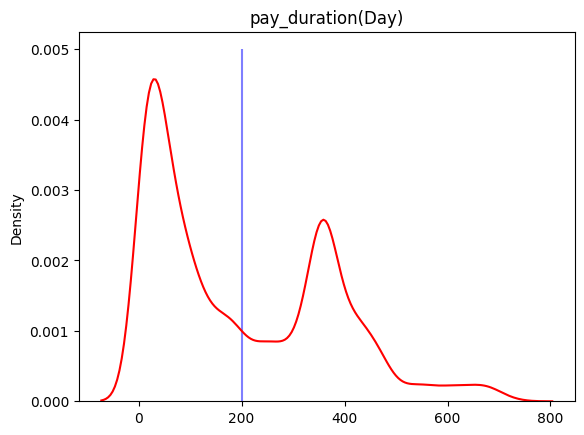

In [142]:
display(pay_duration)
display(pay_duration.values.astype(float) / 1000000000 * 60 * 60 * 24)
data = list((pay_duration.values.astype(float) / (1000000000 * 60 * 60 * 24)).round(0).astype(int))
data = [ x for x in data if x > 0 ]
mean = np.mean(data)

print(mean)
plt.vlines(mean, 0, 0.005, color='blue', alpha=0.5)
plt.title('pay_duration(Day)')
sns.kdeplot(data, color='red', label='pay_duration')

### 해적지표 살펴보기

#### **1. 획득**

1. **정의** : 회원가입을 한 유저
2. **정의 조건** : user_id ≠ ‘nan’( 회원 )
3. 이유: 회원 가입일자를 알 수 없는 고객의 수가 너무 많아서 \
complete.signup 데이터에서 확인 가능한 user_id에 국한되지 않음 
4. 주의사항 : 전체 회원 중 일부분(20% 가량)은 데이터 기간 밖에서 회원 가입을 함, \
획득 비율이나 비용계산은 어려우나, 회원 가입한 수는 complete.signup 데이터에서 확인할 수 있다, \ 
즉 비율과 비용을 구하는 것이 아닌, 이전에 수민님께서 이야기 하신 Frequency로 접근을 해야함

<Axes: title={'center': 'Cumulative Sign Up Count'}, xlabel='Date', ylabel='Count'>

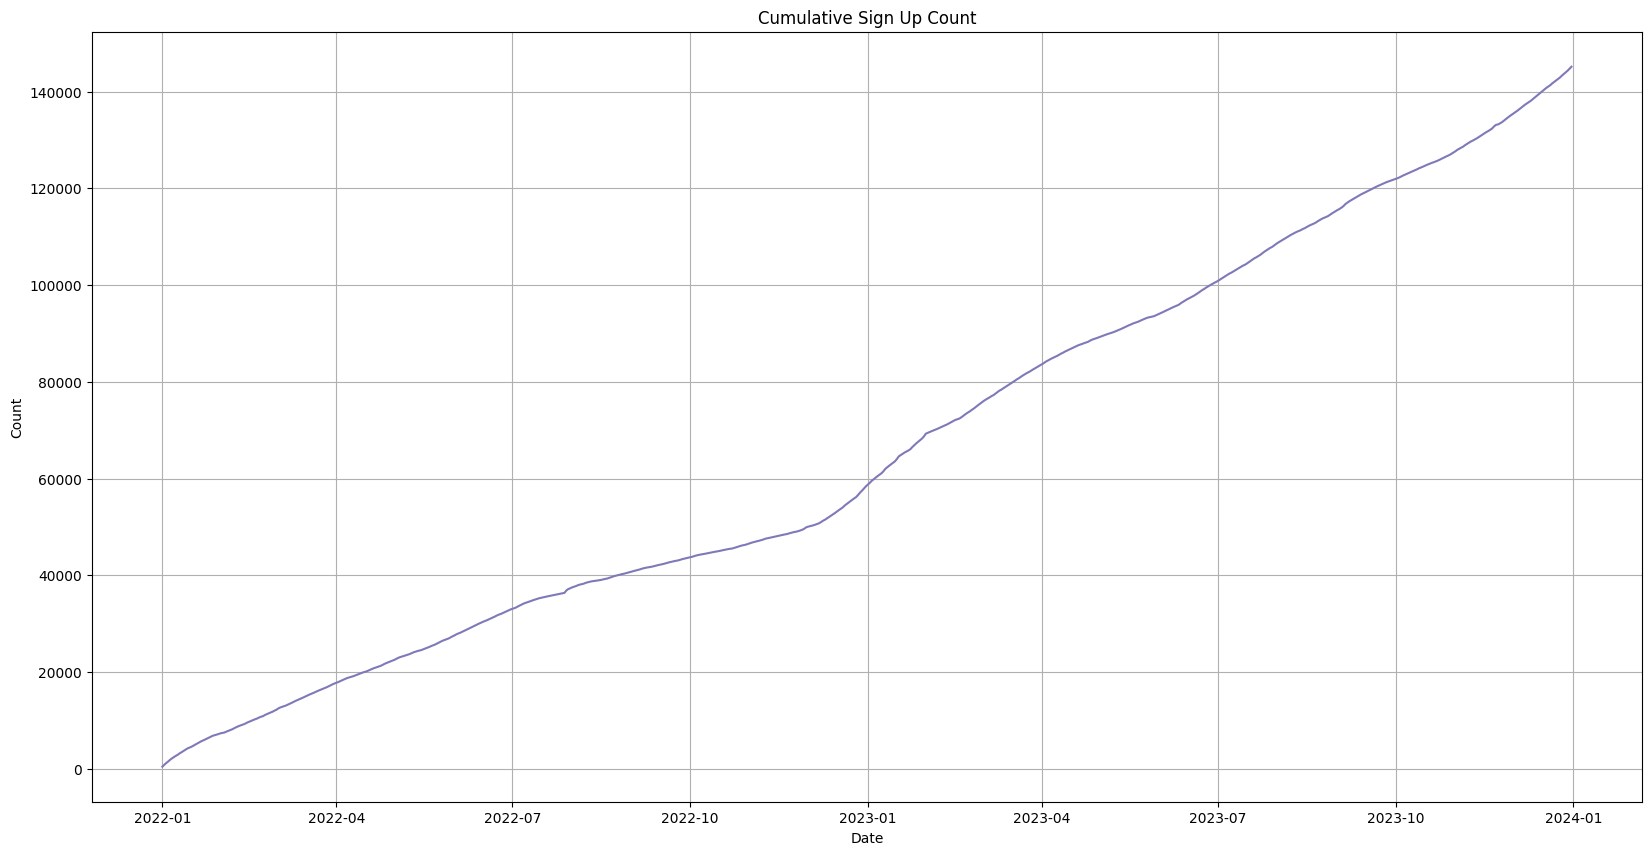

In [143]:
result = pd.concat([com_df_22[com_df_22['event_type'] == 3], com_df_23[com_df_23['event_type'] == 3]])
result = result\
    .groupby(result['client_event_time'].dt.date)['user_id']\
    .nunique().cumsum()

# 시간에 따른 회원가입한 고객수, 데이터 밖의 회원은 제외함
result.plot(figsize=(20, 10), title='Cumulative Sign Up Count', xlabel='Date', ylabel='Count', grid=True)

In [144]:
# 시간의 따른 누적 회원가입 수를 년도로 분할
user_cumsum_22 = result[result.index < pd.to_datetime('2023-01-01').date()] + 34624
user_cumsum_22.index = pd.to_datetime(user_cumsum_22.index).strftime('%m-%d')
user_cumsum_23 = result[result.index > pd.to_datetime('2022-12-31').date()] + 34624
user_cumsum_23.index = pd.to_datetime(user_cumsum_23.index).strftime('%m-%d')

#### **2. 활성화**

1. **정의** :
    1. **서비스 활성화** : 강의를 한 번이라도 완강한 유저 → 수강률, 완강률 분석으로 연결
    daily, weekly, monthly 활성화 유저 → 학습 패턴으로 연결 가능
2. **정의 조건** : complete lesson.count() > 0
3. 이유: “강의가 이 서비스의 핵심 가치이므로, lesson에서 활성화 조건을 정의”

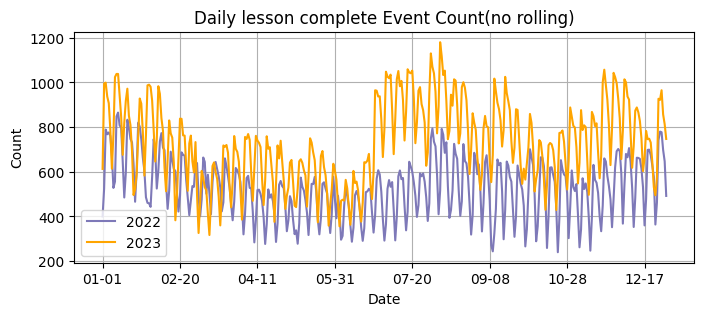

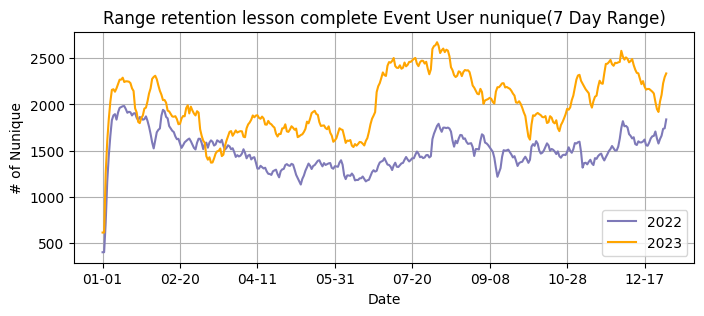

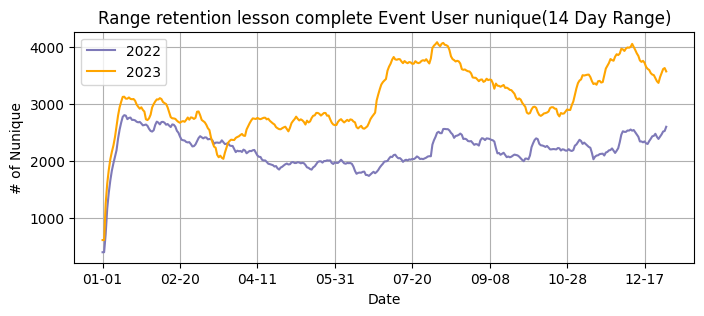

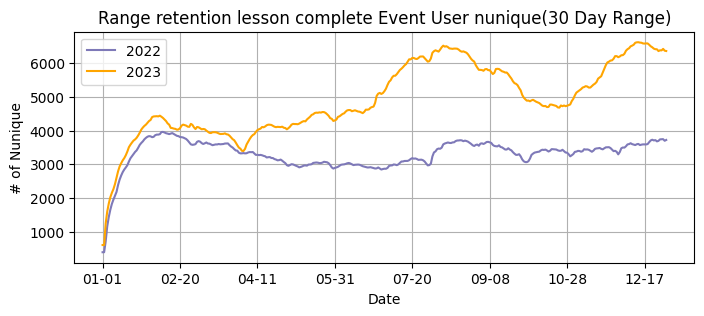

In [145]:
# 누적 카운트 기간별 시간에 따른 활성화한 유저 수
ONLY_NEW_USER = False
user_id_in_df = user_indexs[user_indexs['event_type'] == 3]['user_id'].unique()

# 대상 데이터 설정
if ONLY_NEW_USER:
    dfs = [
        com_df_22.loc[(com_df_22['event_type'] == 14) & com_df_22['user_id'].isin(user_id_in_df), ['user_id', 'client_event_time']],
        com_df_23.loc[(com_df_23['event_type'] == 14) & com_df_23['user_id'].isin(user_id_in_df), ['user_id', 'client_event_time']]
    ]
else:
    dfs = [
        com_df_22.loc[com_df_22['event_type'] == 14, ['user_id', 'client_event_time']],
        com_df_23.loc[com_df_23['event_type'] == 14, ['user_id', 'client_event_time']]
    ]

# 시간 목록
timelists = [
    pd.date_range('2022-01-01', '2022-12-31', freq='D').floor("D"),
    pd.date_range('2023-01-01', '2023-12-31', freq='D').floor("D")
]

# result, temp 선언
results = [[], []]
temps = [[], []]

# 결과 생성
for i in range(2):
    results[i] = dfs[i].groupby(dfs[i]['client_event_time'].dt.strftime("%m-%d"))['user_id'].nunique()
    temps[i] = pd.DataFrame(["01-01", results[i].iloc[0]])
    temps[i] = temps[i].T
    temps[i].columns = ['date', 'user_id_unique']

# 확인
results[0].plot(figsize=(8, 3), label='2022', title='Daily lesson complete Event Count(no rolling)', xlabel='Date', ylabel='Count', grid=True)
results[1].plot(figsize=(8, 3), label='2023', xlabel='Date', grid=True)
plt.legend()
plt.show()

# result_list 선언
result_list = [[], []]

for i in range(2):
    result_list[i] = [ results[i].copy() ]
    
# 이동 카운트
for rolling_offset in [7, 14, 30]:
    # 이동 카운트 결과 선언
    results = [
        pd.DataFrame(temps[0].copy(), columns=['date', 'user_id_unique']),
        pd.DataFrame(temps[1].copy(), columns=['date', 'user_id_unique'])
    ]
    
    # 결과 생성
    for j in range(2):
        for i in range(1, 365):
            # 시작 날짜 설정
            if i <= rolling_offset - 1:
                min_data = timelists[j][0]
            else:
                min_data = timelists[j][i + 1 - rolling_offset]
            
            # 이동 결과 생성
            rolling_result = dfs[j]\
                .loc[((dfs[j]['client_event_time'] >= pd.Timestamp(min_data))\
                    & (dfs[j]['client_event_time'] <= pd.Timestamp(timelists[j][i]))), 'user_id']\
                        .nunique()

            # 임시 결과 생성
            temp = pd.DataFrame([timelists[j][i].strftime("%m-%d"), rolling_result])
            temp = temp.T
            temp.columns = ['date', 'user_id_unique']
                
            # 결합 및 결과 생성    
            results[j] = pd.concat([results[j], temp])

        # 인덱스 생성
        results[j].set_index('date', inplace=True)
        
        # result_list에 결과 추가
        result_list[j].append(results[j].copy())

    # 결과 시각화 확인
    results[0]['user_id_unique'].plot(figsize=(8, 3), label = '2022', title=f'Range retention lesson complete Event User nunique({rolling_offset} Day Range)', xlabel='Date', ylabel='# of Nunique', grid=True)
    results[1]['user_id_unique'].plot(figsize=(8, 3), label = '2023', xlabel='Date', grid=True)
    
    plt.legend()
    plt.show()

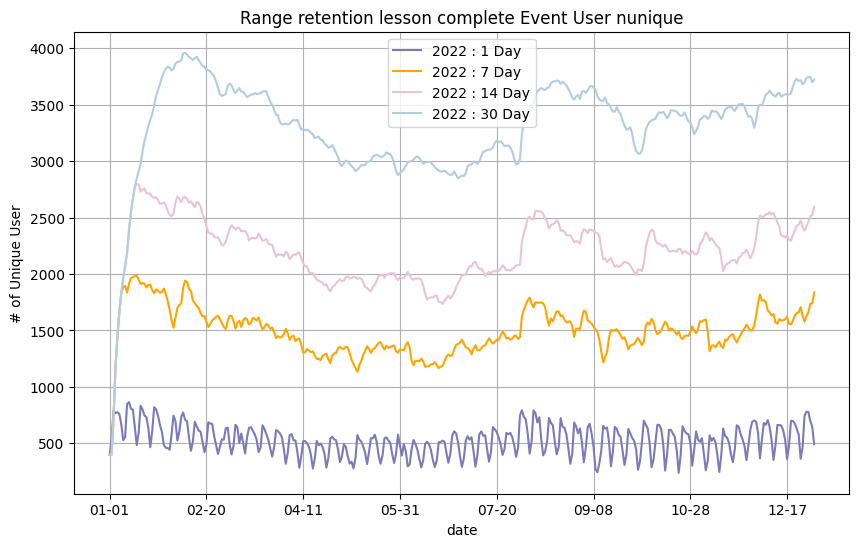

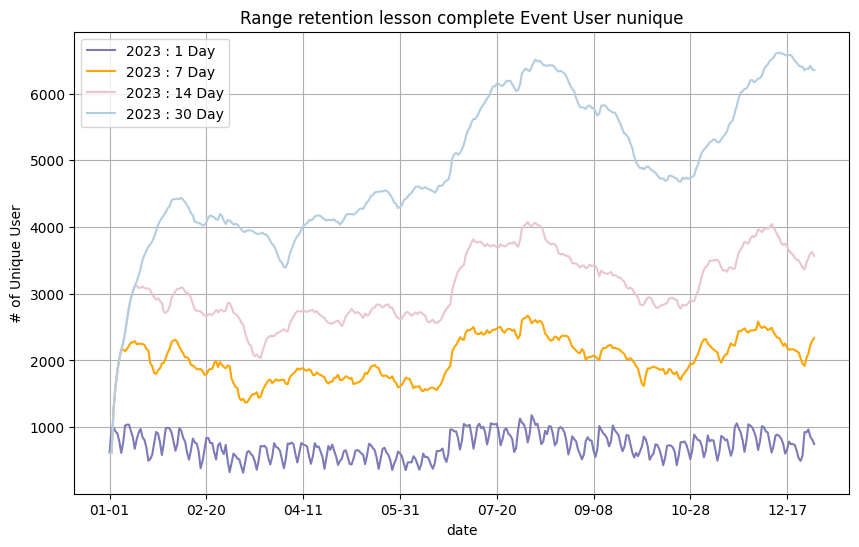

In [146]:
# 결과를 년도별로 시각화
for i in range(2):
    result_list[i][0].plot(figsize=(10, 6), title=f'Range retention lesson complete Event User nunique', xlabel='Date', ylabel='# of Unique User', grid=True, label = f'{2022+i} : 1 Day')
    result_list[i][1]['user_id_unique'].plot(figsize=(10, 6), grid=True, label = f'{2022+i} : 7 Day')
    result_list[i][2]['user_id_unique'].plot(figsize=(10, 6), grid=True, label = f'{2022+i} : 14 Day')
    result_list[i][3]['user_id_unique'].plot(figsize=(10, 6), grid=True, label = f'{2022+i} : 30 Day')
    
    plt.legend()
    plt.show()

In [147]:
%%skip  # << skipping >>
# retention 으로 대체 가능해서 건너뜀

# 년도별 활성화 수 / 누적 유저 수 시각화
user_cumsum_list = [user_cumsum_22, user_cumsum_23]
# 시각화
for i in range(2):
    (result_list[i][0] / user_cumsum_list[i]).plot(figsize=(10, 6), title=f'Range retention lesson complete Event User nunique', xlabel='Date', ylabel='# of Unique User', grid=True, label = f'{2022+i} : 1 Day')
    (result_list[i][1]['user_id_unique'] / user_cumsum_list[i]).plot(figsize=(10, 6), grid=True, label = f'{2022+i} : 7 Day')
    (result_list[i][2]['user_id_unique'] / user_cumsum_list[i]).plot(figsize=(10, 6), grid=True, label = f'{2022+i} : 14 Day')
    (result_list[i][3]['user_id_unique'] / user_cumsum_list[i]).plot(figsize=(10, 6), grid=True, label = f'{2022+i} : 30 Day')
    
    plt.legend()
    plt.show()

#### **3. 유지**

1. 정의: 시작일 기준 -  lesson_complete
    1. 7일 : 활성화시 7일간 리텐션 간주
    2. 14일 : 활성화시 14일간 리텐션 간주
    3. 30일 : 활성화시 30일간 리텐션 간주
2. 정의 조건: complete lesson.count() > 0
3. 이유 : [ 2. 활성화 ]와 동일

In [148]:
## 기본 데이터

# 리텐션 측정 기간 설정
retention_range = 120

# base_df 기본 데이터 셋
base_df = pd.concat([com_df_22[com_df_22['event_type'] == 14], com_df_23[com_df_23['event_type'] == 14]])
base_df = base_df[['user_id', 'client_event_time']]

# base_user 기본 유저 풀
base_user = pd.concat([com_df_22[com_df_22['event_type'] == 3], com_df_23[com_df_23['event_type'] == 3]])
base_user = base_user[['user_id', 'client_event_time']]
base_user = base_user.rename(columns={'client_event_time' : 'sign_up_time'})

# 유저별 첫 활성화 시간
first_active = base_df.groupby('user_id')['client_event_time'].min()

base_user = pd.merge(base_user, first_active, on='user_id', how='left')
base_user.rename(columns={'client_event_time' : 'first_Active'}, inplace=True)
base_user.fillna({'first_Active' : MAX_DATE}, inplace=True)
base_user

user_id            sign_up_time            first_Active
0         75470 2022-01-01 00:06:31.232 2023-12-31 23:59:35.209
1        116537 2022-01-01 00:10:21.400 2023-12-31 23:59:35.209
2         91459 2022-01-01 00:10:49.730 2023-12-31 23:59:35.209
3         52661 2022-01-01 00:12:18.251 2023-12-31 23:59:35.209
4         85468 2022-01-01 00:26:03.194 2023-12-31 23:59:35.209
...         ...                     ...                     ...
145128    94982 2023-12-31 23:26:30.981 2023-12-31 23:59:35.209
145129    19383 2023-12-31 23:29:56.754 2023-12-31 23:38:50.860
145130      343 2023-12-31 23:31:56.109 2023-12-31 23:59:35.209
145131    92860 2023-12-31 23:38:08.737 2023-12-31 23:59:35.209
145132    22618 2023-12-31 23:51:53.728 2023-12-31 23:59:35.209

[145133 rows x 3 columns]

In [149]:
# 시각화 x축 라벨 설정
user_date_range = pd.date_range('2021-12-31', '2023-12-31', freq='M').floor("D")
print(user_date_range)

DatetimeIndex(['2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30',
               '2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31',
               '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31',
               '2023-08-31', '2023-09-30', '2023-10-31', '2023-11-30',
               '2023-12-31'],
              dtype='datetime64[ns]', freq=None)


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22036\2546891769.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  user_date_range = pd.date_range('2021-12-31', '2023-12-31', freq='M').floor("D")


In [150]:
def get_retention(base_df, user, target_name, retention_range, start_base):
    '''
    #### 리텐션을 시각화하고 결과 값을 반환합니다. \n
     \n
    base_df : pd.DataFrame : 기본 데이터 셋 \n
    user : pd.DataFrame : user df \n
    target_name : str : 그룹 이름 \n
    retention_range : int : retention range \n
    start_base : str : 시작 기준 \n
     \n
    return : pd.DataFrame : 결과 \n
    '''
    
    # 예외사항 처리
    if user.empty:
        return None
    
    # 데이터 생성
    result = pd.merge(base_df, user, on='user_id', how='inner')
    result['active_day'] = (result['client_event_time'] - result[start_base]).dt.days
    result = result.drop('client_event_time', axis=1)
    result = result.drop(result[result['active_day'] < 0].index, axis=0)
    result = result.drop_duplicates(['user_id', 'active_day'])

    # 최대값 설정
    if start_base == 'sign_up_time':
        max_nunique = user['user_id'].nunique()
    else:
        max_nunique = result['user_id'].nunique()

    # max_active_day 설정
    max_active_day = result['active_day'].max()
    if max_active_day > retention_range:
        max_active_day = retention_range

    # retentions 선언
    retentions = []

    # retention 생성
    for window_size in [1, 7, 14, 30]:
        # retention 초기화
        retention = pd.DataFrame(columns=['active_day', 'nunique'])
        
        # 초기 데이터 생성
        temp_init_df = pd.DataFrame([[max, 0] for max in range(window_size)], columns=['active_day', 'nunique'])          
        retention = pd.concat([retention, temp_init_df])
        
        # retention data 생성
        for min in range(max_active_day - window_size + 1):
            max = min + window_size
            mask = (result['active_day'] >= min) & (result['active_day'] < max)
            temp = result.loc[mask, 'user_id'].nunique()
            retention = pd.concat([retention, pd.DataFrame([[max, temp]], columns=['active_day', 'nunique'])])
        
        # retention 값 계산
        retention['nunique'] = retention['nunique'] / max_nunique * 100
        retention.loc[retention['active_day'] < window_size, 'nunique'] = retention['nunique'].max()
        retention.set_index('active_day', inplace=True)
        
        # 결과 추가
        retentions.append(retention)

    # add plotting
    for i, window_size in enumerate([1, 7, 14, 30]):
        retentions[i]['nunique'].plot(figsize=(8, 3), label=f'{window_size} Day', title=f'{target_name} Range Retention', xlabel=f'N-Day after {start_base}', ylabel='Retention Rate', grid=True)

    # 시각화 설정
    plt.legend()
    plt.vlines(1, 0, 10, color='gray', alpha=0.3, linestyles='dashed')
    plt.vlines(7, 0, 10, color='gray', alpha=0.3, linestyles='dashed')
    plt.vlines(14, 0, 10, color='gray', alpha=0.3, linestyles='dashed')
    plt.vlines(30, 0, 10, color='gray', alpha=0.3, linestyles='dashed')
    plt.vlines(60, 0, 10, color='gray', alpha=0.3, linestyles='dashed')
    plt.vlines(90, 0, 10, color='gray', alpha=0.3, linestyles='dashed')

    # 시각화
    plt.show()
    
    # 결과 반환
    return pd.DataFrame([[target_name, 
                          round(retentions[0]['nunique'][2], 2), 
                          round(retentions[0]['nunique'][3], 2),
                          round(retentions[1]['nunique'][14], 2),
                          round(retentions[1]['nunique'][21], 2),
                          round(retentions[3]['nunique'][60], 2),
                          round(retentions[3]['nunique'][90], 2)]], 
                        columns=['group_name'
                                 , 'day1', 'day2'
                                 , 'week1', 'week2'
                                 , 'month1', 'month2'])

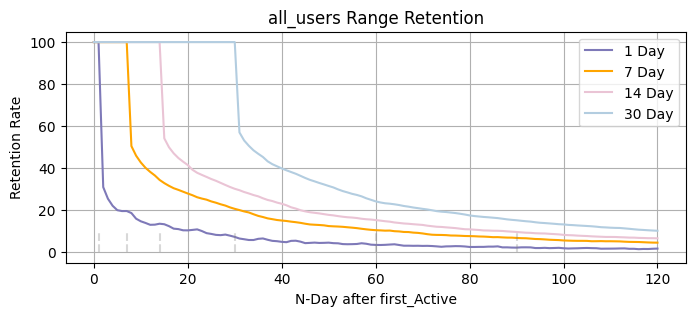

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22036\1814137644.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_retention_df = pd.concat([all_retention_df, result])


group_name   day1   day2  week1  week2  month1  month2
0  all_users  30.93  25.41  34.36  27.07   24.15   15.15

In [151]:
## 전체 유저에 대한 리텐션 분석
all_retention_df = pd.DataFrame(columns=['group_name'
                                 ,'day1', 'day2'
                                 , 'week1', 'week2'
                                 , 'month1', 'month2'])

# 리텐션 측정 구간에 따른 데이터 max_timeline 설정
max_timeline = MAX_DATE - pd.Timedelta(retention_range, unit='D')
# max_timeline으로 필터링
user = base_user[base_user['sign_up_time'] < max_timeline]

# 전체 유저 리텐션 분석
target_name = 'all_users'
result = get_retention(base_df, user, target_name, retention_range, 'first_Active')

all_retention_df = pd.concat([all_retention_df, result])
all_retention_df.reset_index(drop=True, inplace=True)
all_retention_df

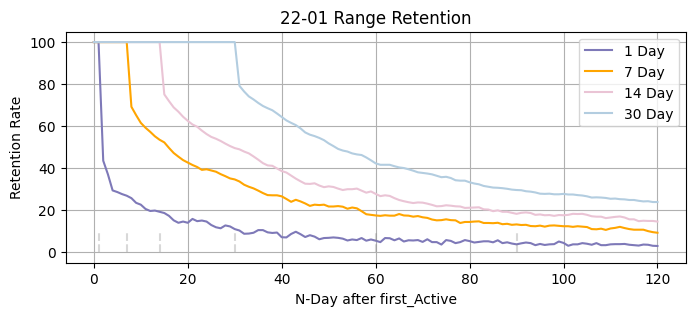

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22036\2046658793.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  retention_index_df = pd.concat([retention_index_df, result])


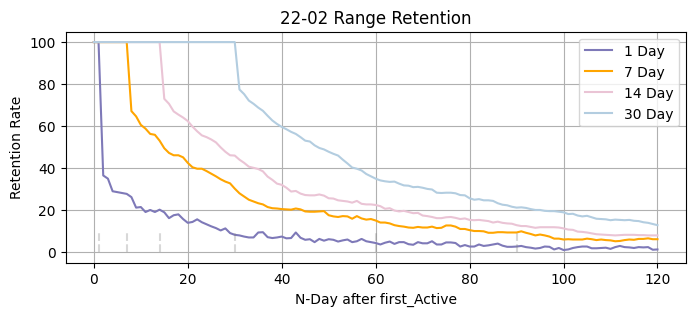

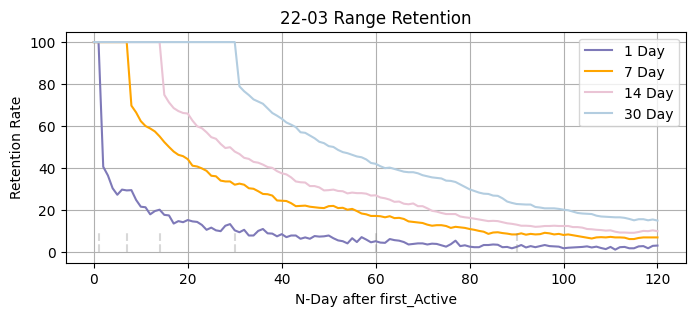

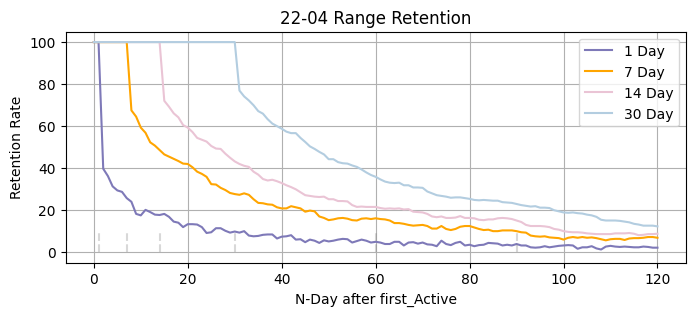

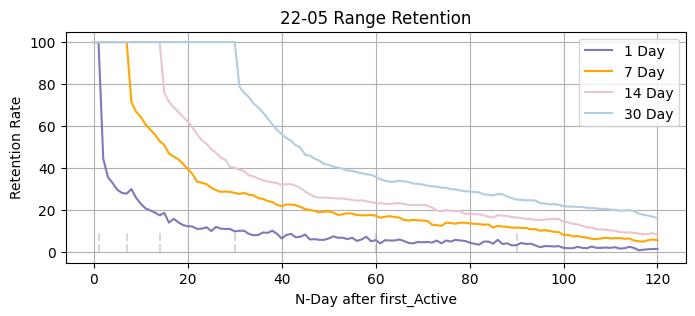

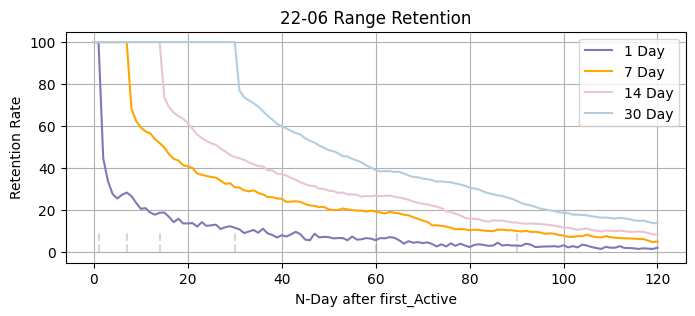

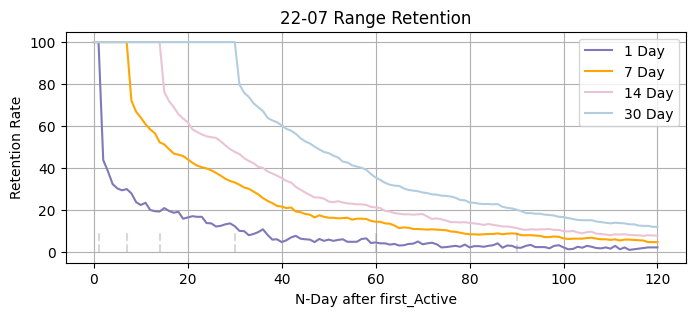

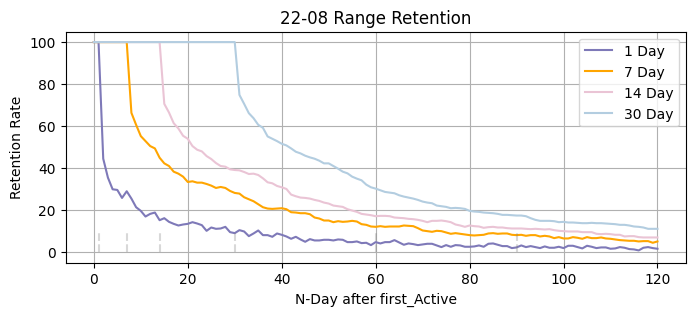

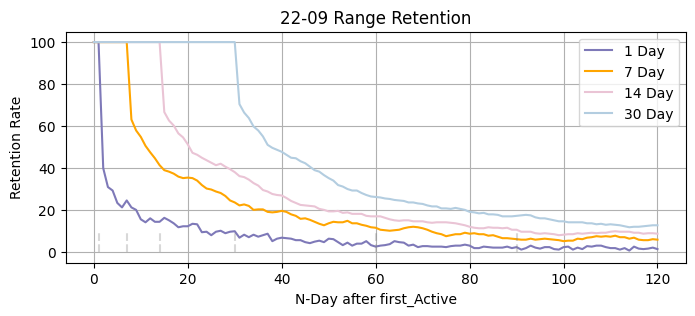

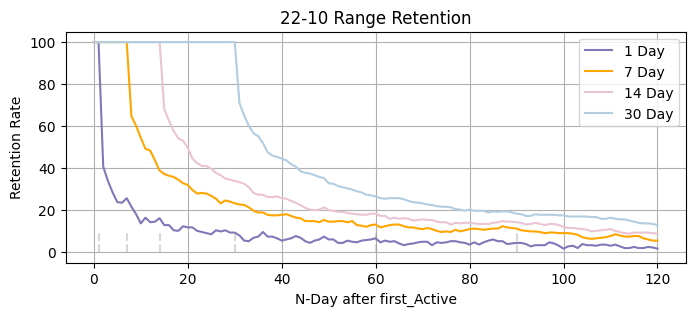

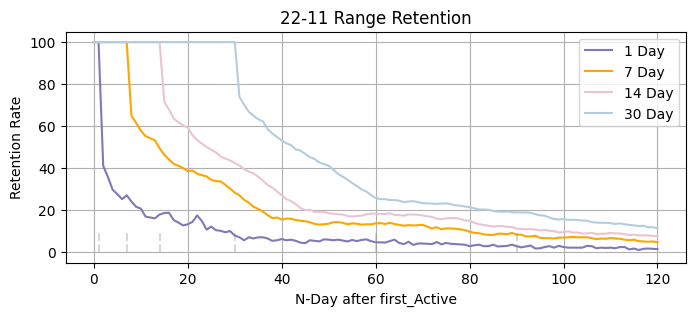

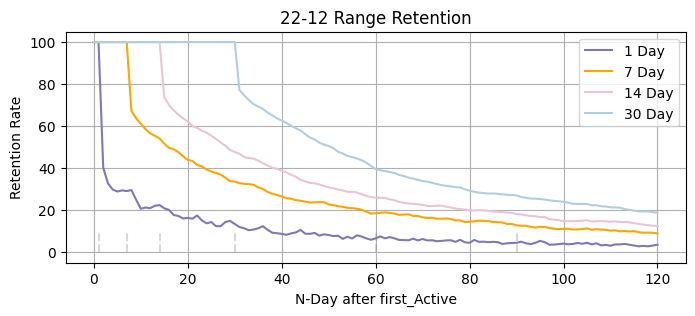

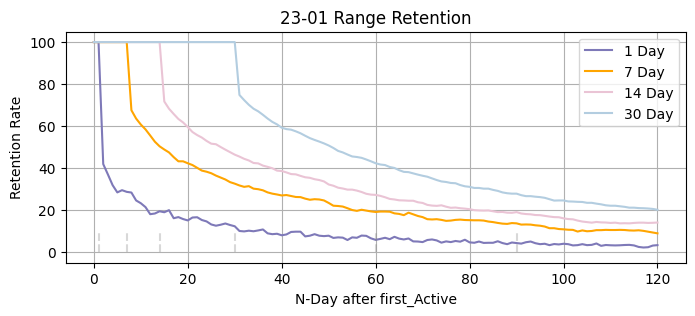

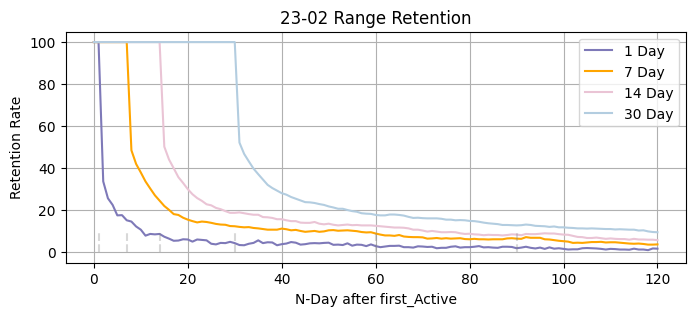

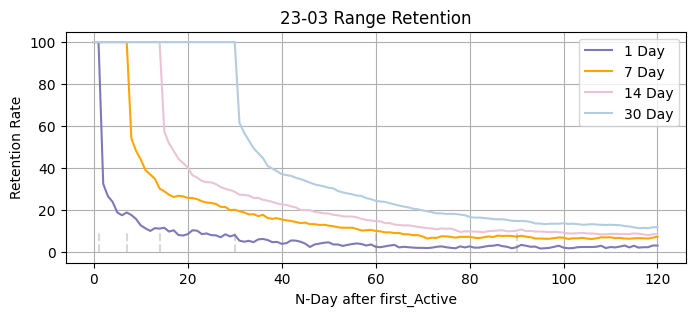

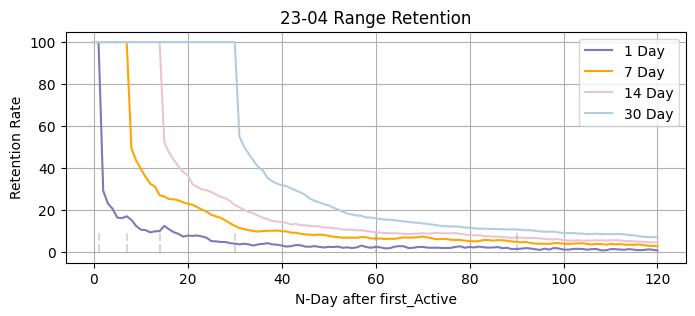

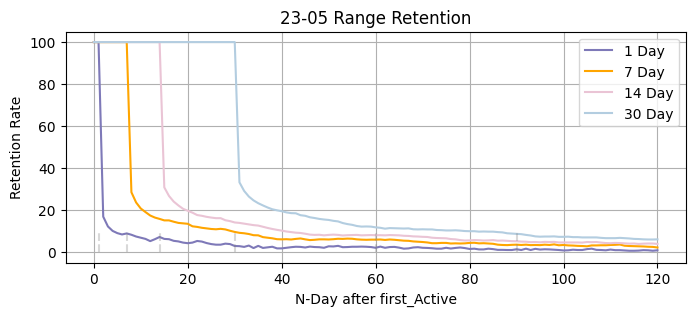

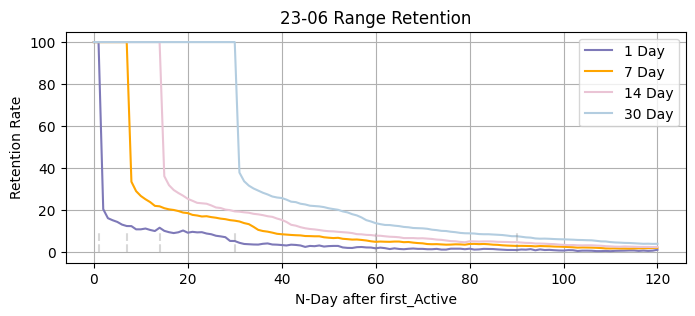

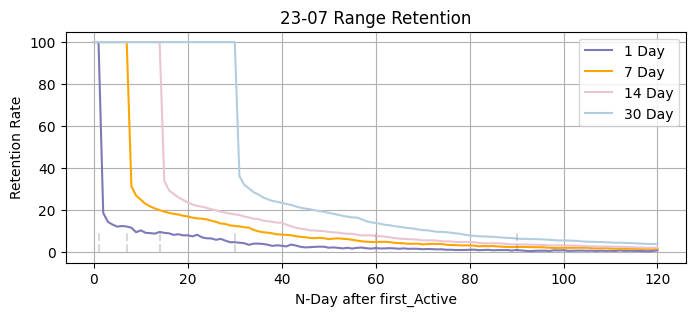

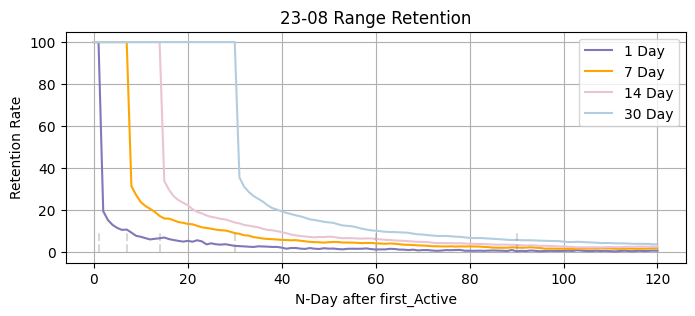

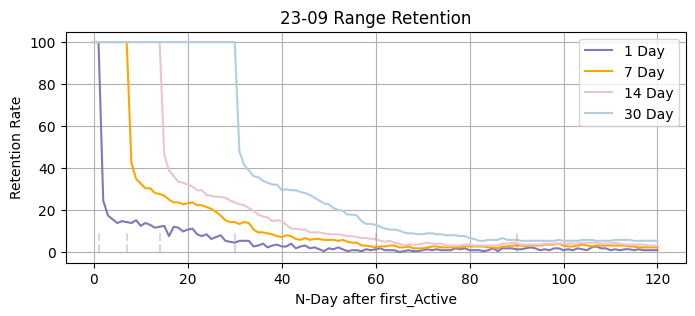

group_name   day1   day2  week1  week2  month1  month2 user_cnt
0       22-01  43.51  37.02  53.49  41.47   42.25   29.55     7166
1       22-02  36.49  34.96  53.06  40.39   34.96   21.17     4628
2       22-03  40.62  36.48  55.11  41.14   42.04   22.90     5653
3       22-04  39.69  36.19  48.60  40.38   35.84   22.90     4758
4       22-05  44.50  35.67  52.83  37.17   35.83   25.00     4921
5       22-06  44.66  33.83  51.93  40.06   39.02   24.48     5601
6       22-07  43.83  38.48  52.30  42.50   35.51   20.21     4419
7       22-08  44.46  35.44  44.94  33.70   30.22   17.41     3419
8       22-09  39.95  30.97  41.37  35.22   26.24   17.26     2977
9       22-10  40.71  33.88  38.80  29.51   26.50   18.31     2804
10      22-11  40.99  35.77  49.44  38.87   25.77   18.87     3254
11      22-12  40.26  32.72  54.11  43.38   39.50   26.94     8361
12      23-01  41.90  36.95  50.36  41.44   42.30   27.83    10741
13      23-02  33.64  25.61  24.49  14.74   17.68   12.70     6459
14      23-03  32.46  26.61  30.24  25.71   24.40   14.82     7968
15      23-04  29.14  23.13  27.09  22.56   16.05   10.75     5847
16      23-05  16.85  12.20  15.80  12.27   11.78    8.67     4758
17      23-06  20.43  16.14  21.79  17.71   13.76    7.56     6666
18      23-07  18.64  14.36  20.00  16.37   13.82    6.43     7725
19      23-08  19.45  15.27  17.22  13.23   10.16    5.78     6903
20      23-09  24.55  17.41  27.68  23.66   12.95    5.80      702

In [170]:
## 년월에 따른 리텐션 분석
retention_index_df = pd.DataFrame(columns=['group_name'
                                 , 'day1', 'day2'
                                 , 'week1', 'week2'
                                 , 'month1', 'month2', 'user_cnt'])

# 리텐션 측정 구간에 따른 데이터 max_timeline 설정
max_timeline = MAX_DATE - pd.Timedelta(retention_range, unit='D')
    
# 년월별 리텐션 분석
for start, end in zip(user_date_range[:-1], user_date_range[1:]):
    # max_timeline 으로 필터링
    user = base_user[base_user['sign_up_time'] < max_timeline]
    user = user[(user['sign_up_time'] >= start) & (user['sign_up_time'] < end)]

    # 예외 처리
    if user.empty or (user['user_id'].nunique() == 0):
        continue

    # 년월 리텐션 분석
    target_name = end.strftime('%y-%m')
    result = get_retention(base_df, user, target_name, retention_range, 'first_Active')
    result['user_cnt'] = user['user_id'].nunique()
    retention_index_df = pd.concat([retention_index_df, result])

# 결과 확인
retention_index_df.reset_index(drop=True, inplace=True)
retention_index_df

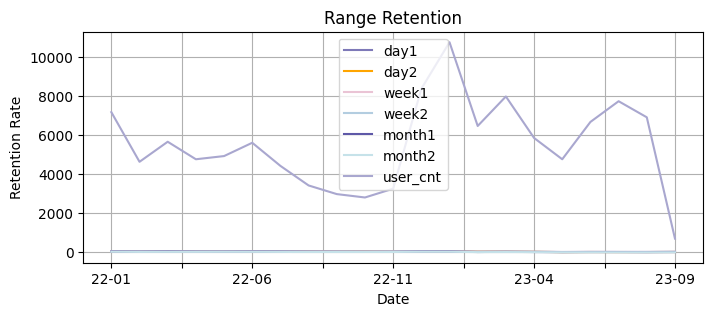

In [172]:
target_df = retention_index_df.set_index('group_name')

for col in target_df.columns:
    target_df[col].plot(figsize=(8, 3), title=f'Range Retention', xlabel='Date', ylabel='Retention Rate', grid=True)

plt.legend()
plt.show()

In [173]:
# 전체 리텐션 핵심 지표값 확인
retention_index_df = pd.concat([all_retention_df, retention_index_df])
retention_index_df.reset_index(drop=True, inplace=True)
retention_index_df

group_name   day1   day2  week1  week2  month1  month2 user_cnt
0   all_users  30.93  25.41  34.36  27.07   24.15   15.15      NaN
1       22-01  43.51  37.02  53.49  41.47   42.25   29.55     7166
2       22-02  36.49  34.96  53.06  40.39   34.96   21.17     4628
3       22-03  40.62  36.48  55.11  41.14   42.04   22.90     5653
4       22-04  39.69  36.19  48.60  40.38   35.84   22.90     4758
5       22-05  44.50  35.67  52.83  37.17   35.83   25.00     4921
6       22-06  44.66  33.83  51.93  40.06   39.02   24.48     5601
7       22-07  43.83  38.48  52.30  42.50   35.51   20.21     4419
8       22-08  44.46  35.44  44.94  33.70   30.22   17.41     3419
9       22-09  39.95  30.97  41.37  35.22   26.24   17.26     2977
10      22-10  40.71  33.88  38.80  29.51   26.50   18.31     2804
11      22-11  40.99  35.77  49.44  38.87   25.77   18.87     3254
12      22-12  40.26  32.72  54.11  43.38   39.50   26.94     8361
13      23-01  41.90  36.95  50.36  41.44   42.30   27.83    10741
14      23-02  33.64  25.61  24.49  14.74   17.68   12.70     6459
15      23-03  32.46  26.61  30.24  25.71   24.40   14.82     7968
16      23-04  29.14  23.13  27.09  22.56   16.05   10.75     5847
17      23-05  16.85  12.20  15.80  12.27   11.78    8.67     4758
18      23-06  20.43  16.14  21.79  17.71   13.76    7.56     6666
19      23-07  18.64  14.36  20.00  16.37   13.82    6.43     7725
20      23-08  19.45  15.27  17.22  13.23   10.16    5.78     6903
21      23-09  24.55  17.41  27.68  23.66   12.95    5.80      702

In [174]:
# 단계 전환률 추가
retention_index_df['d_rate'] = round(retention_index_df['day2'] / retention_index_df['day1'] * 100, 2)
retention_index_df['w_rate'] = round(retention_index_df['week2'] / retention_index_df['week1'] * 100, 2)
retention_index_df['m_rate'] = round(retention_index_df['month2'] / retention_index_df['month1'] * 100, 2)

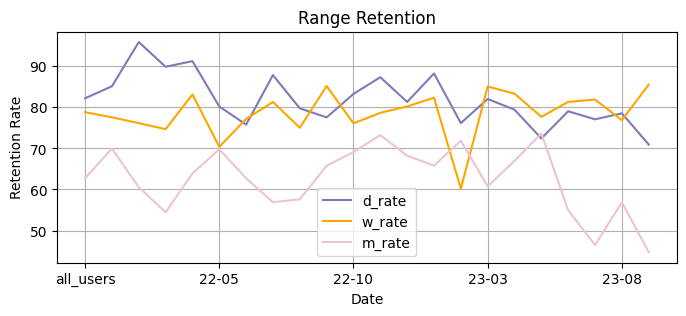

In [179]:
# 단계 전환률 시각화
target_df = retention_index_df.set_index('group_name')

for col in target_df.columns[7:]:
    target_df[col].plot(figsize=(8, 3), title=f'Range Retention', xlabel='Date', ylabel='Retention Rate', grid=True)

plt.legend()
plt.show()

In [189]:
temp = retention_index_df.copy()
temp.iloc[1:, 1:7] = temp.iloc[1:, 1:7] - temp.iloc[0, 1:7]
temp.iloc[1:, 8:10] = temp.iloc[1:, 8:10] - temp.iloc[0, 8:10]
temp['score'] = temp.iloc[:, 1:6].sum(axis=1)
temp


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22036\1866094482.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[12.579999999999998 5.560000000000002 9.689999999999998 8.759999999999998
 13.57 13.729999999999997 12.899999999999999 13.530000000000001
 9.020000000000003 9.780000000000001 10.060000000000002 9.329999999999998
 10.969999999999999 2.710000000000001 1.5300000000000011
 -1.7899999999999991 -14.079999999999998 -10.5 -12.29 -11.48
 -6.379999999999999]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  temp.iloc[1:, 1:7] = temp.iloc[1:, 1:7] - temp.iloc[0, 1:7]
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22036\1866094482.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[11.610000000000003 9.55 11.069999999999997 10.779999999999998
 10.26000000000000

group_name   day1   day2  week1  week2 month1 month2 user_cnt d_rate  \
0   all_users  30.93  25.41  34.36  27.07  24.15  15.15      NaN  82.15   
1       22-01  12.58  11.61  19.13   14.4   18.1   14.4     7166   2.93   
2       22-02   5.56   9.55   18.7  13.32  10.81   6.02     4628  13.66   
3       22-03   9.69  11.07  20.75  14.07  17.89   7.75     5653   7.66   
4       22-04   8.76  10.78  14.24  13.31  11.69   7.75     4758   9.03   
5       22-05  13.57  10.26  18.47   10.1  11.68   9.85     4921  -1.99   
6       22-06  13.73   8.42  17.57  12.99  14.87   9.33     5601   -6.4   
7       22-07   12.9  13.07  17.94  15.43  11.36   5.06     4419   5.64   
8       22-08  13.53  10.03  10.58   6.63   6.07   2.26     3419  -2.44   
9       22-09   9.02   5.56   7.01   8.15   2.09   2.11     2977  -4.63   
10      22-10   9.78   8.47   4.44   2.44   2.35   3.16     2804   1.07   
11      22-11  10.06  10.36  15.08   11.8   1.62   3.72     3254   5.12   
12      22-12   9.33   7.31  19.75  16.31  15.35  11.79     8361  -0.88   
13      23-01  10.97  11.54   16.0  14.37  18.15  12.68    10741   6.04   
14      23-02   2.71    0.2  -9.87 -12.33  -6.47  -2.45     6459  -6.02   
15      23-03   1.53    1.2  -4.12  -1.36   0.25  -0.33     7968  -0.17   
16      23-04  -1.79  -2.28  -7.27  -4.51   -8.1   -4.4     5847  -2.77   
17      23-05 -14.08 -13.21 -18.56  -14.8 -12.37  -6.48     4758  -9.75   
18      23-06  -10.5  -9.27 -12.57  -9.36 -10.39  -7.59     6666  -3.15   
19      23-07 -12.29 -11.05 -14.36  -10.7 -10.33  -8.72     7725  -5.11   
20      23-08 -11.48 -10.14 -17.14 -13.84 -13.99  -9.37     6903  -3.64   
21      23-09  -6.38   -8.0  -6.68  -3.41  -11.2  -9.35      702 -11.23   

   w_rate  m_rate   score  
0   78.78   62.73  141.92  
1   -1.25   69.94   75.82  
2   -2.66   60.55   57.94  
3   -4.13   54.47   73.47  
4    4.31   63.90   58.78  
5   -8.42   69.77   64.08  
6   -1.64   62.74   67.58  
7    2.48   56.91    70.7  
8   -3.79   57.61   46.84  
9    6.35   65.78   31.83  
10  -2.72   69.09   27.48  
11  -0.16   73.22   48.92  
12   1.39   68.20   68.05  
13   3.51   65.79   71.03  
14 -18.59   71.83  -25.76  
15   6.24   60.74    -2.5  
16    4.5   66.98  -23.95  
17  -1.12   73.60  -73.02  
18    2.5   54.94  -52.09  
19   3.07   46.53  -58.73  
20  -1.95   56.89  -66.59  
21    6.7   44.79  -35.67

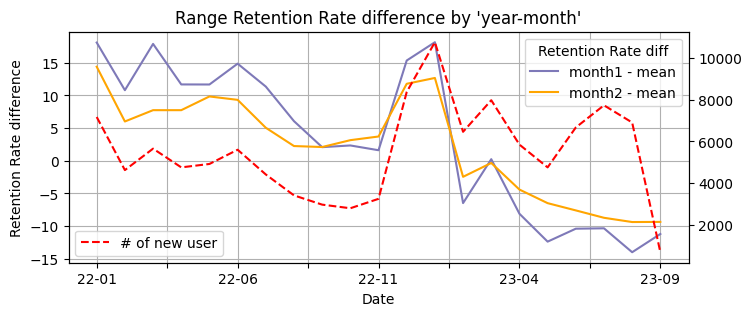

In [206]:
# 시간에 따른 핵심 지표의 평균값과의 차이 시각화
target_df = temp.set_index('group_name')

ax = target_df.iloc[1:, 4:6].plot(figsize=(8, 3), 
                             title=f"Range Retention Rate difference by 'year-month'", 
                             xlabel='Date', 
                             ylabel='Retention Rate difference', grid=True)

plt.legend(title = 'Retention Rate diff', labels = ['month1 - mean', 'month2 - mean'])

# double axis labels
ax2 = ax.twinx()
target_df[1:]['user_cnt'].plot(ax=ax2, color='red', linestyle='--', label='# of new user')

ax2.legend(loc='lower left')
plt.show()

#### content_df 및 content 특징 컬럼 생성

In [159]:
## 데이터 간소화
# 대상 컬럼
target_col = [
    'user_id', 
    'lesson.id', 
    'content.id',
    'client_event_time'
    ]

# 대상 데이터 생성
lesson_df_22 = df_2022.loc[df_2022['event_type'] == 14, target_col]
lesson_df_23 = df_2023.loc[df_2023['event_type'] == 14, target_col]
lesson_df = pd.concat([lesson_df_22, lesson_df_23], axis=0)
print(lesson_df.duplicated().sum())
lesson_df = lesson_df.drop_duplicates()

5


In [160]:
# content 난이도 컬럼 생성
content_diff = pd.concat([df_2022.loc[df_2022['event_type'] == 12, ['content.id', 'content.difficulty']]\
                        , df_2023.loc[df_2023['event_type'] == 12, ['content.id', 'content.difficulty']]]\
                        , axis=0)

# 인코더 확인
print(encoder_dict['content.difficulty'].classes_)
# max 확인
print(content_diff.groupby('content.id')['content.difficulty'].nunique().max())
# 난이도 확인 및 변환
display(content_diff['content.difficulty'])
content_diff['content.difficulty'] = content_diff['content.difficulty']\
                                .map({0 : 0, 1 : 3, 2 : 1, 4 : 2, 3 : 4, 5 : 5})
display(content_diff['content.difficulty'])

# 평균 난이도 확인
content_diff = content_diff.groupby('content.id')['content.difficulty'].mean().round(1)

# 결과 확인
content_diff = content_diff.reset_index()
display(content_diff)

# 결측치에 대한 기본 난이도 값
content_default_diff = 2.5

[nan 'advanced' 'beginner' 'hard' 'intermediate' None]
3


7867111     2
7867161     4
7867335     2
7867931     2
7867937     1
           ..
20007861    4
20007915    4
20007926    2
20007943    2
20007974    2
Name: content.difficulty, Length: 124917, dtype: int16

7867111     1
7867161     2
7867335     1
7867931     1
7867937     3
           ..
20007861    2
20007915    2
20007926    1
20007943    1
20007974    1
Name: content.difficulty, Length: 124917, dtype: int64

content.id  content.difficulty
0             4                 3.0
1             5                 2.0
2             7                 2.0
3             8                 2.0
4             9                 1.0
..          ...                 ...
146         207                 1.0
147         208                 2.0
148         209                 2.0
149         210                 1.0
150         211                 1.0

[151 rows x 2 columns]

In [161]:
# 콘텐츠 특성 컬럼 생성
con_nu = lesson_df.groupby(['content.id'])['user_id'].nunique().sort_values(ascending=False) 
display(con_nu)
con_les_nu = lesson_df.groupby(['content.id', 'lesson.id'])['user_id'].nunique().sort_values(ascending=False)
display(con_les_nu)
con_les_nu_mean = con_les_nu.groupby(['content.id']).mean()
display(con_les_nu_mean)
con_les_nu_cnt = con_les_nu.groupby(['content.id']).count()
display(con_les_nu_cnt)

limit_min_nu = int(con_nu.max() / con_nu.size)
target_con = con_nu[con_nu > limit_min_nu].index

denominator = con_les_nu_mean[con_les_nu_mean.index.isin(target_con)]
numerator = con_nu[con_nu.index.isin(target_con)]

display(denominator.sort_values())
display(numerator.sort_values())
display(((denominator / numerator) * 100).sort_values() )

con_df = pd.DataFrame(numerator, columns=['con_nu'])
con_df['con_nu'] = numerator
con_df['con_les_nu_mean'] = round(denominator, 2)
con_df['num_of_effected_users'] = 0

con_df['con_les_nu_rate'] = round(denominator / numerator * 100, 2)
con_df['con_les_nu_cnt'] = con_les_nu_cnt[con_les_nu_cnt.index.isin(target_con)]

con_df['con_nu'] = con_df['con_nu'].astype(int)
con_df['con_les_nu_mean'] = con_df['con_les_nu_mean'].astype(int)

con_df = pd.merge(con_df, content_diff, on='content.id', how='left')
con_df.fillna({'content.difficulty' : content_default_diff}, inplace=True)

display(con_df)


content.id
201    25865
85     13701
200    12030
74      9415
93      8307
       ...  
49         1
158        1
160        1
174        1
19         1
Name: user_id, Length: 168, dtype: int64

content.id  lesson.id
201         4121         21534
            2074         20812
            3563         19977
            2664         19279
            480          18669
                         ...  
66          5274             1
160         5146             1
205         1436             1
160         4763             1
62          2486             1
Name: user_id, Length: 5050, dtype: int64

content.id
4       723.840000
5        35.000000
6        36.000000
7        30.000000
8       798.541667
          ...     
207       1.000000
208     138.540541
209       9.666667
210     108.379310
211    3355.181818
Name: user_id, Length: 168, dtype: float64

content.id
4      25
5       2
6       2
7       2
8      24
       ..
207     1
208    37
209    48
210    29
211    22
Name: user_id, Length: 168, dtype: int64

content.id
136       87.620690
133       91.657143
141       99.192308
170      101.968750
13       105.200000
           ...     
93      6148.000000
85      6989.714286
74      7707.888889
200     9592.704545
201    16047.777778
Name: user_id, Length: 92, dtype: float64

content.id
194      161
133      162
141      163
28       164
136      165
       ...  
93      8307
74      9415
200    12030
85     13701
201    25865
Name: user_id, Length: 92, dtype: int64

content.id
206     40.216390
208     43.159047
170     45.118916
159     47.609497
30      48.381688
          ...    
172     85.123031
204     85.985407
211     90.265855
52      93.835858
194    100.000000
Name: user_id, Length: 92, dtype: float64

content.id  con_nu  con_les_nu_mean  num_of_effected_users  \
0          201   25865            16047                      0   
1           85   13701             6989                      0   
2          200   12030             9592                      0   
3           74    9415             7707                      0   
4           93    8307             6148                      0   
..         ...     ...              ...                    ...   
87         136     165               87                      0   
88          28     164              120                      0   
89         141     163               99                      0   
90         133     162               91                      0   
91         194     161              161                      0   

    con_les_nu_rate  con_les_nu_cnt  content.difficulty  
0             62.04              18                 1.0  
1             51.02              21                 1.0  
2             79.74              44                 2.0  
3             81.87              27                 2.0  
4             74.01              20                 1.0  
..              ...             ...                 ...  
87            53.10              29                 4.0  
88            73.72              21                 3.0  
89            60.85              78                 3.0  
90            56.58              35                 3.0  
91           100.00               5                 2.0  

[92 rows x 7 columns]

#### 각 콘텐츠에 영향 받은 고객 집계

In [162]:
user_con_mean = lesson_df.groupby('user_id')['content.id'].nunique().mean()
user_con_cnt = lesson_df.groupby('user_id')['content.id'].count()

# 각 유저에 대해 그 유저가 접한 콘텐츠가 그 유저의 수업에 차지하는 비율
result = round(lesson_df.groupby(['user_id', 'content.id'])['content.id'].count() / user_con_cnt * 100, 2)
result = pd.DataFrame(result)
result = result.rename(columns={'content.id' : 'content_ratio'})
result = result.reset_index()

# 수업에 차지하는 비율이 가장 높은 콘텐츠만 확인
mask = result.groupby('user_id')['content_ratio'].idxmax()

content_effect_df = result.loc[mask]
content_effect_df = content_effect_df.reset_index(drop=True)

# base_ratio : 100% / 평균 콘텐츠, 콘텐츠 비율이 base_ratio 이상인 유저만 확인
base_ratio = int(100 / user_con_mean)
print(user_con_mean)

# 결과 확인
target_user = content_effect_df.loc[content_effect_df['content_ratio'] > base_ratio]
display(target_user)

4.147414608618642


user_id  content.id  content_ratio
0            1         200          39.53
1            2           8          50.00
2            6         167          41.07
3           12         159         100.00
5           15          85         100.00
...        ...         ...            ...
49677   179733         112          41.43
49678   179738         200          35.48
49679   179741         201         100.00
49680   179744         200          24.59
49681   179745         159         100.00

[43850 rows x 3 columns]

[0] : 194 : 161 : 100.0
Not enough user data : 194 lesson.user : 0 < 100
[1] : 52 : 2839 : 93.84
Not enough user data : 52 lesson.user : 6 < 100
[2] : 211 : 3717 : 90.27
Not enough user data : 211 lesson.user : 85 < 100
[3] : 204 : 4147 : 85.99
Not enough user data : 204 lesson.user : 49 < 100
[4] : 172 : 1594 : 85.12
Not enough user data : 172 lesson.user : 23 < 100
[5] : 108 : 5036 : 83.19
1506 : [193 535 643 666 736]


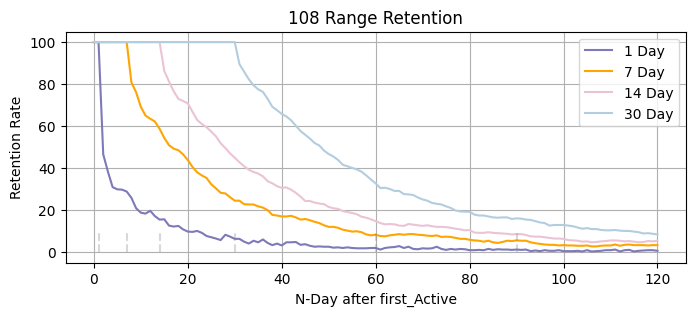

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22036\2801056022.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  retention_index_df2 = pd.concat([retention_index_df2, result])


[6] : 188 : 192 : 82.51
Not enough user data : 188 lesson.user : 0 < 100
[7] : 74 : 9415 : 81.87
163 : [1887 5574 5728 5874 5976]


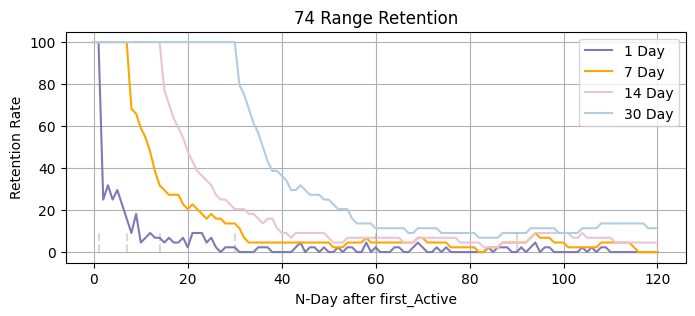

[8] : 36 : 356 : 81.24
Not enough user data : 36 lesson.user : 4 < 100
[9] : 100 : 3854 : 81.09
Not enough user data : 100 lesson.user : 38 < 100
[10] : 76 : 1932 : 80.78
Not enough user data : 76 lesson.user : 64 < 100
[11] : 38 : 1453 : 80.78
Not enough user data : 38 lesson.user : 18 < 100
[12] : 50 : 514 : 80.74
256 : [1451 1582 1641 3606 4107]


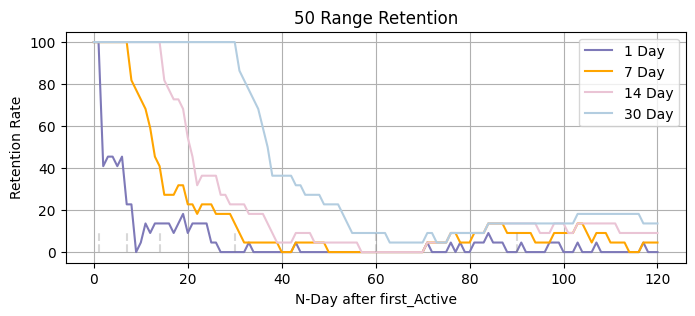

[13] : 116 : 1501 : 80.61
Not enough user data : 116 lesson.user : 9 < 100
[14] : 90 : 1293 : 80.55
Not enough user data : 90 lesson.user : 46 < 100
[15] : 18 : 308 : 80.04
Not enough user data : 18 lesson.user : 15 < 100
[16] : 4 : 907 : 79.81
Not enough user data : 4 lesson.user : 12 < 100
[17] : 200 : 12030 : 79.74
5675 : [ 1 20 21 33 55]


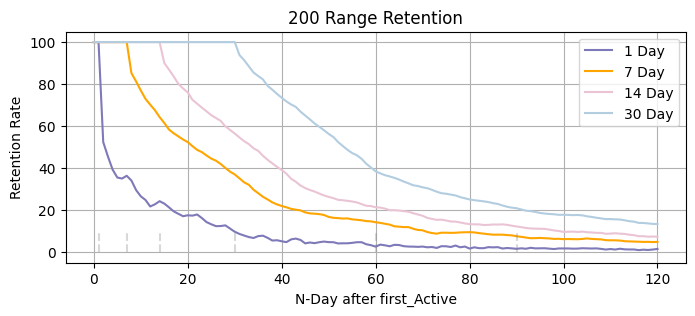

[18] : 110 : 692 : 79.39
Not enough user data : 110 lesson.user : 7 < 100
[19] : 181 : 4748 : 78.73
1578 : [ 25 288 372 471 672]


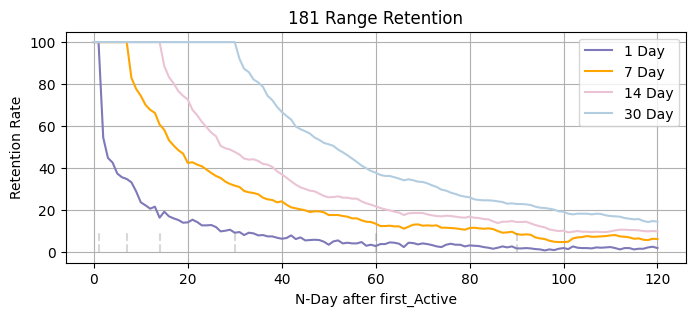

[20] : 22 : 3681 : 77.83
860 : [ 133  570  648  764 1142]


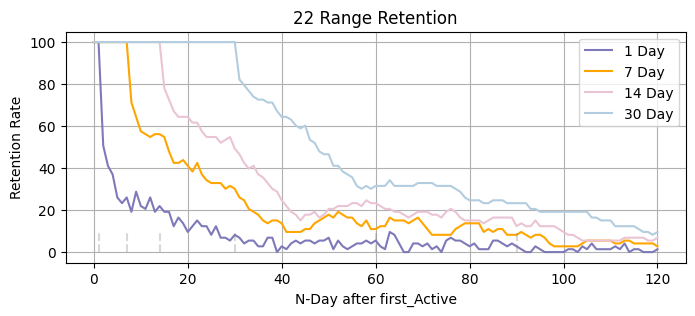

[21] : 61 : 4078 : 76.78
Not enough user data : 61 lesson.user : 96 < 100
[22] : 98 : 1576 : 75.84
Not enough user data : 98 lesson.user : 30 < 100
[23] : 119 : 2633 : 75.67
221 : [ 118  960 2193 3016 3349]


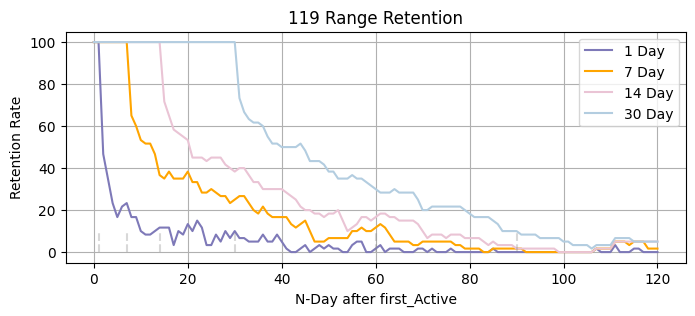

[24] : 150 : 2171 : 75.57
598 : [ 371  589  822  992 1064]


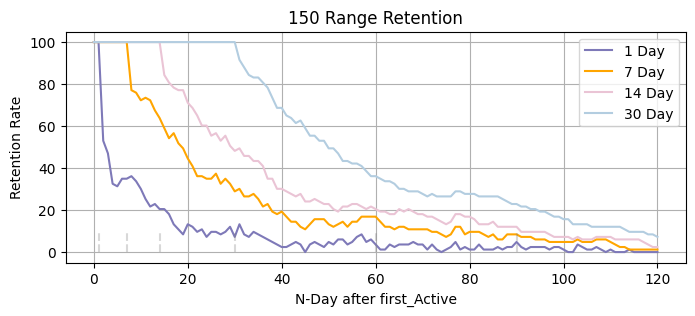

[25] : 129 : 713 : 75.09
Not enough user data : 129 lesson.user : 6 < 100
[26] : 190 : 1937 : 74.86
297 : [ 896  936 1754 2314 2913]


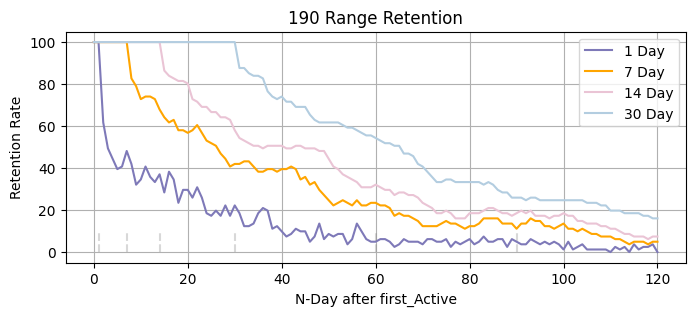

[27] : 89 : 2111 : 74.68
Not enough user data : 89 lesson.user : 23 < 100
[28] : 199 : 1409 : 74.52
Not enough user data : 199 lesson.user : 78 < 100
[29] : 103 : 717 : 74.45
Not enough user data : 103 lesson.user : 14 < 100
[30] : 93 : 8307 : 74.01
1814 : [ 72 502 579 599 623]


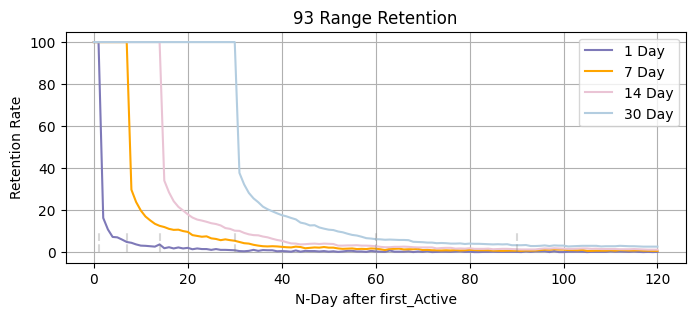

[31] : 139 : 367 : 73.93
Not enough user data : 139 lesson.user : 2 < 100
[32] : 28 : 164 : 73.72
Not enough user data : 28 lesson.user : 4 < 100
[33] : 165 : 658 : 73.13
Not enough user data : 165 lesson.user : 7 < 100
[34] : 167 : 1173 : 73.1
702 : [   6  888 1273 1612 2058]


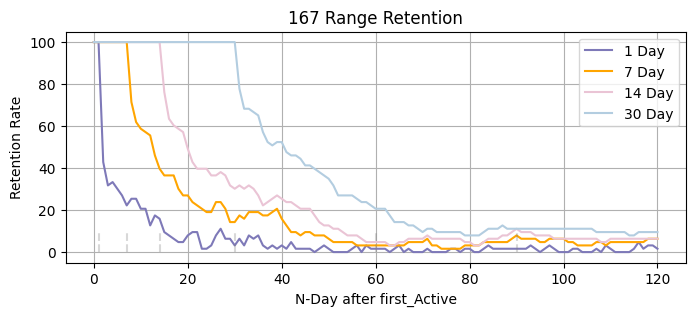

[35] : 147 : 7526 : 72.8
125 : [ 214 4145 5795 5967 8127]


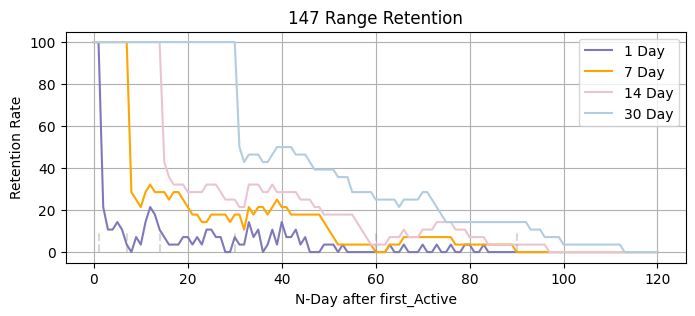

[36] : 92 : 1119 : 72.48
Not enough user data : 92 lesson.user : 21 < 100
[37] : 153 : 1738 : 71.68
340 : [ 409 2347 2499 3300 3697]


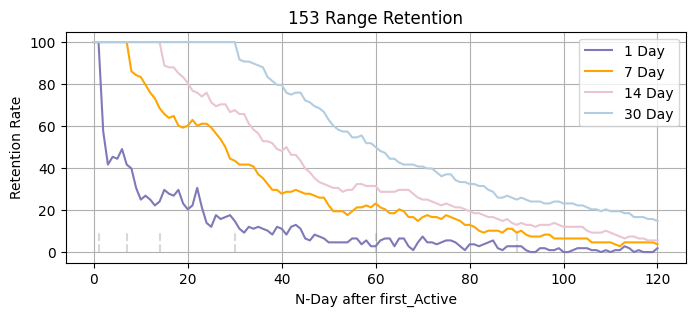

[38] : 66 : 1077 : 70.65
206 : [1698 1833 2454 4346 5216]


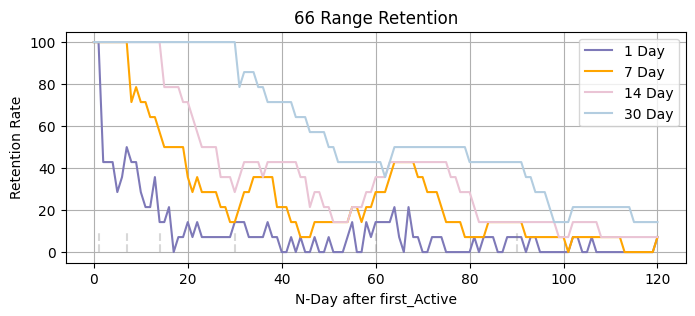

[39] : 83 : 424 : 70.63
Not enough user data : 83 lesson.user : 11 < 100
[40] : 177 : 6130 : 70.6
820 : [ 299  391  754 1087 1620]


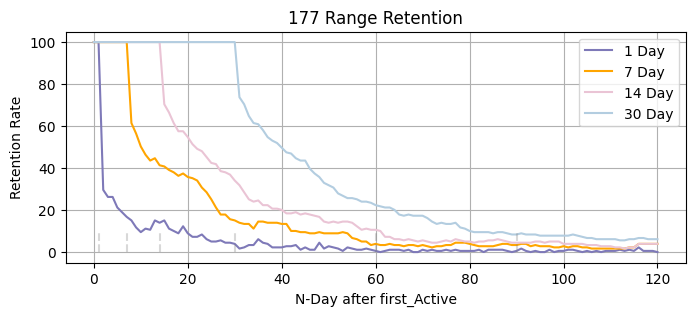

[41] : 65 : 2076 : 69.68
228 : [ 557  685  772 1100 1957]


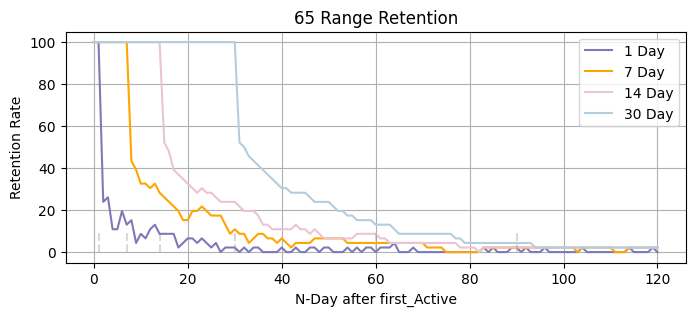

[42] : 171 : 245 : 69.6
Not enough user data : 171 lesson.user : 4 < 100
[43] : 142 : 686 : 69.51
Not enough user data : 142 lesson.user : 90 < 100
[44] : 193 : 1852 : 68.21
229 : [ 605  620 1160 1902 2102]


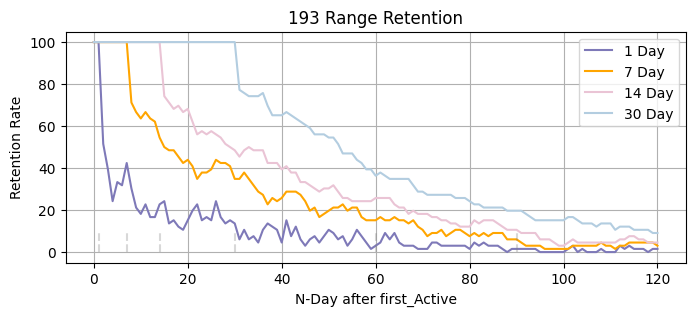

[45] : 106 : 1078 : 67.47
172 : [2813 4607 5060 6210 7105]


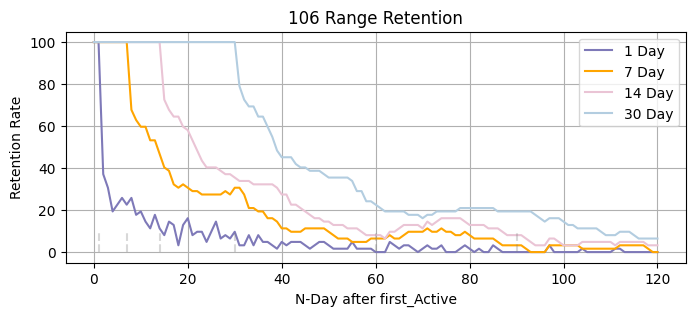

[46] : 144 : 2910 : 67.22
566 : [1380 1443 2326 2409 2569]


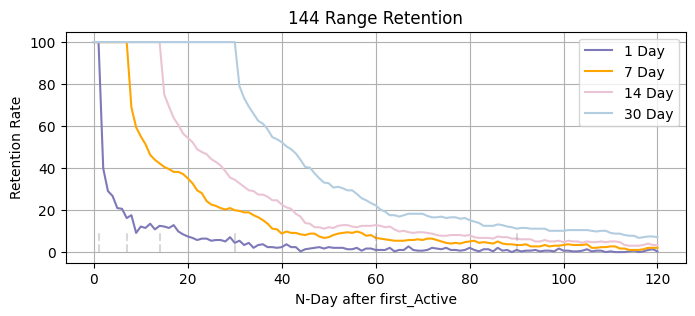

[47] : 94 : 361 : 66.68
Not enough user data : 94 lesson.user : 6 < 100
[48] : 60 : 311 : 66.17
Not enough user data : 60 lesson.user : 8 < 100
[49] : 51 : 1500 : 65.93
218 : [ 173  778 2282 2700 2811]


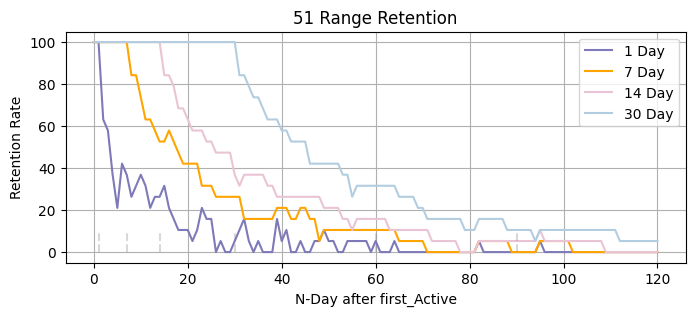

[50] : 189 : 2195 : 65.69
136 : [ 2567  3057  3108  4726 10390]


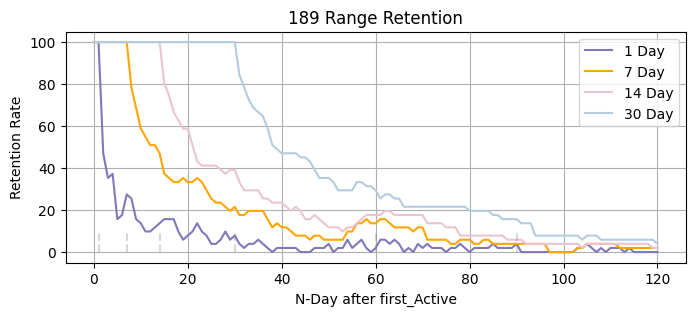

[51] : 27 : 619 : 65.67
Not enough user data : 27 lesson.user : 81 < 100
[52] : 182 : 1608 : 64.8
Not enough user data : 182 lesson.user : 90 < 100
[53] : 131 : 326 : 63.65
Not enough user data : 131 lesson.user : 9 < 100
[54] : 46 : 2420 : 62.65
134 : [ 2067  7870  8249 14830 17992]


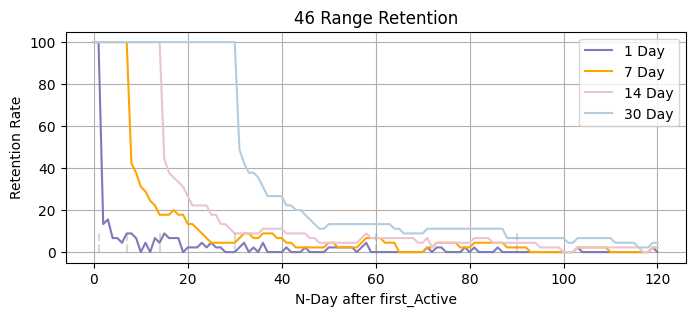

[55] : 95 : 584 : 62.33
Not enough user data : 95 lesson.user : 55 < 100
[56] : 201 : 25865 : 62.04
9918 : [30 32 44 62 89]


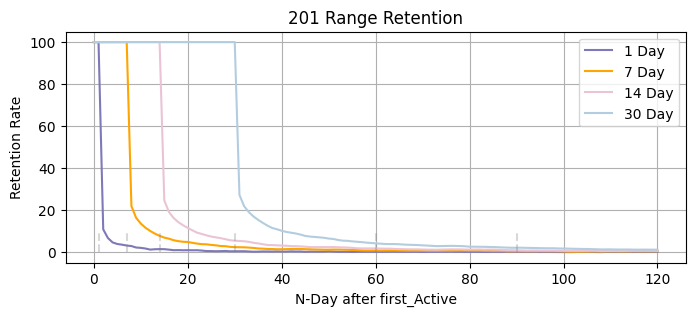

[57] : 99 : 469 : 61.88
Not enough user data : 99 lesson.user : 38 < 100
[58] : 29 : 250 : 61.34
Not enough user data : 29 lesson.user : 8 < 100
[59] : 75 : 2026 : 61.27
101 : [  191  2081  6464  9436 13860]


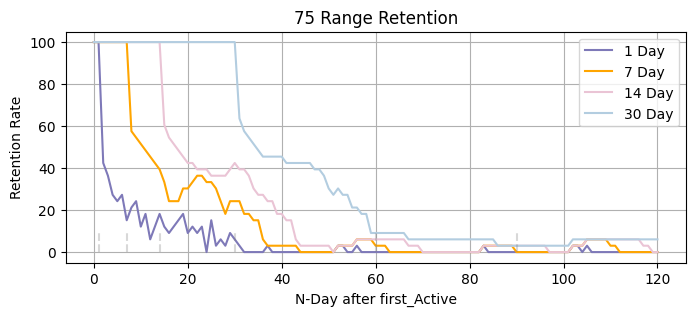

[60] : 109 : 758 : 61.25
Not enough user data : 109 lesson.user : 14 < 100
[61] : 183 : 774 : 61.24
128 : [   78  2937  6652  6874 10050]


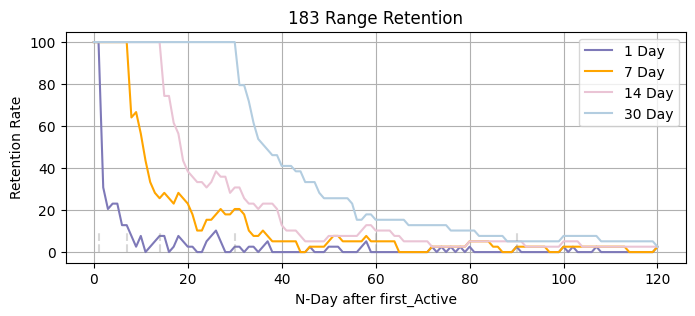

[62] : 141 : 163 : 60.85
Not enough user data : 141 lesson.user : 35 < 100
[63] : 8 : 1313 : 60.82
137 : [   2  322 1576 1961 2440]


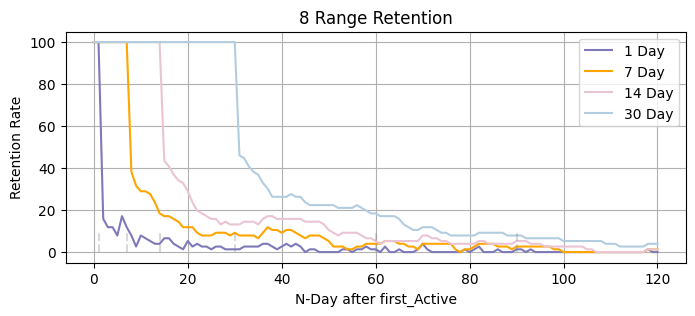

[64] : 47 : 230 : 59.47
Not enough user data : 47 lesson.user : 27 < 100
[65] : 86 : 2992 : 57.17
882 : [ 567  621  733  740 1014]


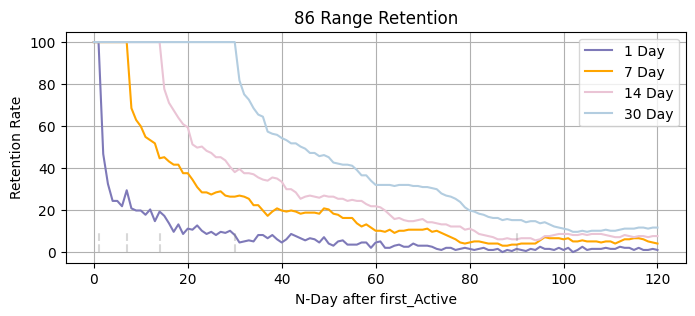

[66] : 140 : 2114 : 56.97
257 : [  83  636 2297 3388 3494]


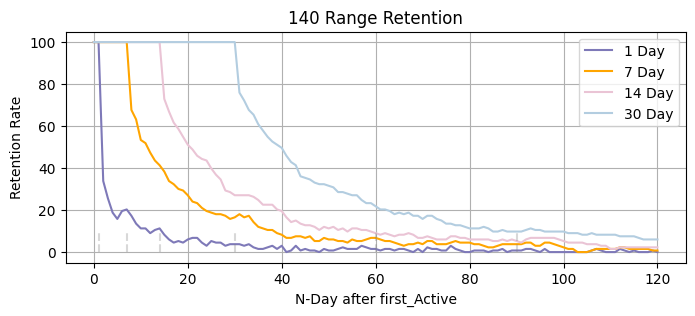

[67] : 11 : 2188 : 56.86
558 : [  81 1153 2203 2250 2678]


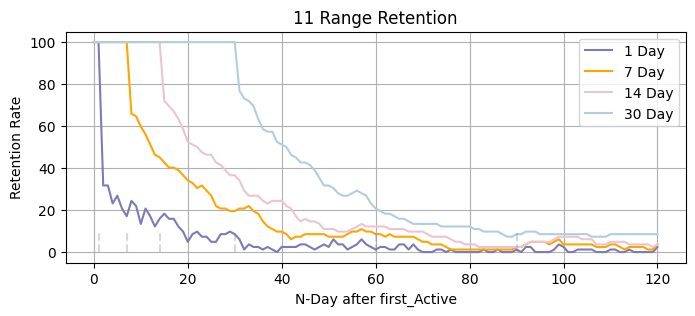

[68] : 32 : 395 : 56.82
Not enough user data : 32 lesson.user : 3 < 100
[69] : 133 : 162 : 56.58
Not enough user data : 133 lesson.user : 11 < 100
[70] : 73 : 476 : 56.55
Not enough user data : 73 lesson.user : 18 < 100
[71] : 81 : 573 : 55.83
Not enough user data : 81 lesson.user : 13 < 100
[72] : 112 : 1283 : 55.58
300 : [ 973 1128 1362 3366 4943]


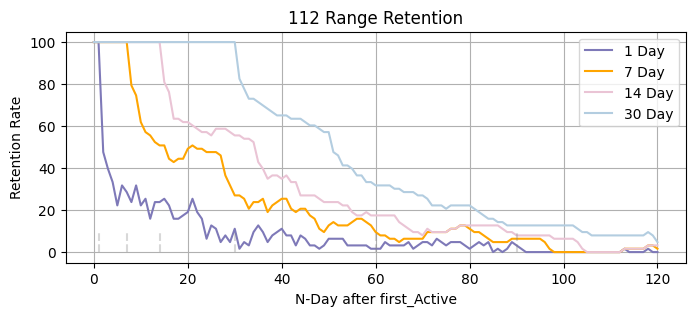

[73] : 166 : 1006 : 55.07
140 : [ 309 1968 2086 2289 2702]


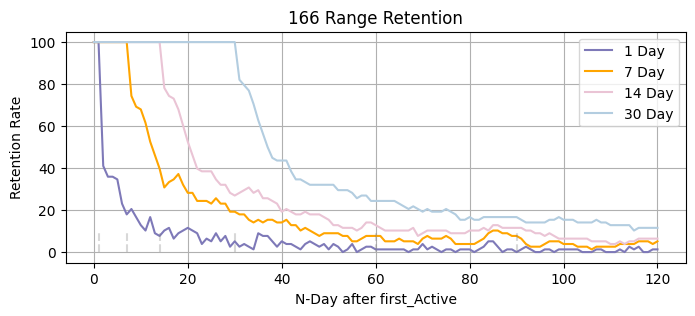

[74] : 135 : 1045 : 55.0
112 : [ 996 2649 5103 5110 7628]


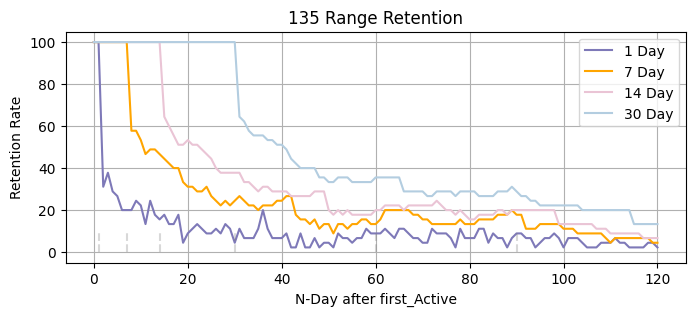

[75] : 168 : 1794 : 54.83
573 : [ 475  543  907  957 1027]


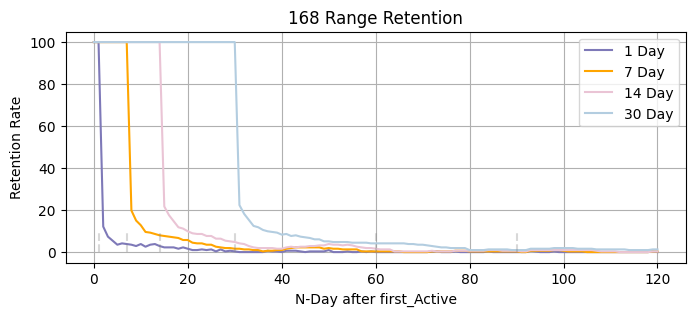

[76] : 57 : 4723 : 54.76
1591 : [321 421 495 774 821]


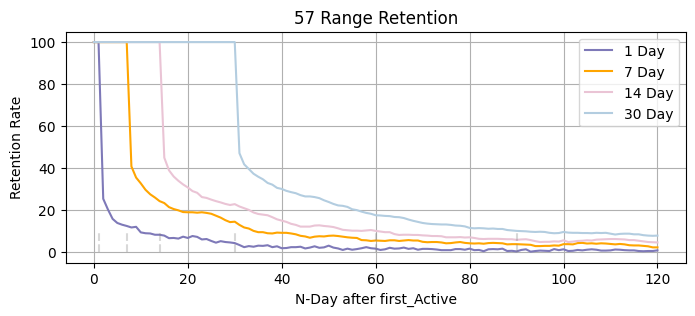

[77] : 35 : 280 : 54.26
Not enough user data : 35 lesson.user : 8 < 100
[78] : 41 : 1492 : 53.82
209 : [ 578 2615 2823 4158 4828]


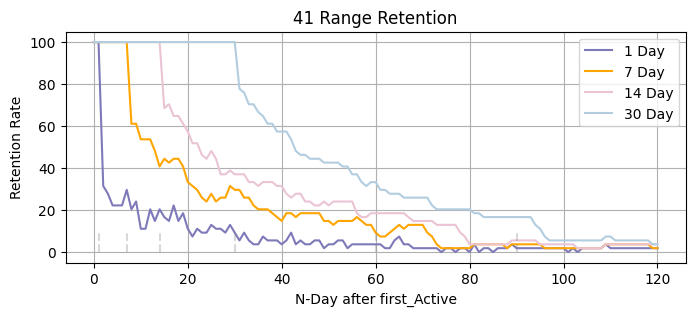

[79] : 136 : 165 : 53.1
Not enough user data : 136 lesson.user : 2 < 100
[80] : 96 : 352 : 52.5
Not enough user data : 96 lesson.user : 24 < 100
[81] : 125 : 229 : 52.39
Not enough user data : 125 lesson.user : 17 < 100
[82] : 13 : 203 : 51.82
Not enough user data : 13 lesson.user : 3 < 100
[83] : 85 : 13701 : 51.02
6656 : [ 15  39  70 127 287]


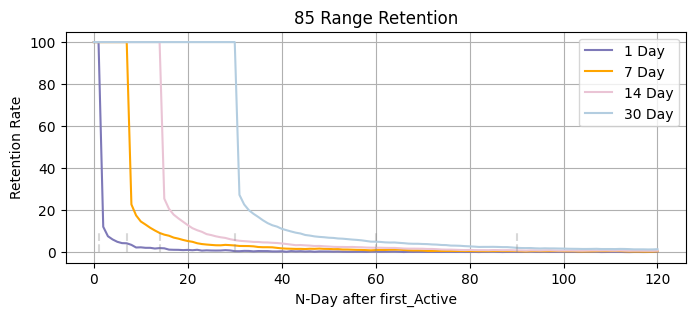

[84] : 88 : 304 : 50.6
Not enough user data : 88 lesson.user : 20 < 100
[85] : 184 : 519 : 50.5
Not enough user data : 184 lesson.user : 59 < 100
[86] : 62 : 900 : 48.63
Not enough user data : 62 lesson.user : 52 < 100
[87] : 30 : 1291 : 48.38
237 : [ 271 1983 3567 3766 5770]


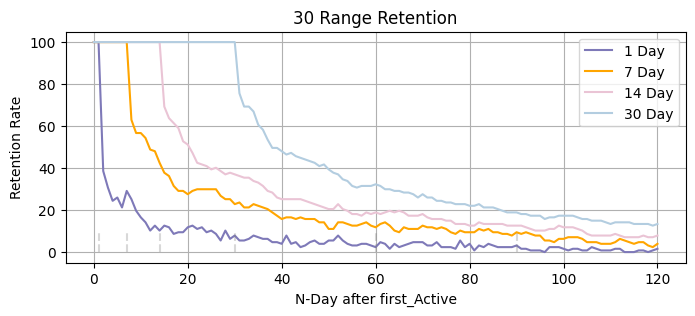

[88] : 159 : 6211 : 47.61
3663 : [ 12 102 104 126 135]


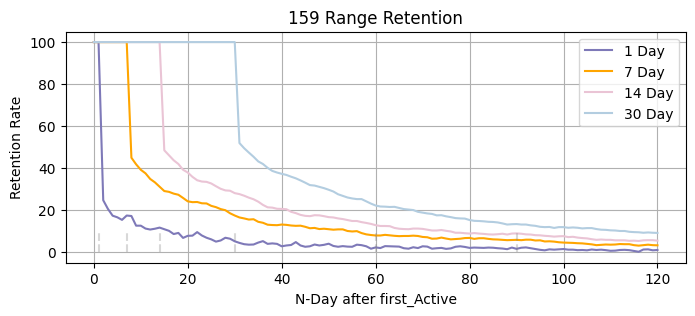

[89] : 170 : 226 : 45.12
Not enough user data : 170 lesson.user : 19 < 100
[90] : 208 : 321 : 43.16
Not enough user data : 208 lesson.user : 10 < 100
[91] : 206 : 362 : 40.22
Not enough user data : 206 lesson.user : 4 < 100


group_name   day1   day2  week1  week2  month1  month2
0         108  46.55  38.29  58.71  40.54   32.73   16.07
1          74  25.00  31.82  31.82  22.73   11.36    9.09
2          50  40.91  45.45  40.91  22.73    9.09   13.64
3         200  52.37  45.52  64.29  50.43   38.44   20.88
4         181  54.53  44.83  60.73  42.77   37.84   22.89
5          22  50.68  41.10  56.16  38.36   31.51   23.29
6         119  46.67  35.00  36.67  33.33   30.00   10.00
7         150  53.01  46.99  63.86  40.96   36.14   22.89
8         190  61.73  49.38  67.90  58.02   54.32   25.93
9          93  16.25  10.77  12.50   8.08    6.15    3.27
10        167  42.86  31.75  39.68  23.81   20.63   11.11
11        147  21.43  10.71  28.57  17.86   25.00   14.29
12        153  57.41  41.67  68.52  62.96   50.00   25.00
13         66  42.86  42.86  57.14  28.57   42.86   42.86
14        177  29.61  26.26  41.34  35.20   22.35    8.38
15         65  23.91  26.09  28.26  19.57   13.04    4.35
16        193  51.52  39.39  54.55  40.91   36.36   19.70
17        106  37.10  30.65  46.77  29.03   22.58   19.35
18        144  39.86  29.05  42.23  32.77   22.30   11.15
19         51  63.16  57.89  52.63  42.11   31.58   10.53
20        189  47.06  35.29  47.06  33.33   29.41   15.69
21         46  13.33  15.56  17.78  13.33   13.33    6.67
22        201  10.81   6.68   7.73   4.41    4.17    2.06
23         75  42.42  36.36  39.39  33.33    9.09    3.03
24        183  30.77  20.51  25.64  17.95   15.38    5.13
25          8  15.79  11.84  18.42  11.84   18.42    7.89
26         86  46.70  32.49  44.67  34.52   31.98   15.23
27        140  33.83  25.56  41.35  24.06   21.80    9.77
28         11  31.71  31.71  45.12  32.93   20.73    8.54
29        112  47.62  39.68  50.79  50.79   31.75   12.70
30        166  41.03  35.90  39.74  28.21   24.36   16.67
31        135  31.11  37.78  46.67  31.11   35.56   28.89
32        168  12.14   7.35   7.99   4.47    4.15    0.96
33         57  25.38  20.29  24.26  18.96   17.53   10.09
34         41  31.48  27.78  40.74  31.48   33.33   16.67
35         85  12.05   7.55   9.11   4.89    4.94    2.03
36         30  38.58  30.71  42.52  29.13   32.28   18.90
37        159  24.69  20.55  31.13  23.77   22.16   13.34

In [163]:
retention_index_df2 = pd.DataFrame(columns=['group_name'
                                 , 'day1', 'day2'
                                 , 'week1', 'week2'
                                 , 'month1', 'month2'])

limit_min = 100
# why 3000 > ? : Sign-up Event Count (30일 단위 합산) =~= 3000 
# why 1700 > ? : all user cnt / 100 =~= 1700 
# why 100 > ? : for percentage of user

target_df = con_df[con_df['con_nu'] > limit_min].sort_values('con_les_nu_rate', ascending=False)

target_list = zip(target_df['content.id'], target_df['con_nu'], target_df['con_les_nu_rate'])
# set retention_range
retention_range = 120

for index, target in enumerate(target_list):
    # unpacking
    target_content_id = int(target[0])
    con_nu = int(target[1])
    con_les_nu_rate = target[2]
    print(f"[{index}] : {target_content_id} : {con_nu} : {con_les_nu_rate}")

    # get max_timeline
    max_timeline = MAX_DATE - pd.Timedelta(retention_range, unit='D')

    # get index_mask : user filtering
    index_mask = target_user[target_user['content.id'] == target_content_id]['user_id'].unique()
    
    # update con_df
    con_df.loc[con_df['content.id'] == target_content_id, 'num_of_effected_users'] = len(index_mask)
    
    # except under limit_min
    if len(index_mask) < limit_min:
        print(f"Not enough user data : {target_content_id} lesson.user : {len(index_mask)} < {limit_min}")
        continue
    
    print(f'{len(index_mask)} : {index_mask[:5]}')
        
    # filtering
    user = base_user[base_user['sign_up_time'] < max_timeline]
    user = user[user['user_id'].isin(index_mask)]

    target_name = target_content_id
    
    result = get_retention(base_df, user, target_name, retention_range, 'first_Active')

    retention_index_df2 = pd.concat([retention_index_df2, result])
    
retention_index_df2.reset_index(drop=True, inplace=True)
retention_index_df2

In [164]:
result = retention_index_df2.copy()
result.rename(columns={'group_name' : 'content_id'}, inplace=True)
result['day1/day2'] = round(result['day2'] / result['day1'] * 100, 2)
result['week1/week1'] = round(result['week2'] / result['week1'] * 100, 2)
result['month1/month2'] = round(result['month2'] / result['month1'] * 100, 2)

temp = con_df.rename(columns={'content.id' : 'content_id'})

result = pd.merge(result, temp, on='content_id', how='left')
result

content_id   day1   day2  week1  week2  month1  month2  day1/day2  \
0         108  46.55  38.29  58.71  40.54   32.73   16.07      82.26   
1          74  25.00  31.82  31.82  22.73   11.36    9.09     127.28   
2          50  40.91  45.45  40.91  22.73    9.09   13.64     111.10   
3         200  52.37  45.52  64.29  50.43   38.44   20.88      86.92   
4         181  54.53  44.83  60.73  42.77   37.84   22.89      82.21   
5          22  50.68  41.10  56.16  38.36   31.51   23.29      81.10   
6         119  46.67  35.00  36.67  33.33   30.00   10.00      74.99   
7         150  53.01  46.99  63.86  40.96   36.14   22.89      88.64   
8         190  61.73  49.38  67.90  58.02   54.32   25.93      79.99   
9          93  16.25  10.77  12.50   8.08    6.15    3.27      66.28   
10        167  42.86  31.75  39.68  23.81   20.63   11.11      74.08   
11        147  21.43  10.71  28.57  17.86   25.00   14.29      49.98   
12        153  57.41  41.67  68.52  62.96   50.00   25.00      72.58   
13         66  42.86  42.86  57.14  28.57   42.86   42.86     100.00   
14        177  29.61  26.26  41.34  35.20   22.35    8.38      88.69   
15         65  23.91  26.09  28.26  19.57   13.04    4.35     109.12   
16        193  51.52  39.39  54.55  40.91   36.36   19.70      76.46   
17        106  37.10  30.65  46.77  29.03   22.58   19.35      82.61   
18        144  39.86  29.05  42.23  32.77   22.30   11.15      72.88   
19         51  63.16  57.89  52.63  42.11   31.58   10.53      91.66   
20        189  47.06  35.29  47.06  33.33   29.41   15.69      74.99   
21         46  13.33  15.56  17.78  13.33   13.33    6.67     116.73   
22        201  10.81   6.68   7.73   4.41    4.17    2.06      61.79   
23         75  42.42  36.36  39.39  33.33    9.09    3.03      85.71   
24        183  30.77  20.51  25.64  17.95   15.38    5.13      66.66   
25          8  15.79  11.84  18.42  11.84   18.42    7.89      74.98   
26         86  46.70  32.49  44.67  34.52   31.98   15.23      69.57   
27        140  33.83  25.56  41.35  24.06   21.80    9.77      75.55   
28         11  31.71  31.71  45.12  32.93   20.73    8.54     100.00   
29        112  47.62  39.68  50.79  50.79   31.75   12.70      83.33   
30        166  41.03  35.90  39.74  28.21   24.36   16.67      87.50   
31        135  31.11  37.78  46.67  31.11   35.56   28.89     121.44   
32        168  12.14   7.35   7.99   4.47    4.15    0.96      60.54   
33         57  25.38  20.29  24.26  18.96   17.53   10.09      79.94   
34         41  31.48  27.78  40.74  31.48   33.33   16.67      88.25   
35         85  12.05   7.55   9.11   4.89    4.94    2.03      62.66   
36         30  38.58  30.71  42.52  29.13   32.28   18.90      79.60   
37        159  24.69  20.55  31.13  23.77   22.16   13.34      83.23   

    week1/week1  month1/month2  con_nu  con_les_nu_mean  \
0         69.05          49.10    5036             4189   
1         71.43          80.02    9415             7707   
2         55.56         150.06     514              415   
3         78.44          54.32   12030             9592   
4         70.43          60.49    4748             3738   
5         68.30          73.91    3681             2864   
6         90.89          33.33    2633             1992   
7         64.14          63.34    2171             1640   
8         85.45          47.74    1937             1450   
9         64.64          53.17    8307             6148   
10        60.01          53.85    1173              857   
11        62.51          57.16    7526             5479   
12        91.89          50.00    1738             1245   
13        50.00         100.00    1077              760   
14        85.15          37.49    6130             4327   
15        69.25          33.36    2076             1446   
16        75.00          54.18    1852             1263   
17        62.07          85.70    1078              727   
18        77.60          50.00    2910             1956   
19        80.0

day1  day2  week1  week2  month1  \
day1                                      1.00  0.93   0.92   0.90    0.79   
day2                                      0.93  1.00   0.90   0.84    0.71   
week1                                     0.92  0.90   1.00   0.93    0.87   
week2                                     0.90  0.84   0.93   1.00    0.85   
month1                                    0.79  0.71   0.87   0.85    1.00   
month2                                    0.60  0.64   0.77   0.60    0.84   
day1/day2                                 0.06  0.40   0.21   0.14    0.04   
week1/week1                               0.44  0.36   0.37   0.65    0.40   
month1/month2                             0.12  0.31   0.23   0.01    0.07   
number of user in content                -0.41 -0.43  -0.39  -0.34   -0.35   
mean of user in lesson of content        -0.34 -0.35  -0.31  -0.26   -0.29   
number of effected users                 -0.32 -0.35  -0.32  -0.28   -0.28   
mean of lesson completed rate of content  0.40  0.43   0.42   0.33    0.23   
number of lesson in content               0.48  0.49   0.53   0.51    0.54   
difficulty of content                     0.46  0.51   0.48   0.41    0.49   

                                          month2  day1/day2  week1/week1  \
day1                                        0.60       0.06         0.44   
day2                                        0.64       0.40         0.36   
week1                                       0.77       0.21         0.37   
week2                                       0.60       0.14         0.65   
month1                                      0.84       0.04         0.40   
month2                                      1.00       0.23        -0.00   
day1/day2                                   0.23       1.00         0.06   
week1/week1                                -0.00       0.06         1.00   
month1/month2                               0.50       0.44        -0.40   
number of user in content                  -0.31      -0.25        -0.21   
mean of user in lesson of content          -0.26      -0.20        -0.17   
number of effected users                   -0.24      -0.30        -0.23   
mean of lesson completed rate of content    0.25       0.16        -0.00   
number of lesson in content                 0.51       0.19         0.32   
difficulty of content                       0.46       0.32         0.23   

                                          month1/month2  \
day1                                               0.12   
day2                                               0.31   
week1                                              0.23   
week2                                              0.01   
month1                                             0.07   
month2                                             0.50   
day1/day2                                          0.44   
week1/week1                                       -0.40   
month1/month2                                      1.00   
number of user in content                         -0.09   
mean of user in lesson of content                 -0.06   
number of effected users                          -0.09   
mean of lesson completed rate of content           0.31   
number of lesson in content                        0.22   
difficulty of content                              0.13   

                                          number of user in content  \
day1                                                          -0.41   
day2                                                          -0.43   
week1                                                         -0.39   
week2                                                         -0.34   
month1                                                        -0.35   
month2                                                        -0.31   
day1/day2                                                     -0.25   
week1/week1                                                   -

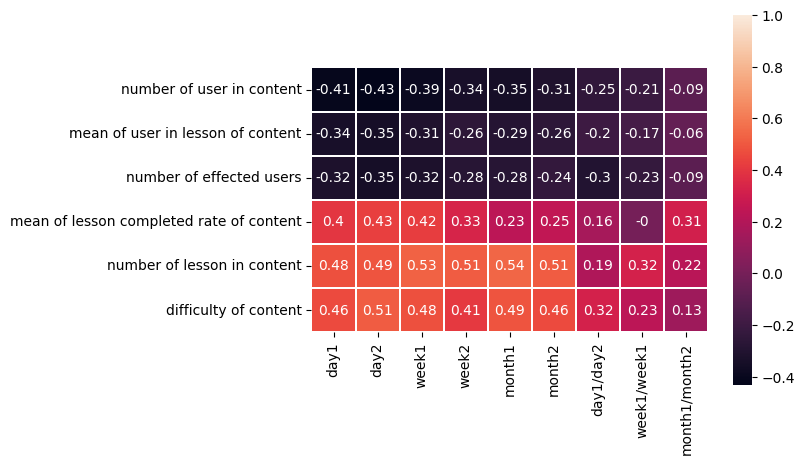

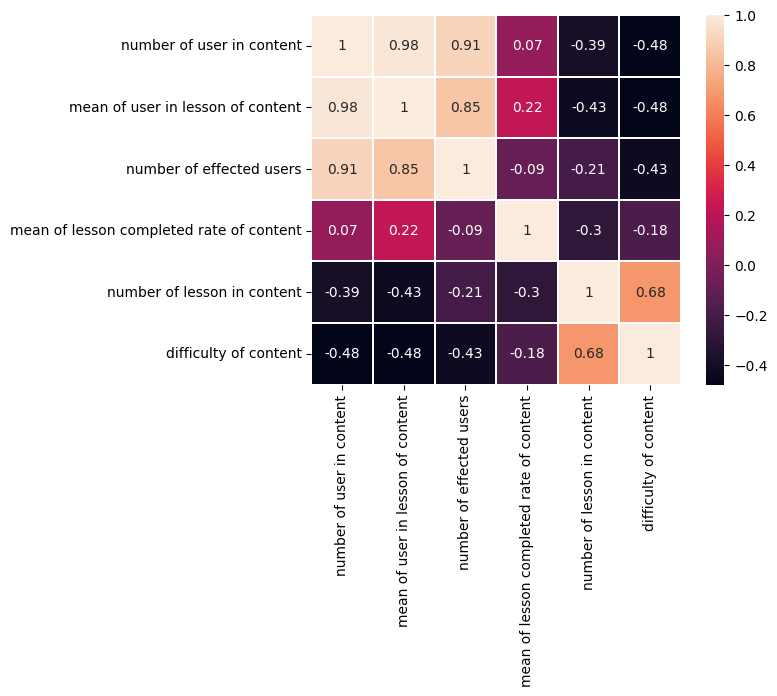

In [165]:
# correlation
import scipy.stats as stats

corr_matrix = result\
        .rename(columns = {'con_nu' : 'number of user in content',
                           'con_les_nu_mean' : 'mean of user in lesson of content',
                           'con_les_nu_rate' : 'mean of lesson completed rate of content',
                           'con_les_nu_cnt' : 'number of lesson in content',
                           'num_of_effected_users' : 'number of effected users',
                           'content.difficulty' : 'difficulty of content'
                           })\
        .drop(columns=['content_id']).corr().round(2)
display(corr_matrix)

sns.heatmap(corr_matrix.iloc[9:, :9], linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True)
plt.show()
sns.heatmap(corr_matrix.iloc[9:, 9:], linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True)
plt.show()
# scatter plot

### activate to sign up date

In [166]:
ONLY_NEW_USER = False
user_id_in_df = user_indexs[user_indexs['event_type'] == 3]['user_id'].unique()

# set the target df
if ONLY_NEW_USER:
    dfs = [
        com_df_22.loc[(com_df_22['event_type'] == 14) & com_df_22['user_id'].isin(user_id_in_df), ['user_id', 'client_event_time']],
        com_df_23.loc[(com_df_23['event_type'] == 14) & com_df_23['user_id'].isin(user_id_in_df), ['user_id', 'client_event_time']]
    ]
else:
    dfs = [
        com_df_22.loc[(com_df_22['event_type'] == 14) & (com_df_22['user_id'] != 0), ['user_id', 'client_event_time']],
        com_df_23.loc[(com_df_23['event_type'] == 14) & (com_df_23['user_id'] != 0), ['user_id', 'client_event_time']]
    ]

# set time list
timelists = [
    pd.date_range('2022-01-01', '2022-12-31', freq='D').floor("D"),
    pd.date_range('2023-01-01', '2023-12-31', freq='D').floor("D")
]

# set result, temp
results = [[], []]
temps = [[], []]

user_df

# get results
for i in range(2):
    results[i] = dfs[i].groupby(dfs[i]['client_event_time'].dt.strftime("%m-%d"))['user_id'].unique()
    # temps[i] = pd.DataFrame(["01-01", results[i].iloc[0]])
    # temps[i] = temps[i].T
    # temps[i].columns = ['date', 'user_id_unique']

data_sets = {}

for year, dfs in enumerate(results):
    year = 2022 + year
    # group by month
    dfs = dfs.groupby(dfs.index.str[:2]).apply(list)
    
    for month, month_user_id in enumerate(dfs):
        # set
        month = month + 1
        label = f'{year}-{month}'
        data_sets[label] = []

        for day, day_user_id in enumerate(month_user_id):
            date = pd.to_datetime(dt.strptime(f'{label}-{day + 1}', '%Y-%m-%d'))
            
            for user_id in day_user_id:
                sign_up = user_df[user_df['user_id'] == user_id]['sign_up_time'].values[0]
                value = (date - sign_up).days
                
                if value < 0:
                    value = 0
                
                data_sets[label].append(value)
        
        print(data_sets[label])
        # data_sets[label] = np.array(data_sets[label])

# # display
# results[0].plot(figsize=(8, 3), label='2022', title='Daily lesson complete Event Count(no rolling)', xlabel='Date', ylabel='Count', grid=True)
# results[1].plot(figsize=(8, 3), label='2023', xlabel='Date', grid=True)
# plt.legend()
# plt.show()

# # set result_list
# result_list = [[], []]

# for i in range(2):
#     result_list[i] = [ results[i].copy() ]
    
# # rolling count
# for rolling_offset in [7, 14, 30]:
#     # reset rolling
#     results = [
#         pd.DataFrame(temps[0].copy(), columns=['date', 'user_id_unique']),
#         pd.DataFrame(temps[1].copy(), columns=['date', 'user_id_unique'])
#     ]
    
#     for j in range(2):
#         for i in range(1, 365):
#             # set mindate
#             if i <= rolling_offset - 1:
#                 min_data = timelists[j][0]
#             else:
#                 min_data = timelists[j][i + 1 - rolling_offset]
            
#             # get rolling result
#             rolling_result = dfs[j]\
#                 .loc[((dfs[j]['client_event_time'] >= pd.Timestamp(min_data))\
#                     & (dfs[j]['client_event_time'] <= pd.Timestamp(timelists[j][i]))), 'user_id']\
#                         .nunique()

#             # set temp result
#             temp = pd.DataFrame([timelists[j][i].strftime("%m-%d"), rolling_result])
#             temp = temp.T
#             temp.columns = ['date', 'user_id_unique']
                
#             # concat            
#             results[j] = pd.concat([results[j], temp])

#         # set index
#         results[j].set_index('date', inplace=True)
        
#         # append result_list
#         result_list[j].append(results[j].copy())

#     # display
#     results[0]['user_id_unique'].plot(figsize=(8, 3), label = '2022', title=f'Range retention lesson complete Event User nunique({rolling_offset} Day Range)', xlabel='Date', ylabel='# of Nunique', grid=True)
#     results[1]['user_id_unique'].plot(figsize=(8, 3), label = '2023', xlabel='Date', grid=True)
    
#     plt.legend()
#     plt.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

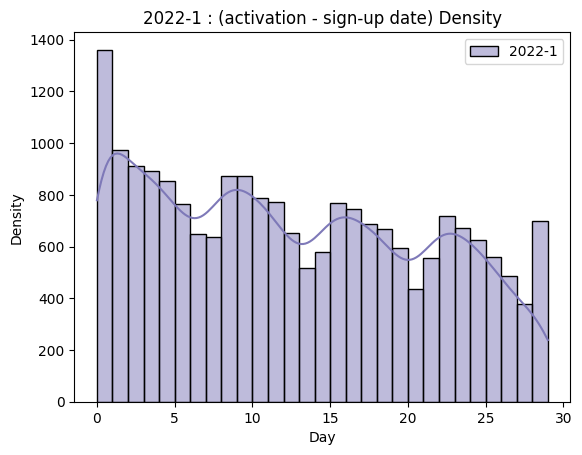

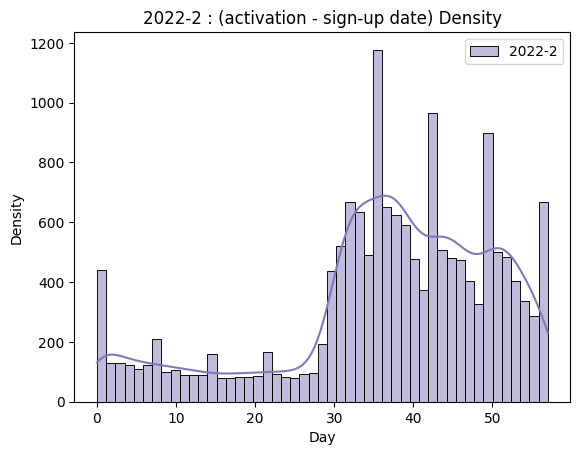

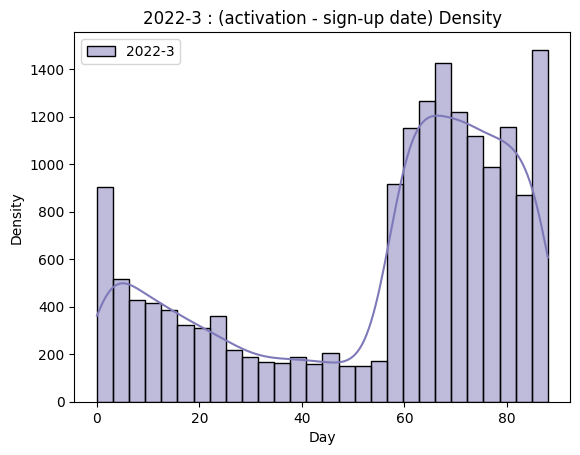

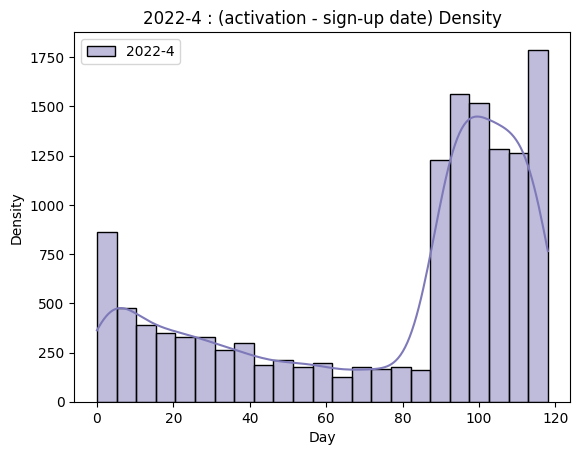

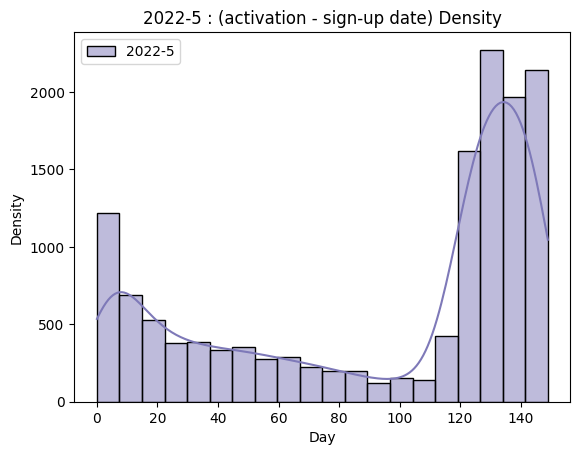

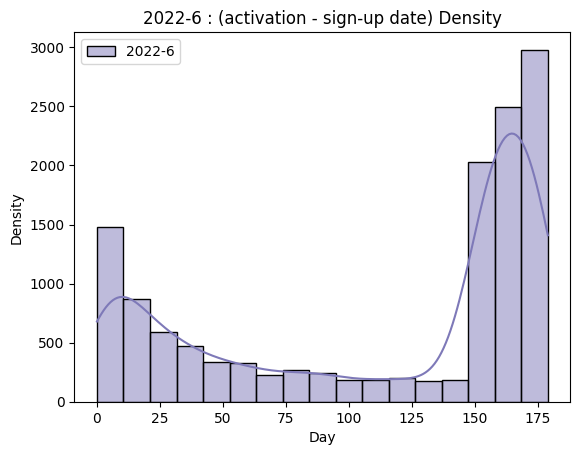

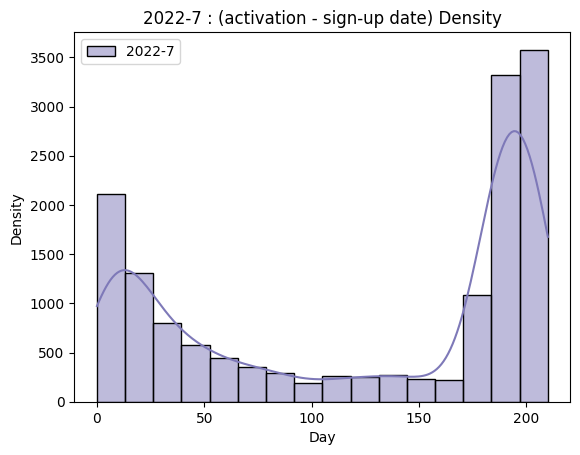

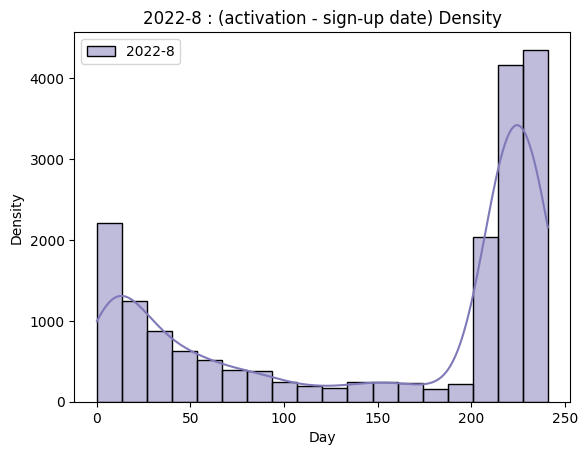

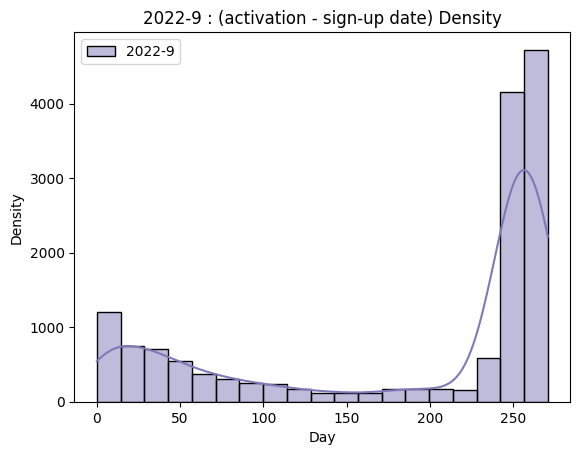

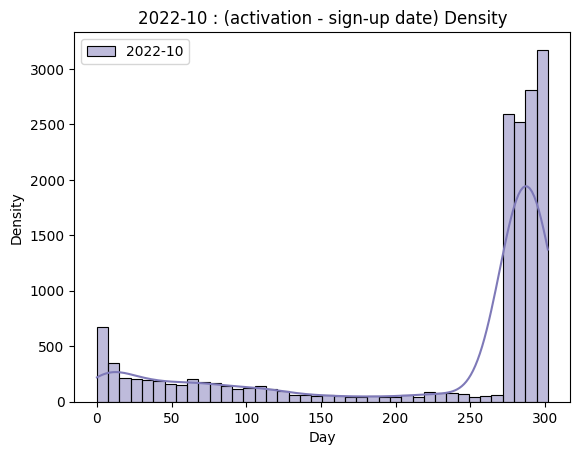

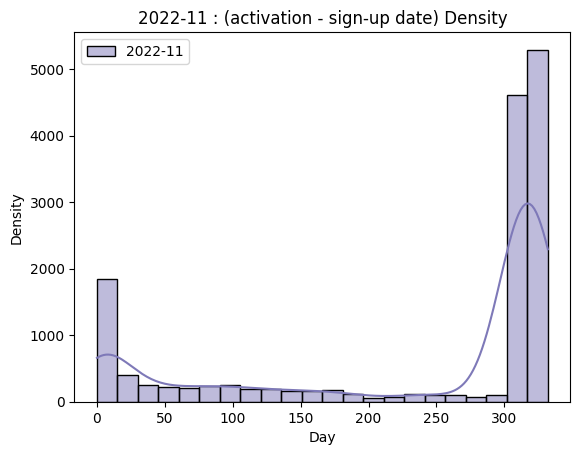

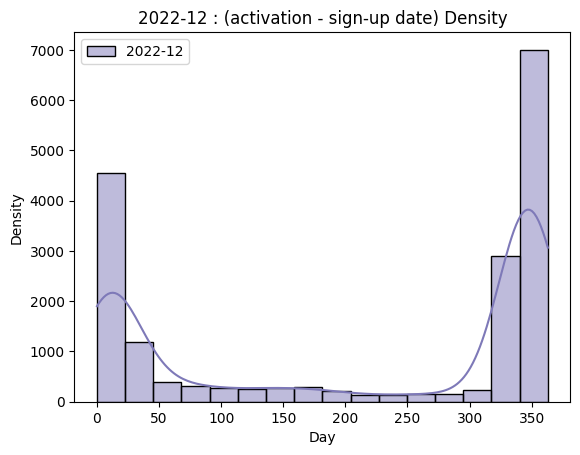

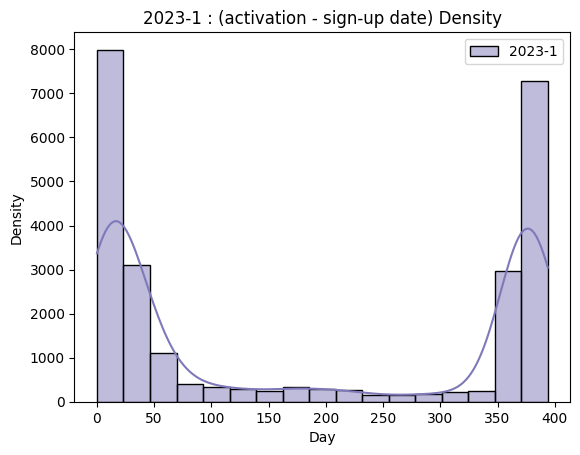

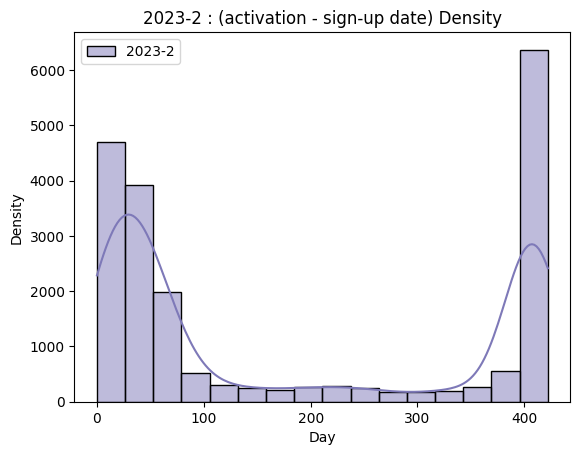

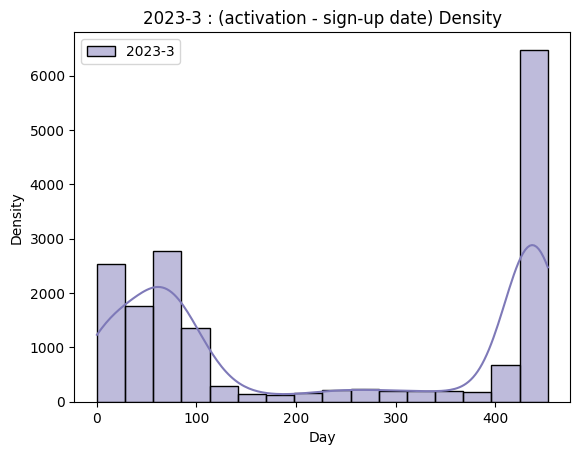

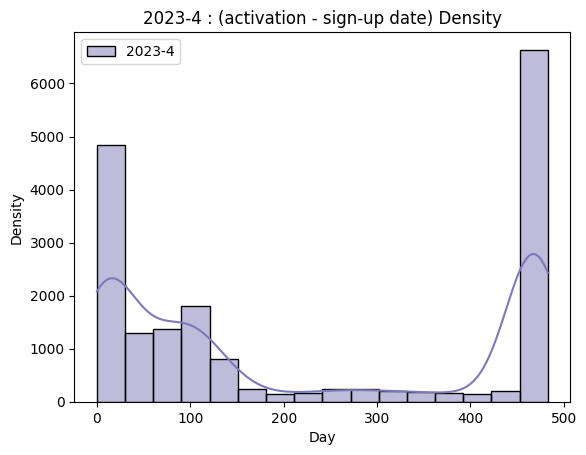

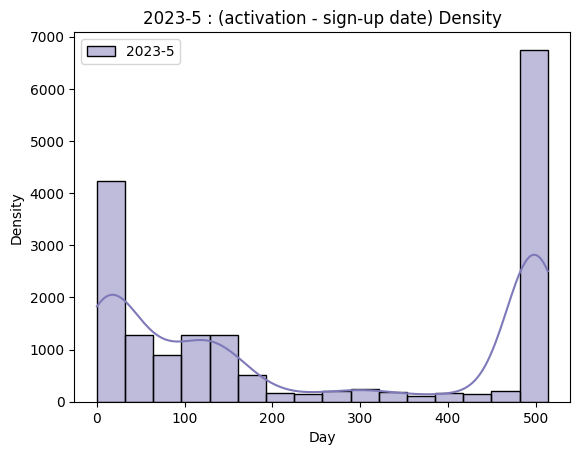

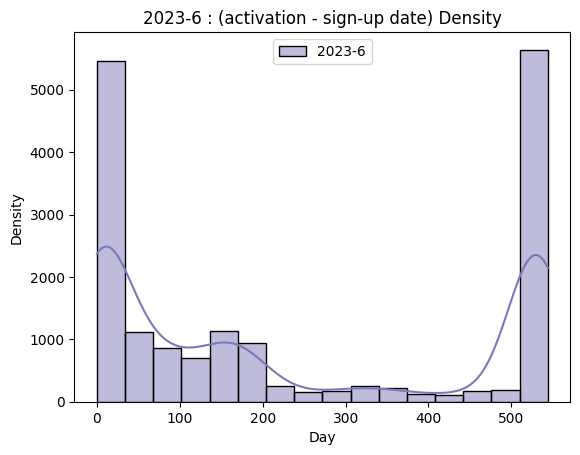

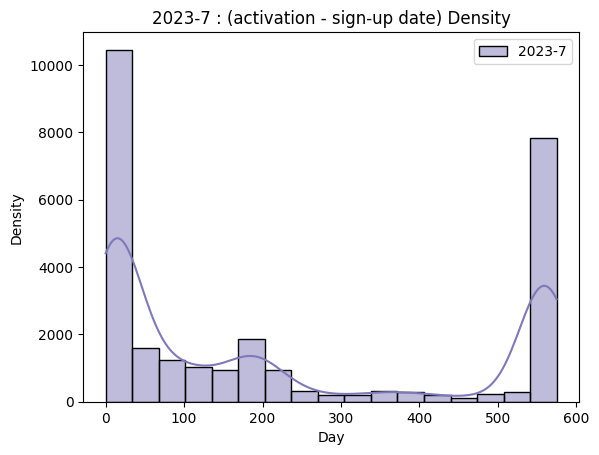

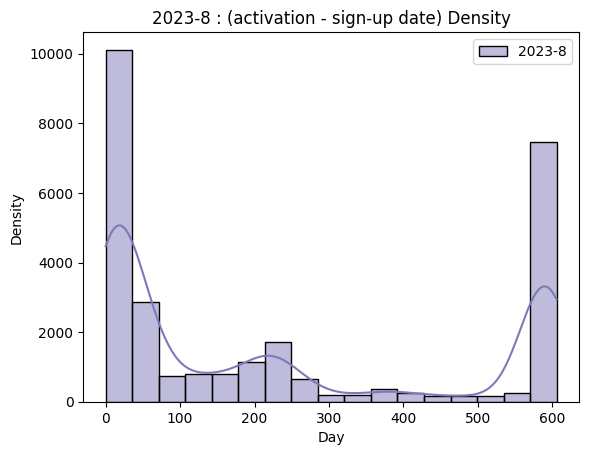

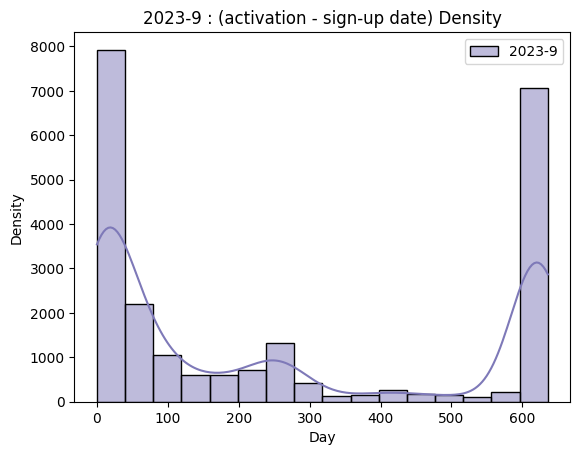

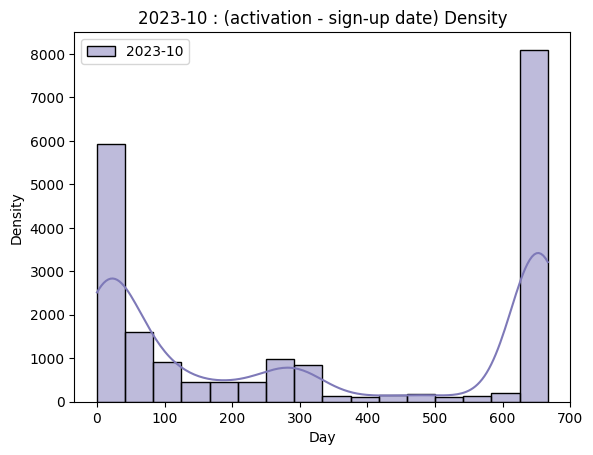

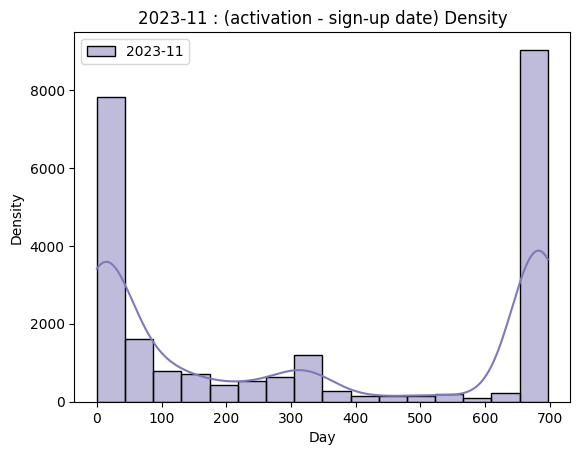

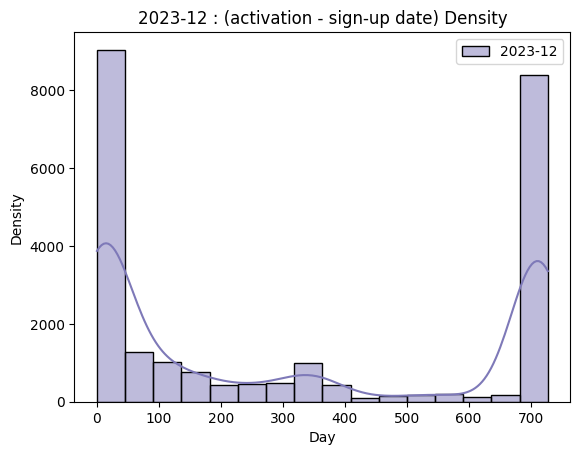

In [167]:
for year in [2022, 2023]:
    for month in range(1, 13):
        label = f'{year}-{month}'
        
        ax = sns.histplot(data=data_sets[label], label=label
                        , kde=True, alpha=0.5)
        ax = sns.kdeplot()

        ax.set_xlabel('Day')
        ax.set_ylabel('Density')
        ax.set_title(f'{year}-{month} : (activation - sign-up date) Density')
        
        plt.legend()
        plt.show()

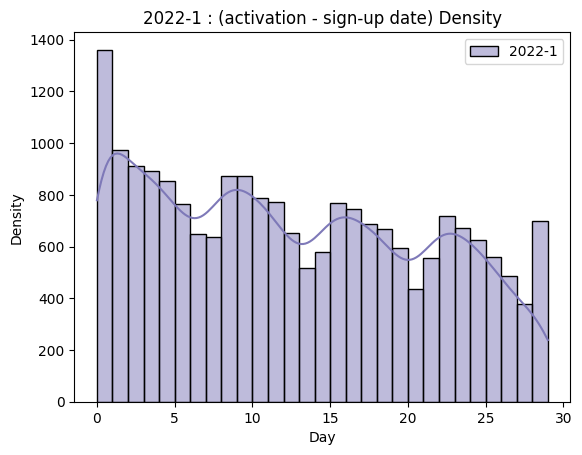

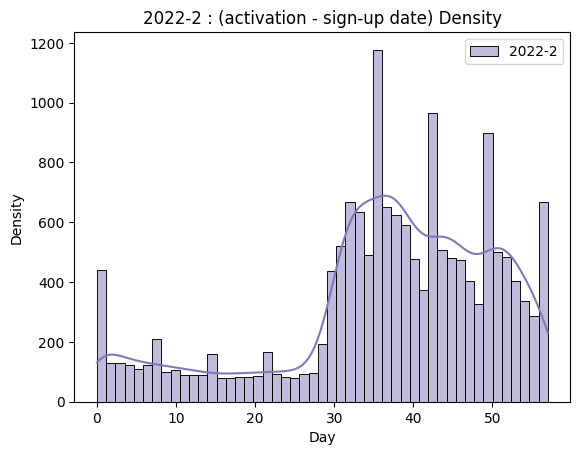

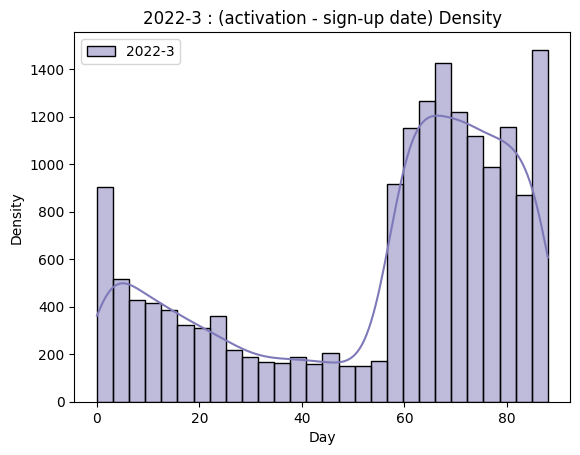

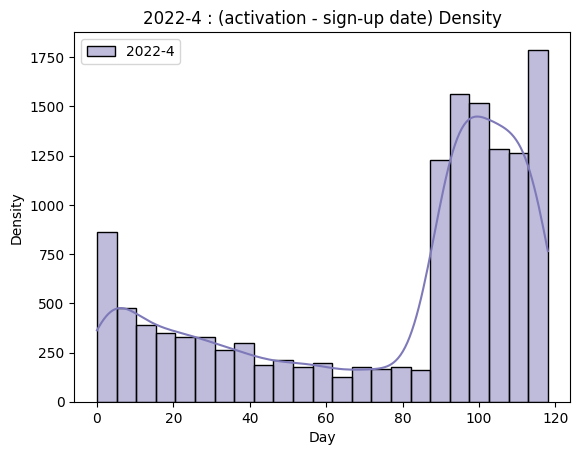

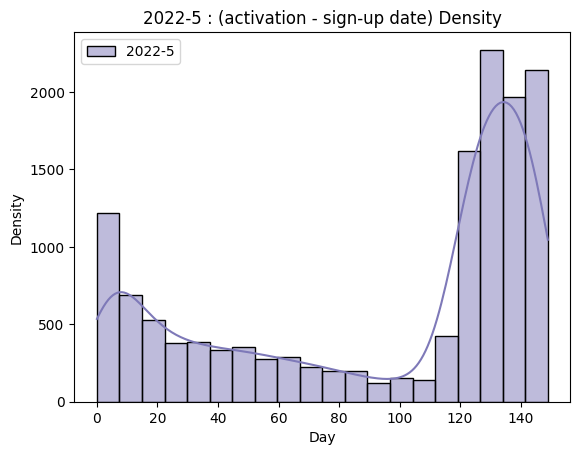

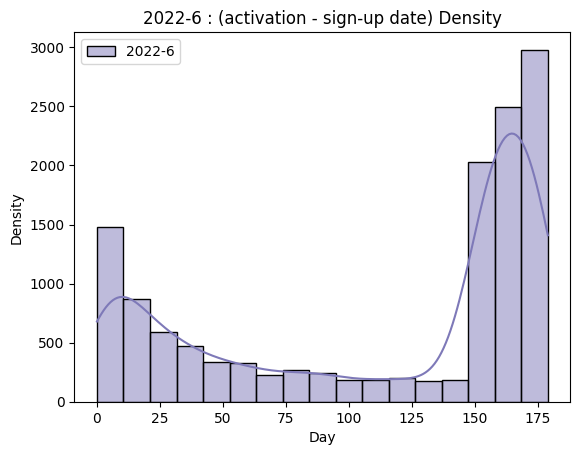

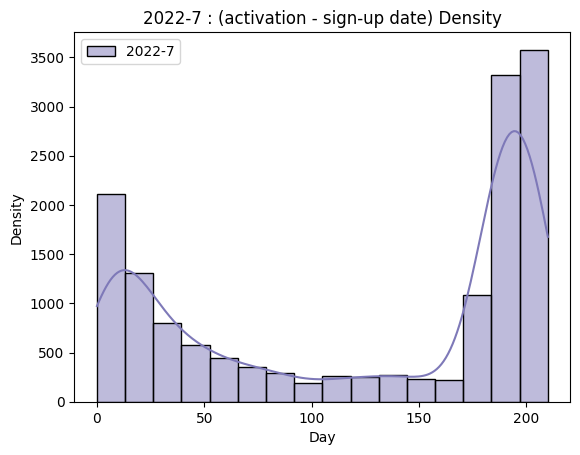

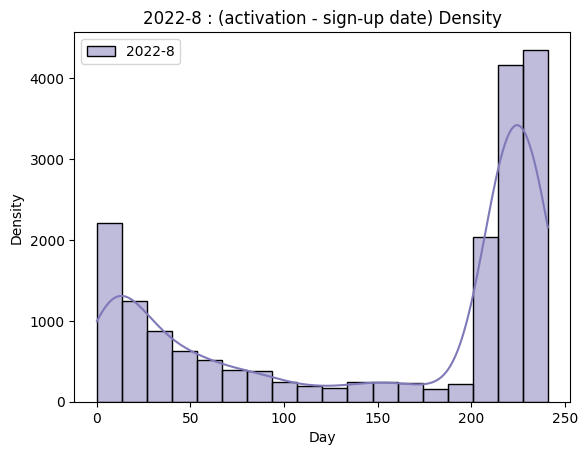

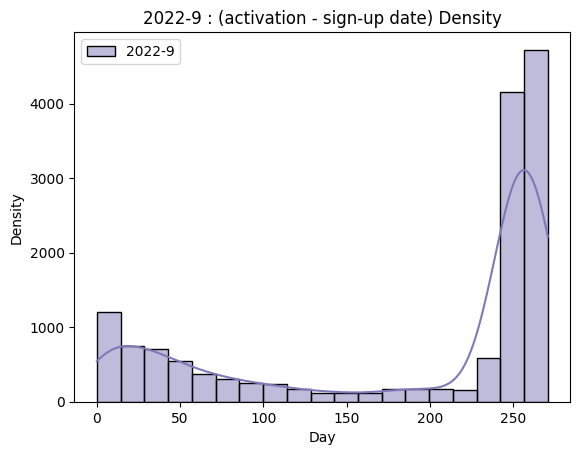

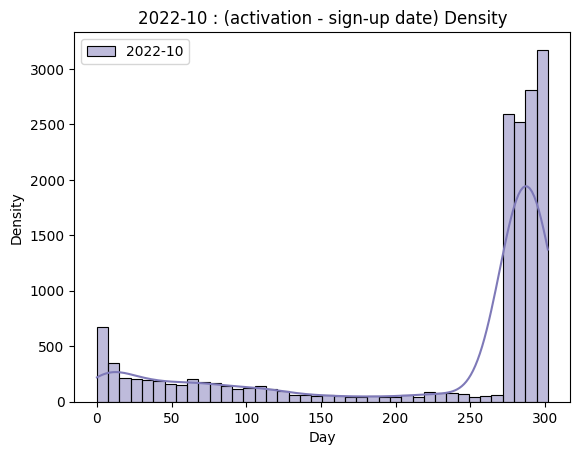

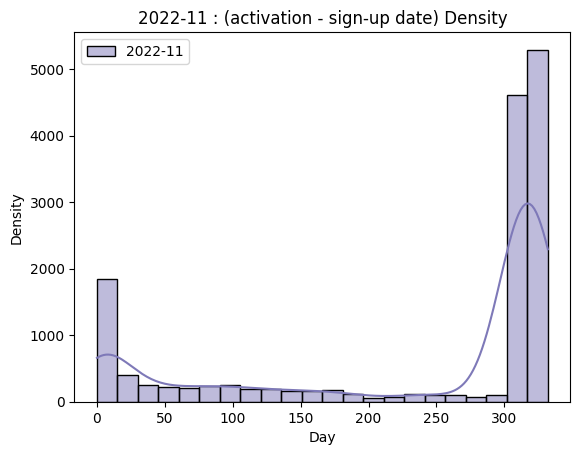

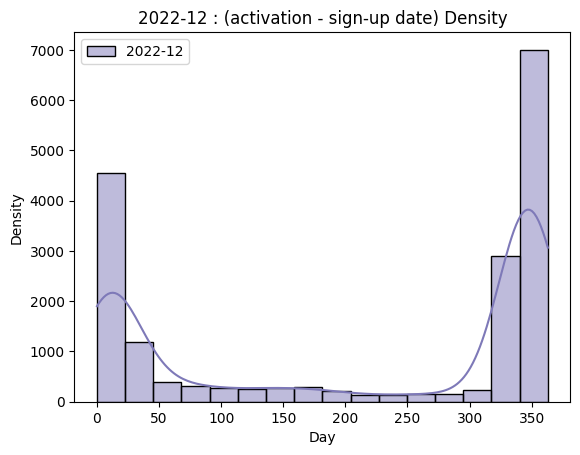

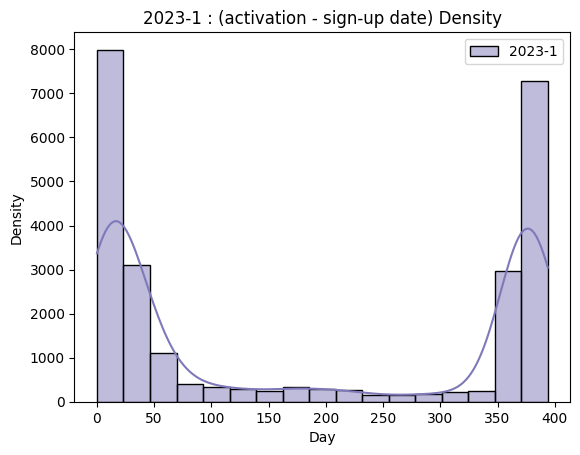

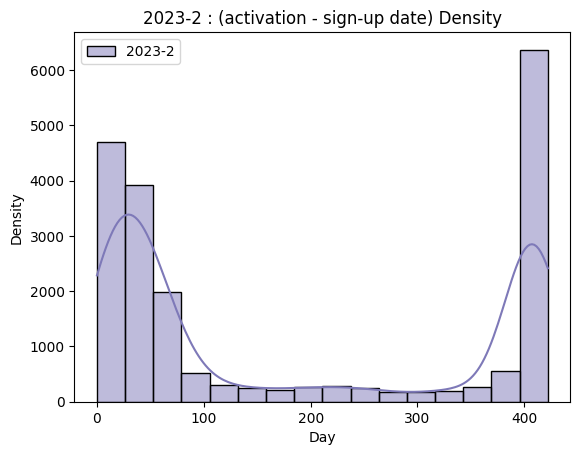

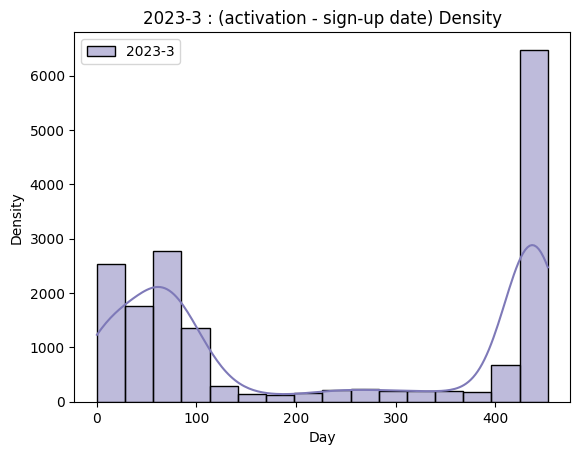

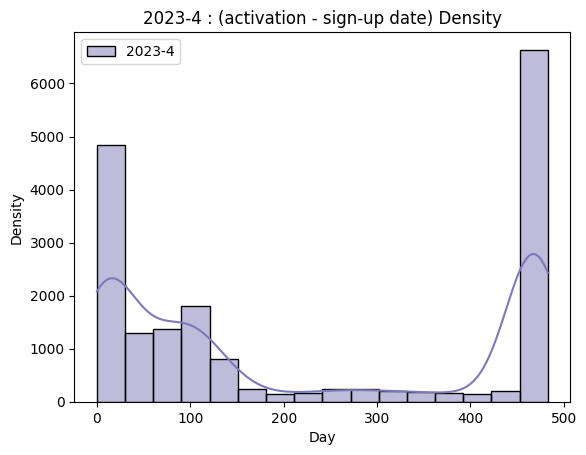

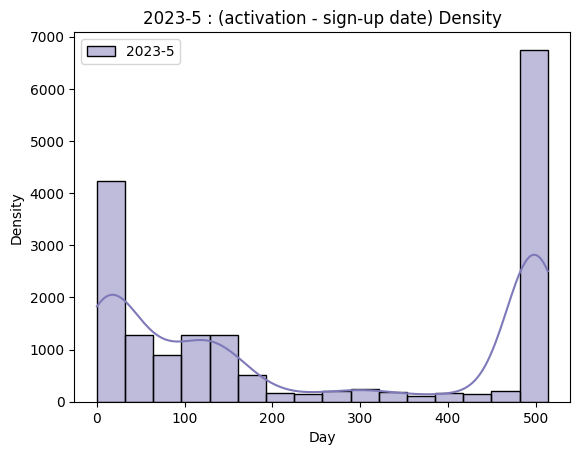

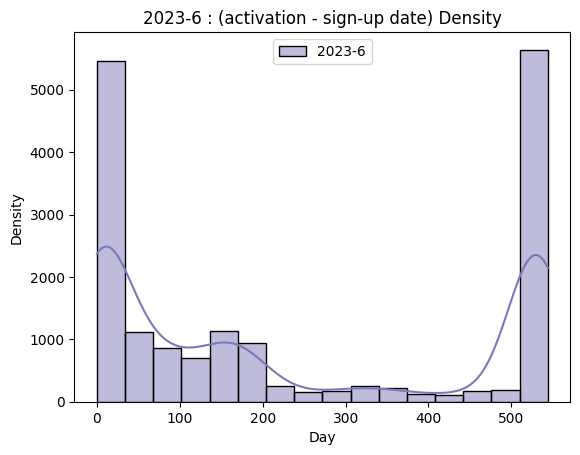

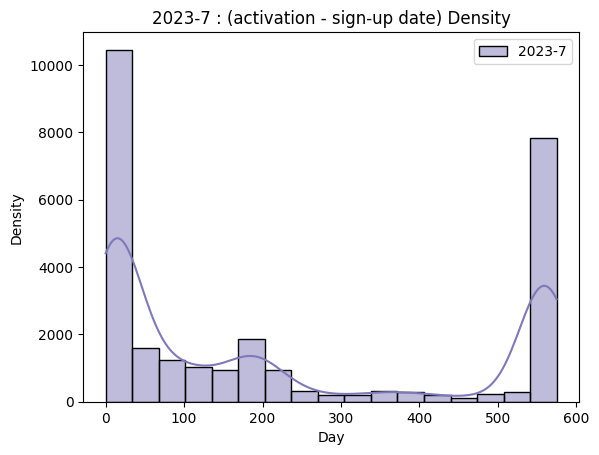

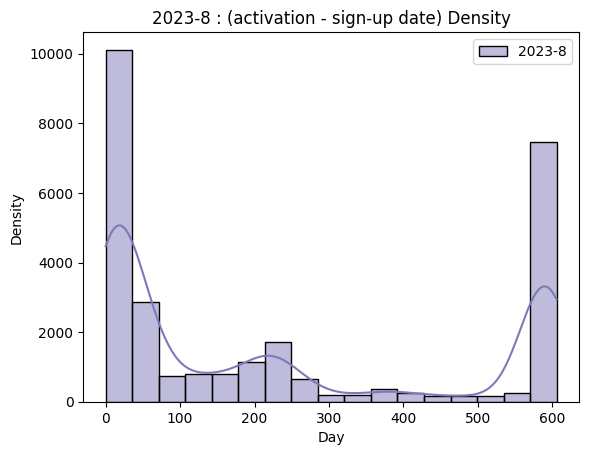

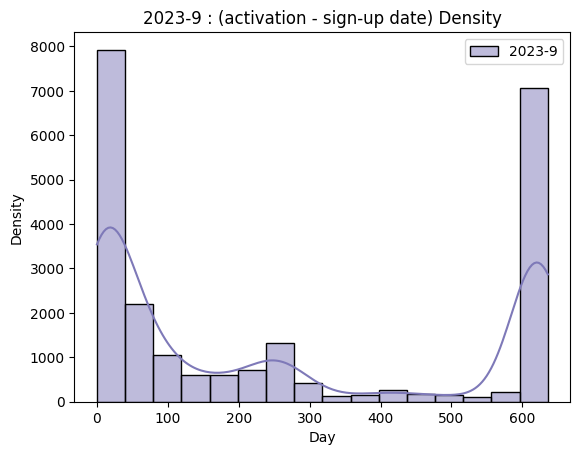

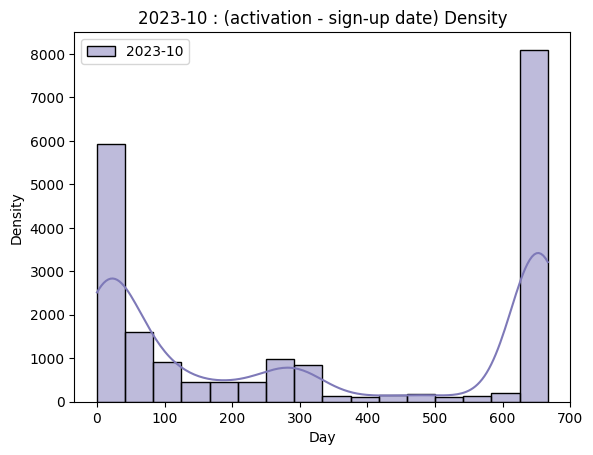

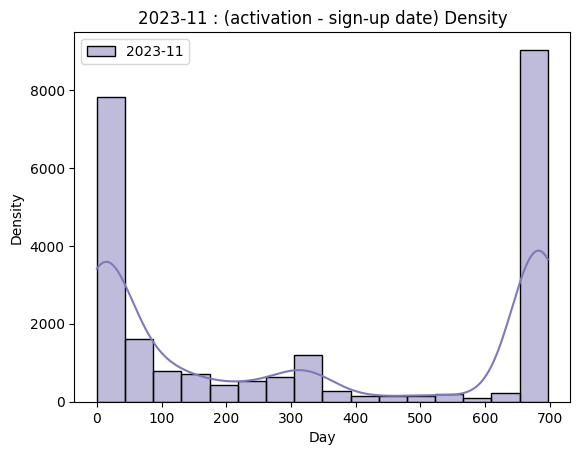

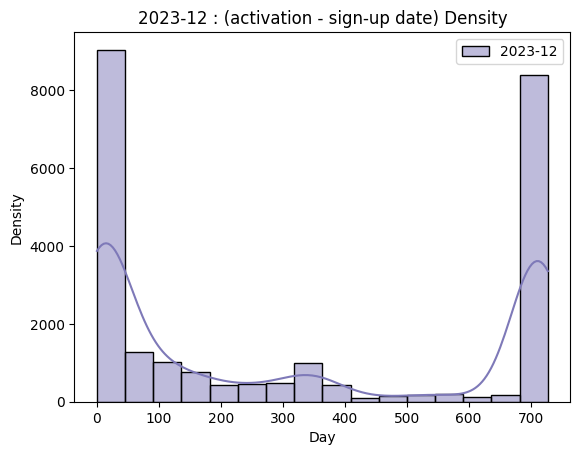

In [168]:
for year in [2022, 2023]:
    for month in range(1, 13):
        label = f'{year}-{month}'
        
        ax = sns.histplot(data=data_sets[label], label=label
                        , kde=True, alpha=0.5)
        ax = sns.kdeplot()

        ax.set_xlabel('Day')
        ax.set_ylabel('Density')
        ax.set_title(f'{year}-{month} : (activation - sign-up date) Density')
        
        plt.legend()
        plt.show()

### 분석 trouble shoting